In [1]:
%matplotlib nbagg
import sys
import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
#import instrument
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB

from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id, load_by_id
from qcodes import new_experiment, Station, Instrument
from qcodes.dataset.data_export import get_data_by_id


# initialize database

In [2]:
#initialize database
import datetime
dataset_name = 'ABS_W1_5_1_1'
qc.config["core"]["db_location"] = datetime.date.today().strftime(r'D:\OneDrive\BF3\Data\%Y%m%d_'+dataset_name+'.db')
# automatically uses a different DB file for each month
qc.dataset.database.initialise_database()
qc.config.core.db_location

Upgrading database: : 0it [00:00, ?it/s]


'D:\\OneDrive\\BF3\\Data\\20190509_ABS_W1_5_1_1.db'

In [2]:
station = qc.Station()

In [4]:
exp = qc.new_experiment("VNA analysis", sample_name="lines")

# Bluefors fridge log tunnel

## Bluefors log opening


In [5]:
#set the path here of the shared desktop file
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\' 

import time

In [6]:
import csv
class BF_Logfile():
    def __init__(self, logfile_path):
        #initiate the path here
        self.logfile_path = logfile_path
    
    def make_timestamp(days_in_the_past = 0):
        """
        by default makes today
        """
        return datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)
    
    def open_file(logfile_name, timestamp=None):
        
        if timestamp is None:
            timestamp = self.make_timestamp()
     
        ds = '%02d-%02d-%02d'%(timestamp.year-2000, timestamp.month, timestamp.day) 
        pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'
        
        file_list = []
        with open(pth) as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                #print(row)
                file_list.append(row)
        csvFile.close()

        
    

<IPython.core.display.Javascript object>


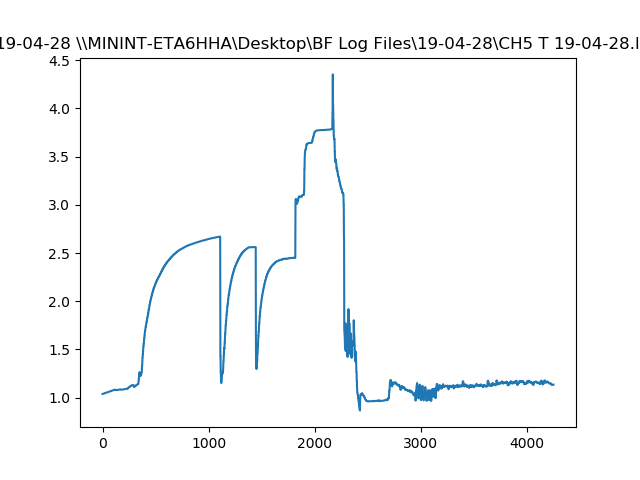

<IPython.core.display.Javascript object>


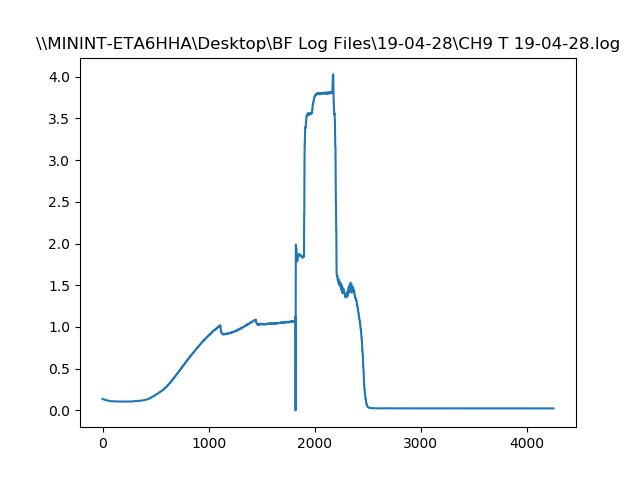

Text(0.5,1,'\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\19-04-28\\CH9 T 19-04-28.log')

In [98]:
logfile_name = 'CH5 T'
days_in_the_past = 15
ts = datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)
ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day) 
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

T = np.loadtxt(pth, usecols = (2), delimiter = ',')
plt.figure()
plt.plot(T)
plt.title(ds + ' ' + pth)

logfile_name = 'CH9 T'
ts = datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)
ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day) 
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

T = np.loadtxt(pth, usecols = (2), delimiter = ',')
plt.figure()
plt.plot(T)
plt.title(pth)

['09-05-19', '00:00:51', 'CH1', 'P1  ', '1', ' 3.12E-6', '0', '1', 'CH2', 'P2  ', '1', ' 3.96E-1', '0', '1', 'CH3', 'P3  ', '1', ' 3.24E+2', '0', '1', 'CH4', 'P4  ', '1', ' 3.62E+2', '0', '1', 'CH5', 'P5  ', '1', ' 8.90E+0', '0', '1', 'CH6', 'P6', '1', ' 3.42E+0', '0', '1', '']


<IPython.core.display.Javascript object>


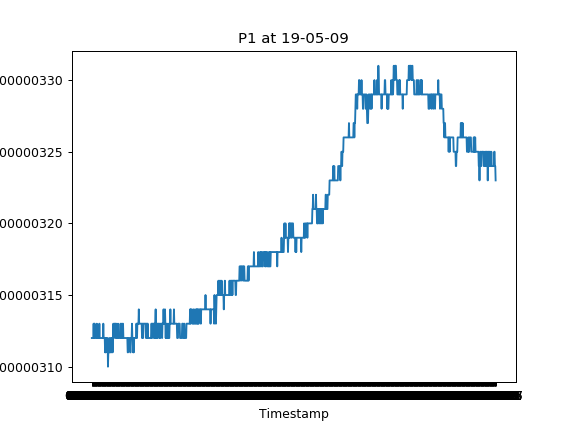

<IPython.core.display.Javascript object>


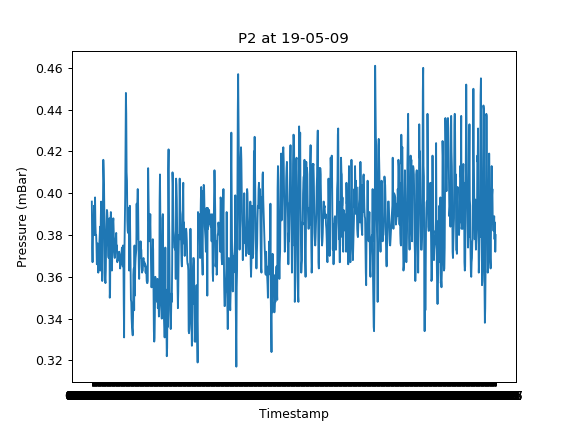

<IPython.core.display.Javascript object>


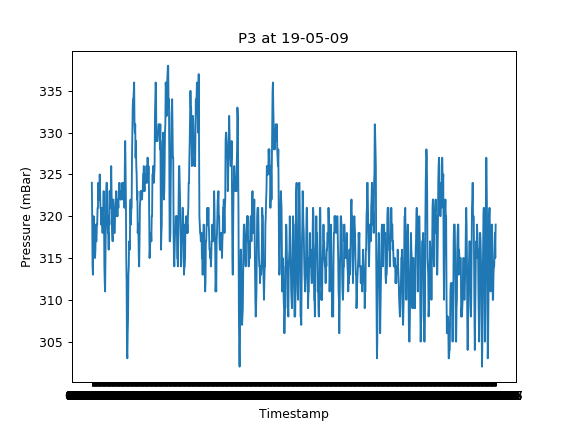

<IPython.core.display.Javascript object>


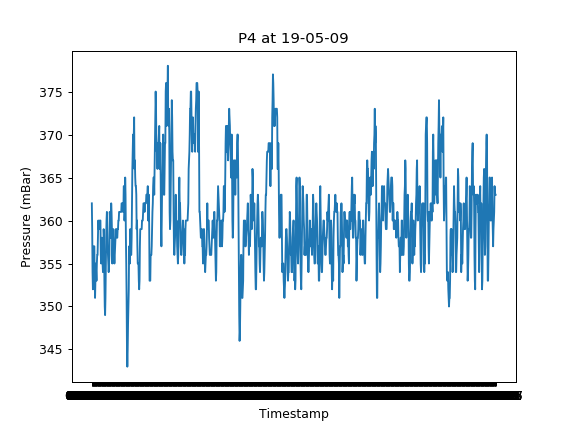

<IPython.core.display.Javascript object>


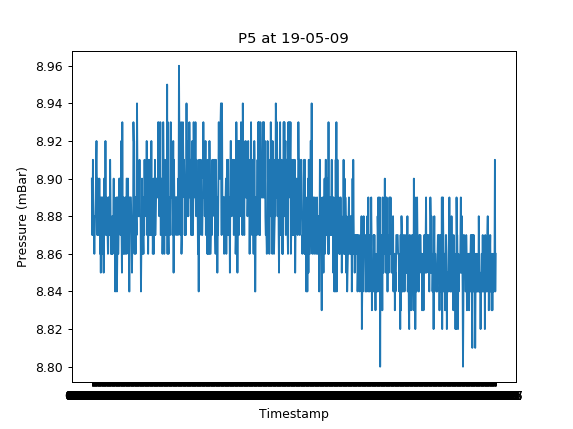

<IPython.core.display.Javascript object>


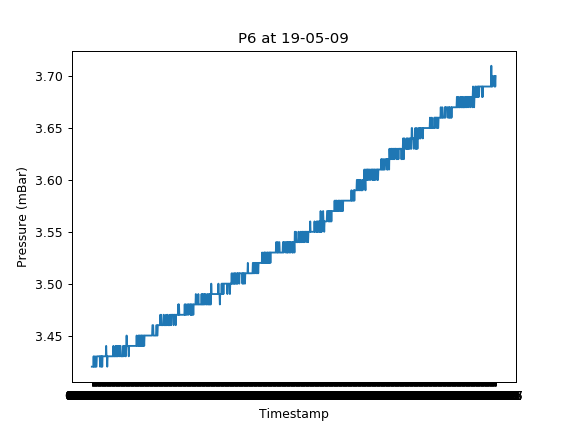

In [7]:
import csv
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\' 

#code to get the timestamp copied here from the thermometer class

logfile_name = 'maxigauge'
days_in_the_past = 0
ts = datetime.datetime.today() - datetime.timedelta(days=days_in_the_past)
ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day) 
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

file_list = []
with open(pth) as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        #print(row)
        file_list.append(row)
csvFile.close()

#
print(file_list[0])
times = [file_list[i][1] for i in range(len(file_list))]
Ps = []
for k in range(0,6):
    Ps.append(np.array([float(file_list[i][5+k*6]) for i in range(len(file_list))]))

i_start = 0
i_stop = -1
for k in range(len(Ps)):
    plt.figure()
    plt.plot(times[i_start:i_stop], Ps[k][i_start:i_stop])
    plt.ylabel('Pressure (mBar)')
    plt.xlabel('Timestamp')
    plt.title('P%d at ' % (k+1) + ds )
    

In [ ]:
ts = datetime.datetime.today()
ds = '19-04-18'
logfile_name = 'CH9 T'
pth = BF_PC_PATH + ds + '\\' + logfile_name+ ' ' + ds+'.log'

time.sleep(0.1)
try:
    T = np.loadtxt(pth, usecols = (2), delimiter = ',')
except: # in the first few seconds of a day, a new log file hasn't been created
    ts = datetime.datetime.today() - datetime.timedelta(days=1) # use the last entry in the previous day
    ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
    pth = self.logfile_path + ds + '\\CH9 T '+ds+'.log'
    T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
print(T)

plt.plot(T)

## Thermometer using BF logs

In [8]:
#set the path here of the shared desktop file
from pytopo.sweep import sweep, measure, nest, chain, szip, getter, setter, time_trace, do_experiment
from pytopo.qctools.instruments import create_inst

class Thermometer(Instrument):
    
    def __init__(self, name, logfile_path, **kw):
        super().__init__(name, **kw)        
        self.add_parameter('temperature', get_cmd=self._get_temperature, set_cmd=None, unit='K')
        
        self.add_parameter('counter', get_cmd=self._counter, set_cmd=None, unit='')
        self._ind = 0
        print('Path of network drive(set this manually dear USER): ', logfile_path)
        self.logfile_path = logfile_path
        
    def _counter(self):
        self._ind += 1
        return self._ind
    def _get_temperature(self):
        ts = datetime.datetime.today()
        ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
        pth = self.logfile_path + ds + '\\CH9 T '+ds+'.log'
        time.sleep(0.1)
        try:
            T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
        except: # in the first few seconds of a day, a new log file hasn't been created
            ts = datetime.datetime.today() - datetime.timedelta(days=1) # use the last entry in the previous day
            ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
            pth = self.logfile_path + ds + '\\CH9 T '+ds+'.log'
            T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
        return T
    
        
    
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
T_probe.temperature()



Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


0.023621099999999999

In [9]:
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\'
ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
pth = BF_PC_PATH+ ds + '\\CH9 T '+ds+'.log'

In [10]:
vna.add_channel('S12')

NameError: name 'vna' is not defined

# VNA measurements of lines.
https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/driver_examples/Qcodes%20example%20with%20Rohde%20Schwarz%20ZNB.ipynb 

In [11]:
vna = create_inst(ZNB.ZNB, "VNA", 'USB0::0x0AAD::0x01A1::101879::INSTR', force_new_instance=True, init_s_params=False)
#station.remove_component(vna)
station.add_component(vna)
# the channel we want to measure. we set init_s_params false to not have to measure all channels, thus saving time 
channel_name = 'S12' ##Now we add a channel S12: Since the HEMT is connected to port 1. 
vna.add_channel(channel_name)


Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101879, firmware:2.86) in 0.71s


In [12]:
vna.rf_off()

In [146]:
vna = create_inst(ZNB.ZNB, "VNA", 'USB0::0x0AAD::0x01A1::101879::INSTR', force_new_instance=True)

Instrument VNA already exists.
Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101879, firmware:2.86) in 0.23s


In [ ]:
vna.rf_off()
station = qc.Station(vna)

To use the VNA we likely want to turn on RF Power, which is off by default for safty in this driver. The driver default to low power but for safety lets set it to -50 dBm. The rf can be turned on and off globally and the power adjusted individually for each channel

In [ ]:
vna.channels.autoscale()
vna.channels.power(-40)

In [ ]:
#vna.channels.power(-50)
#vna.rf_off()
vna.channels.autoscale()

In [ ]:
station = qc.Station(vna)

In [13]:
import time
import numpy as np
def do_single_sweep(n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, power=-60, n_avg=10, channel_name='S12'):

    # let's set the trace properties. 
    trace = getattr(vna.channels, channel_name)
    trace.avg(n_avg)
    trace.npts(n_pts)
    trace.power(power)
    trace.start(f_start)
    trace.stop(f_stop)
    vna.rf_on()
    
    
    #now setup the qcodes measurement object
    meas = Measurement()
    #meas.register_parameter(temperature, setpoints=['time',])
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter('time', unit='s', paramtype='numeric')
    meas.register_custom_parameter('power', unit='dBm', setpoints=['time'])
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                    setpoints=['frequency'],
                                   paramtype='array'),
    meas.register_custom_parameter('magnitude_raw', unit='V', 
                                   setpoints=['frequency'],
                                   paramtype='array')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=[ 'frequency'],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        fvals = np.linspace(trace.start(), trace.stop(), trace.npts())
        mag, phase = trace.trace_mag_phase()
        mag_db = 20*np.log10(mag) #convert to dB
        result = [ ('time', time.time()),
           # (temperature, temperature()),
           # (temperature_sample, temperature_sample()),
            ('frequency', fvals),
            ('magnitude_raw', mag),
            ('magnitude_dB',mag_db ),
            ('phase', phase),
            ('power', power)]
        datasaver.add_result(
            *result
           )
    return datasaver.run_id


def do_single_sweep_with_temperature(n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, power=-60, n_avg=10, channel_name='S12'):

    """
    Saves a timestamp and a temperature. 
    """
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    trace = getattr(vna.channels, channel_name)
    trace.avg(n_avg)
    trace.npts(n_pts)
    trace.power(power)
    trace.start(f_start)
    trace.stop(f_stop)
    vna.rf_on()
    
    #now setup the qcodes measurement object
    meas = Measurement()
    #meas.register_parameter(temperature, setpoints=['time',])
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter('time', unit='s', paramtype='numeric')
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric', setpoints=['time'])
    meas.register_custom_parameter('power', unit='dBm', setpoints=['time'])
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                    setpoints=['frequency'],
                                   paramtype='array'),
    meas.register_custom_parameter('magnitude_raw', unit='V', 
                                   setpoints=['frequency'],
                                   paramtype='array')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=[ 'frequency'],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        fvals = np.linspace(trace.start(), trace.stop(), trace.npts())
        mag, phase = trace.trace_mag_phase()
        mag_db = 20*np.log10(mag) #convert to dB
        result = [ ('time', time.time()),
           # (temperature, temperature()),
           # (temperature_sample, temperature_sample()),
            ('frequency', fvals),
            ('magnitude_raw', mag),
            ('magnitude_dB',mag_db ),
            ('phase', phase),
            ('power', power),
            ('temperature', temperature)]
        datasaver.add_result(
            *result
           )
    return datasaver.run_id

In [ ]:
power_levels = list(range(5,15,5))
res_freqs = [3.535e9, 4.020e9, 4.847e9, 5.889e9]
df = 0.1e9

for power in power_levels:   
    for freq in res_freqs:
        print(freq-df)
        print(freq+df)
        print(power)
        run_id = do_single_sweep_with_temperature(n_pts = 30000, f_start = freq-df, f_stop = freq+df,
                                                  power=power, n_avg=30, channel_name=channel_name)
        
        
        


In [ ]:
run_id = do_single_sweep_with_temperature(n_pts = 10000, f_start = 3e9, f_stop = 7e9,
                                                  power=-33, n_avg=5, channel_name=channel_name)

In [ ]:
aves, bla = plot_by_id(run_id)

In [ ]:
aves, bla = plot_by_id(16)

In [ ]:
vna.rf_off()

In [ ]:
meas = Measurement()
vna.channels.S12.format('dB')
meas.register_parameter(vna.channels.S12.trace)
with meas.run() as datasaver:
    get_v = vna.channels.S12.trace.get()
    datasaver.add_result((vna.channels.S12.trace, get_v))
ax, cbax = plot_by_id(datasaver.run_id)

## 2 D sweeps: power 

In [14]:
def do_2d_power_sweep(powers=[],n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, n_avg=10, channel_name='S12'):

    """
. 
    """
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    channel = getattr(vna.channels, channel_name)
    
    channel.avg(n_avg)
    channel.npts(n_pts)
    channel.start(f_start)
    channel.stop(f_stop)
    channel.power(powers[0])
    channel.format('Complex')
    vna.rf_on()
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter('power', unit='dBm'),
    meas.register_custom_parameter('Re_S', unit='V', 
                                    setpoints=['frequency','power'],
                                   paramtype='array'),
    meas.register_custom_parameter('Im_S', unit='V', 
                                   setpoints=['frequency', 'power'],
                                   paramtype='array')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=[ 'frequency', 'power'],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        for power in powers:
            channel.power(power)
            fvals = np.linspace(channel.start(), channel.stop(), channel.npts())
            S12 = channel.trace.get()
            mag_db = 20*np.log10(np.abs(S12)) #convert to dB
            result = [ 
                ('frequency', fvals),
                ('Re_S', np.real(S12)),
                ('magnitude_dB',mag_db ),
                ('Im_S', np.imag(S12)),
                ('power', power),
                ('temperature', temperature)]
            datasaver.add_result(
                *result
               )
            print('done power %d' % power)
    return datasaver.run_id




In [ ]:
np.arange(-30,16, 1)

In [109]:
res_freqs = [3.535e9, 4.020e9, 4.847e9, 5.889e9]
df = 0.02e9
  
for freq in res_freqs:
    print(freq-df)
    print(freq+df)
    run_id_1 = do_2d_power_sweep(powers=np.arange(-20,15, 5),n_pts = 2000, f_start = freq-df, f_stop = freq+df, n_avg=500, channel_name='S12')
vna.rf_off()

3515000000.0
3555000000.0
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 52


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -20


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -15


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -10


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 0


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 10
4000000000.0
4040000000.0
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 53


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -20


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -15


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -10


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 0


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 10
4827000000.0
4867000000.0
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 54


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -20


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -15


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -10


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 0


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 10
5869000000.0
5909000000.0
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 55


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -20


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -15


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -10


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 0


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 5


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power 10


In [ ]:
data = load_by_id(23)
freqs = np.squeeze(np.array(data.get_data('frequency')))
powers = np.squeeze(np.array(data.get_data('power')))
mag = np.squeeze(np.array(data.get_data('magnitude_dB')))
plt.figure()
plt.plot(freqs.T,mag.T, 'x')

In [105]:
vna.rf_off()

In [108]:
do_2d_power_sweep(powers=np.arange(-40,0, 5),n_pts = 30000, f_start = 2.9e9, f_stop = 12e9, n_avg=50, channel_name='S12')

Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 51


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -40


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -35


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -30


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -25


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -20


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -15


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -10


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -5


51

## Temperature sweep

In [145]:
def do_2d_T_sweep(T_max = 20, power = -20,n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, n_avg=10, channel_name='S12'):

    """
. 
    """

    # let's set the trace properties. 
    channel = getattr(vna.channels, channel_name)
    
    channel.avg(n_avg)
    channel.npts(n_pts)
    channel.start(f_start)
    channel.stop(f_stop)
    channel.power(power)
    channel.format('Complex')
    vna.rf_on()
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter('power', unit='dBm'),
    meas.register_custom_parameter('Re_S', unit='V', 
                                    setpoints=['frequency','temperature'],
                                   paramtype='array'),
    meas.register_custom_parameter('Im_S', unit='V', 
                                   setpoints=['frequency', 'temperature'],
                                   paramtype='array')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=[ 'frequency', 'temperature'],
                                   paramtype='array')
    
    with meas.run() as datasaver:
      #first try to get temperature:
        T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
        temperature = T_probe.temperature()
        while temperature <  T_max:
            T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
            temperature = T_probe.temperature()
            
            fvals = np.linspace(channel.start(), channel.stop(), channel.npts())
            S12 = channel.trace.get()
            mag_db = 20*np.log10(np.abs(S12)) #convert to dB
            result = [ 
                ('frequency', fvals),
                ('Re_S', np.real(S12)),
                ('magnitude_dB',mag_db ),
                ('Im_S', np.imag(S12)),
                ('power', power),
                ('temperature', temperature)]
            datasaver.add_result(
                *result
               )
            print('done T=%.3f' % temperature)
    return datasaver.run_id




In [ ]:
do_2d_T_sweep(power=-20,T_max=20, n_pts = 20000, f_start = 3.7e9, f_stop = 6.1e9, n_avg=3, channel_name='S12')

Starting experimental run with id: 81
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.554
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.650
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.650
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.650
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.774
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.774
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.857
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.962
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=4.962
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.054
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.054
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.054
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.154
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.154
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.233
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.233
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.317
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.317
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.394
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.394
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.471
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.471
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.560
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.560
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.630
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.630
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.713
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.713
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.784
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.784
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.836
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.836
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.930
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.930
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.986
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.986
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=5.986
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.061
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.061
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.121
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.121
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.178
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.178
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.235
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.235
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.300
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.300
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.369
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.369
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.400
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.400
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.459
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.459
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.506
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.506
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.575
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.575
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.621
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.621
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.621
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.678
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.678
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.703
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.703
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.775
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.775
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.813
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.813
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.857
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.857
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.913
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.913
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.959
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=6.959
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.000
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.000
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.064
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.064
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.104
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.104
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.159
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.159
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.204
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.204
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.243
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.243
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.284
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.284
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.336
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done T=7.336
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\


# MDac

In [ ]:
mdac.restart

In [3]:
sys.path.append(r"D:\OneDrive\BF3\Code");
sys.path.append(r"D:\OneDrive\BF3\Code\labtools-master")
sys.path.append(r"D:\OneDrive\BF3\Code\StationQ\MDAC\Driver")
from MDAC import MDAC
from pytopo.sweep import sweep, measure, nest, chain, szip, getter, setter, time_trace, do_experiment
from pytopo.qctools.instruments import create_inst


mdac = MDAC('MDAC', 'ASRL4::INSTR', debug=False, logging=False)

station.add_component(mdac)

VisaIOError: VI_ERROR_RSRC_BUSY (-1073807246): The resource is valid, but VISA cannot currently access it.

In [ ]:
station.add_component(mdac)

### Keysight DMM

In [16]:
from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A
key1 = create_inst(Keysight_34465A, "key1", "USB0::0x2A8D::0x0301::MY57505052::INSTR", force_new_instance=True)

station.add_component(key1)

Connected to: Keysight Technologies 34465A (serial:MY57505052, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.39s


'key1'

In [17]:
key2 = create_inst(Keysight_34465A, "key2", "USB0::0x2A8D::0x0301::MY57505146::INSTR", force_new_instance=True)

station.add_component(key2)

Connected to: Keysight Technologies 34465A (serial:MY57505146, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.34s


'key2'

In [18]:
key3 = create_inst(Keysight_34465A, "key3", "USB0::0x2A8D::0x0101::MY57505157::INSTR", force_new_instance=True)

station.add_component(key3)

Connected to: Keysight Technologies 34465A (serial:MY57505157, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.29s


'key3'

## MDAC helper functions

In [19]:
def initialize(*channels):
    for s in channels:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
    #     ramp(g.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('close')
        s.dac_output('close')
    #     d.gnd('close')
    #     g.dac_output('close')
    #     g.smc('close')
    
def initialize_leakage(channels_to_close, channels_to_open):
    for s in channels_to_close:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('close')
        s.dac_output('close')
    for s in channels_to_open:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('open')
        s.dac_output('open')
        
        
gate_ramp_stepsize = 1e-3  #[V] previously was 1e-3
gate_ramp_delay = 0.01  #[s]

def ramp(param, target, step_size, delay): 
    current_value = param()
    step_size *= np.sign(target - current_value)
    if abs(step_size) < 1E-10: 
        return 
    
    steps = np.arange(current_value, target, step_size)
    for step in steps: 
        param(step)
        time.sleep(delay)
    
    param(target)
    
def set_mdac_in_safemode(nchan=64):
    #ivvi.dac1(0)
    #ivvi.dac3(0)
    #lockin1.amplitude(0)
    #lockin1.sine_outdc(0)
    
    print('setting mdac in safe mode')
    
    for ch in mdac.channels[:nchan]:
        ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

    # Note: we do this in separate loops because we want to be sure that
    # no currents are running anywhere before switching the relays
    for ch in mdac.channels[:nchan]:
        ch.dac_output('open')
        ch.bus('open')
        ch.gnd('open')
        ch.smc('open')
        ch.microd('open')
        #ch.divider('off')
    print('Done')

def chs_safe(*channels):
    lockin1.amplitude(0)
    lockin1.sine_outdc(0)   
    print('setting mdac in safe mode')
    for ch in channels:
        ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        ch.dac_output('open')
        ch.bus('open')
        ch.gnd('open')
        ch.smc('open')
        ch.microd('open')
    print('Done')
    
    
    
### added function by jaap

def print_voltage_current(channel):
    voltage = channel.voltage()
    gain = 1e6
    key_raw1 = key1.volt()
    current_dc1 = -key_raw1/gain
    print('raw v key 1' ,key_raw1)
    print('current_dc1', current_dc1)
    print('voltage: ', voltage)

### MDAC channel definition

In [124]:
MDAC_channels = {
    'V_bot_A' : mdac.ch18,
    'V_cut_A' : mdac.ch01,
    'V_pl_A' : mdac.ch17,
    'V_pl_B' : mdac.ch25,
    'V_bot_B' : mdac.ch01, #note that this is doubly bonded. 
    'V_pr_B' : mdac.ch26,
    'V_pr_C' : mdac.ch25,
    'V_cut_C' : mdac.ch09,
    
    
}


## MDAC gate testing

In [97]:
set_mdac_in_safemode()

setting mdac in safe mode
Done


In [21]:
mdac.ch01.voltage()

2.014996

In [ ]:
mdac.ch49.voltage()
gain = 1e6
key_raw1 = key1.volt()
current_dc1 = -key_raw1/gain
print('raw v key 1' ,key_raw1)
print('current_dc1', current_dc1)


In [ ]:
print('ch V', mdac.ch49.voltage())
initialize(mdac.ch49)
gain = 1e6
key_raw1 = key1.volt()
current_dc1 = -key_raw1/gain
print('raw v key 1' ,key_raw1)
print('current_dc1', current_dc1)


In [ ]:
mdac.ch09.voltage()

In [ ]:
mdac.ch49.voltage(1e-3)
print('ch V', mdac.ch49.voltage())
key_raw1 = key1.volt()
current_dc1 = -key_raw1/gain
print('raw v key 1' ,key_raw1)
print('current_dc1', current_dc1)

In [ ]:
#initialize(mdac.ch09) 
ramp(mdac.ch09.voltage, 0.0, gate_ramp_stepsize, gate_ramp_delay)

In [125]:
initialize(mdac.ch26) # Vpr B
initialize(mdac.ch01) # V(Vbot B, VC A)
initialize(mdac.ch17) # (Vpl A) 
initialize(mdac.ch18) # (V_bot A)
initialize(mdac.ch25) # 1. V_pr C 1. V_pr C
initialize(mdac.ch09)
initialize(mdac.ch03)
#initialize(mdac.ch24)

## 2D gate frequency sweeps

In [22]:
def do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name='V_g',
                            gate_ramp_stepsize = 1e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.01 , #[s]
                            power=-30, n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, n_avg=10, channel_name='S12'):

    """
   
    """
    #check the gate voltage
    print("Starting voltage", gate_channel.voltage())
    
    
    
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    vna_channel = getattr(vna.channels, channel_name)
    
    vna_channel.avg(n_avg)
    vna_channel.npts(n_pts)
    vna_channel.start(f_start)
    vna_channel.stop(f_stop)
    vna_channel.power(power)
    vna_channel.format('Complex')
    vna.rf_on()
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter(gate_name, unit='V'),
    meas.register_custom_parameter('power', unit='dBm'),
    meas.register_custom_parameter('Re_S', unit='V', 
                                    setpoints=['frequency',gate_name],
                                   paramtype='array'),
    meas.register_custom_parameter('Im_S', unit='V', 
                                   setpoints=['frequency', gate_name],
                                   paramtype='array')
    meas.register_custom_parameter('mag', unit='V', 
                                   setpoints=['frequency', gate_name],
                                   paramtype='array')
    meas.register_custom_parameter('phase', unit='V', 
                                   setpoints=['frequency', gate_name],
                                   paramtype='array')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=[ 'frequency', gate_name],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        for gate_voltage in gate_voltages:
            
            #ramp the gate voltage
            print("Ramping %s to %.2e" % (gate_name, gate_voltage))
            ramp(gate_channel.voltage, gate_voltage, gate_ramp_stepsize, gate_ramp_delay )
            print("Done ramping")
            fvals = np.linspace(vna_channel.start(), vna_channel.stop(), vna_channel.npts())
            S12 = vna_channel.trace.get()
            mag_db = 20*np.log10(np.abs(S12)) #convert to dB
            result = [ 
                ('frequency', fvals),
                ('Re_S', np.real(S12)),
                ('magnitude_dB',mag_db ),
                ('Im_S', np.imag(S12)),
                ('phase', np.angle(S12)),
                ('mag', np.abs(S12)),
                ('power', power),
                (gate_name, gate_voltage),
                ('temperature', temperature)]
            datasaver.add_result(
                *result
               )
            print('done power %d' % power)
    return datasaver.run_id




def do_multiple_gate_resonator_sweep(
                            gate_channel, gate_voltages,gate_name='V_g',
                            gate_ramp_stepsize = 1e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.01 , #[s]
                            power=-30, n_pts = 10000, f_start = 3.2e9, f_stop = 6.5e9, n_avg=10, channel_name='S12'):

    """
   
    """
    if not isinstance(gate_channel, list):
        gate_channel = [gate_channel] #allow for multple gates to be swept at once. 
        if not isinstance(gate_name, list):
            gate_name = [gate_name]
        else:
            raise Exception('Either give both gate channel and gate name as a list or both as a value..')
    
    #check the gate voltage
    for chan in gate_channel:
        print(chan,chan.voltage())
    
    #set the gate name to be all gates together
    long_gate_name = ''
    for name in gate_name:
        long_gate_name += name + '_' #make one variable out of multiple gates snce they are swept together
    
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    vna_channel = getattr(vna.channels, channel_name)
    
    vna_channel.avg(n_avg)
    vna_channel.npts(n_pts)
    vna_channel.start(f_start)
    vna_channel.stop(f_stop)
    vna_channel.power(power)
    vna_channel.format('Complex')
    vna.rf_on()
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency', unit='Hz',
                                   paramtype='array')
    meas.register_custom_parameter(long_gate_name, unit='V'),
    meas.register_custom_parameter('power', unit='dBm'),
    meas.register_custom_parameter('Re_S', unit='V', 
                                    setpoints=['frequency',long_gate_name],
                                   paramtype='array'),
    meas.register_custom_parameter('Im_S', unit='V', 
                                   setpoints=['frequency', long_gate_name],
                                   paramtype='array')
    meas.register_custom_parameter('mag', unit='V', 
                                   setpoints=['frequency', long_gate_name],
                                   paramtype='array')
    meas.register_custom_parameter('phase', unit='V', 
                                   setpoints=['frequency', long_gate_name],
                                   paramtype='array')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=[ 'frequency', long_gate_name],
                                   paramtype='array')
    
    with meas.run() as datasaver:
        for gate_voltage in gate_voltages:
            
            #ramp the gate voltage
            for i in range(len(gate_channel)):
                print("Ramping %s to %.2e" % (gate_name[i], gate_voltage))
                ramp(gate_channel[i].voltage, gate_voltage, gate_ramp_stepsize, gate_ramp_delay )
                print("Done ramping")
            fvals = np.linspace(vna_channel.start(), vna_channel.stop(), vna_channel.npts())
            S12 = vna_channel.trace.get()
            mag_db = 20*np.log10(np.abs(S12)) #convert to dB
            result = [ 
                ('frequency', fvals),
                ('Re_S', np.real(S12)),
                ('magnitude_dB',mag_db ),
                ('Im_S', np.imag(S12)),
                ('phase', np.angle(S12)),
                ('mag', np.abs(S12)),
                ('power', power),
                (long_gate_name, gate_voltage),
                ('temperature', temperature)]
            datasaver.add_result(
                *result
               )
            print('done power %d' % power)
    return datasaver.run_id


In [ ]:
gate_channel = mdac.ch09
gate_voltages = np.linspace(-2,2,21)
gate_name = 'V_cutter_C'

run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-20, n_pts = 30000, f_start = 4.01e9, f_stop = 4.03e9, n_avg=100, channel_name='S12')

In [ ]:
plot_by_id(run_id)

In [ ]:
data = load_by_id(run_id)
freqs = np.squeeze(np.array(data.get_data('frequency')))
powers = np.squeeze(np.array(data.get_data('power')))
mag = np.squeeze(np.array(data.get_data('magnitude_dB')))
re_s21 = np.squeeze(np.array(data.get_data('Re_S'))) 
im_s21 = np.squeeze(np.array(data.get_data('Im_S'))) 
s21 = re_s21 + 1j*im_s21
phase_s21 = np.angle(s21)
amp_s21 = np.abs(s21)
plt.figure()
i_min = 0
i_max = -1
plt.plot(freqs[:,i_min:i_max].T,mag[:,i_min:i_max].T)
plt.figure()
plt.plot(freqs[:,i_min:i_max].T,phase_s21[:,i_min:i_max].T)
plt.figure()
plt.plot(freqs[:,i_min:i_max].T,amp_s21[:,i_min:i_max].T)

In [ ]:
plt.figure()
plt.imshow(freqs,mag_dB)

#### Vbot B, Vcutter A

In [ ]:
gate_channel = mdac.ch01
gate_voltages = np.linspace(-2,2,101)
gate_name = 'V_bot_B_Cut_A'

run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 100, f_start = 4.844e9, f_stop = 4.853e9, n_avg=40, channel_name='S12')

run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 100, f_start = 5.88e9, f_stop = 5.90e9, n_avg=40, channel_name='S12')

#### V bot A + Vcutter A

In [ ]:
gate_channel = mdac.ch01
gate_voltages = np.linspace(1,2,51)
gate_name = 'V_cut_A'


df = 0.004e9
Vbots = [-4]
#resonator A
for vBot in Vbots:
    ramp(mdac.ch18.voltage, vBot, gate_ramp_stepsize,gate_ramp_delay)
    f0 = 4.847e9
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-30, n_pts = 300, f_start = f0-df, f_stop = f0+df, n_avg=1000, channel_name='S12')


#### More Vbot A + VCutter A

In [ ]:
gate_channel = mdac.ch01
gate_voltages = np.linspace(-3,3,201)
gate_name = 'V_cut_A'


df = 0.005e9
Vbots = [-3]
#resonator A
for vBot in Vbots:
    ramp(mdac.ch18.voltage, vBot, gate_ramp_stepsize,gate_ramp_delay)
    f0 = 4.847e9
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 600, f_start = f0-df, f_stop = f0+df, n_avg=100, channel_name='S12')


In [ ]:
gate_channel = mdac.ch18
gate_voltages = np.linspace(-3,3,151)
gate_name = 'V_bot_B_Cut_A'


f0s = [5.89e9]
df = 0.01e9
#resonator A
for f0 in f0s:
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 400, f_start = f0-df, f_stop = f0+df, n_avg=100, channel_name='S12')


#### Vpr C V pl B

In [ ]:
gate_channel = mdac.ch25
gate_voltages = np.linspace(-3,3,151)
gate_name = 'V_Pr_C_V_pl_B'


f0s = [4.02e9, 4.847e9, 5.89e9]
df = 0.004e9
#resonator A
for f0 in f0s:
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 400, f_start = f0-df, f_stop = f0+df, n_avg=100, channel_name='S12')


#### V plunger right B

In [ ]:
initialize(mdac.ch26)

In [ ]:
gate_channel = mdac.ch26
gate_voltages = np.linspace(-3,3,151)
gate_name = 'V_Pr_C_V_pl_B'


f0s = [3.535e9, 4.02e9, 4.847e9, 5.89e9]
df = 0.005e9
#resonator A
for f0 in f0s:
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 400, f_start = f0-df, f_stop = f0+df, n_avg=100, channel_name='S12')


#### Vcutter C

In [ ]:
initialize(mdac.ch09)
initialize(mdac)

In [ ]:

gate_channel = mdac.ch09
gate_voltages = np.linspace(-3.0,3.0,151)
gate_name = 'V_cutter_C'


f0s = [5.89e9, 3.535e9, 4.02e9, 4.847e9]
df = 0.005e9
#resonator A
for f0 in f0s:
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 1200, f_start = f0-df, f_stop = f0+df, n_avg=100, channel_name='S12')


In [ ]:
ramp(mdac.ch17.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
#initialize(mdac.ch17)

In [ ]:
gate_channel = mdac.ch17
gate_voltages = np.linspace(-3,3,151)
gate_name = 'V_Pl_A'


f0s = [3.535e9, 4.02e9, 4.847e9, 5.89e9]
df = 0.004e9
#resonator A
for f0 in f0s:
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 300, f_start = f0-df, f_stop = f0+df, n_avg=100, channel_name='S12')


In [ ]:
ramp(mdac.ch18.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

### Multiple gates at the same time frequency sweep

In [30]:
power = -30
n_pts = 1000
n_avg = 300
f = 4.84725e9
df = 3e6

#set the Bfield. 
set_yoko_field(0)

exp = qc.new_experiment("Multi-gate-freq sweep B=%.4e npts=%d n_avg=%d power=%d" %(get_yoko_field(),n_pts, n_avg,power)  , sample_name="abs_w1_5_1_1")

ramp_back_gates = False

gate_channel = [MDAC_channels['V_cut_A'], MDAC_channels['V_bot_A'], MDAC_channels['V_pl_A']]
#gate_channel = [MDAC_channels['V_bot_B'], MDAC_channels['V_pr_B'], MDAC_channels['V_pl_B']]
gate_voltages = np.arange(3,3.2,0.005)
gate_name = ['V_cut_A', 'V_bot_A', 'V_pl_A']
#gate_name = ['V_bot_B', 'V_pr_B', 'V_pl_B']
if ramp_back_gates:
    print('ramping back gates')
    for gate in gate_name:
        ramp(MDAC_channels[gate].voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

t0 = time.time()
#now do the real thing
do_multiple_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 1e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.01 , #[s]
                            power=-33, n_pts = 500, f_start = f-df, f_stop = f+df, n_avg=n_avg, channel_name='S12')

print(" Time elapsed: %.4f" % (time.time()-t0))

<MDACChannel: MDAC_chan1 of MDAC: MDAC> 2.014996
<MDACChannel: MDAC_chan18 of MDAC: MDAC> 2.014997
<MDACChannel: MDAC_chan17 of MDAC: MDAC> 2.014999
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 1
Ramping V_cut_A to 2.00e+00
Done ramping
Ramping V_bot_A to 2.00e+00
Done ramping
Ramping V_pl_A to 2.00e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.00e+00
Done ramping
Ramping V_bot_A to 2.00e+00
Done ramping
Ramping V_pl_A to 2.00e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.01e+00
Done ramping
Ramping V_bot_A to 2.01e+00
Done ramping
Ramping V_pl_A to 2.01e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.01e+00
Done ramping
Ramping V_bot_A to 2.01e+00
Done ramping
Ramping V_pl_A to 2.01e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.02e+00
Done ramping
Ramping V_bot_A to 2.02e+00
Done ramping
Ramping V_pl_A to 2.02e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.02e+00
Done ramping
Ramping V_bot_A to 2.02e+00
Done ramping
Ramping V_pl_A to 2.02e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.03e+00
Done ramping
Ramping V_bot_A to 2.03e+00
Done ramping
Ramping V_pl_A to 2.03e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.03e+00
Done ramping
Ramping V_bot_A to 2.03e+00
Done ramping
Ramping V_pl_A to 2.03e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.04e+00
Done ramping
Ramping V_bot_A to 2.04e+00
Done ramping
Ramping V_pl_A to 2.04e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.04e+00
Done ramping
Ramping V_bot_A to 2.04e+00
Done ramping
Ramping V_pl_A to 2.04e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.05e+00
Done ramping
Ramping V_bot_A to 2.05e+00
Done ramping
Ramping V_pl_A to 2.05e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.05e+00
Done ramping
Ramping V_bot_A to 2.05e+00
Done ramping
Ramping V_pl_A to 2.05e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.06e+00
Done ramping
Ramping V_bot_A to 2.06e+00
Done ramping
Ramping V_pl_A to 2.06e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.06e+00
Done ramping
Ramping V_bot_A to 2.06e+00
Done ramping
Ramping V_pl_A to 2.06e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.07e+00
Done ramping
Ramping V_bot_A to 2.07e+00
Done ramping
Ramping V_pl_A to 2.07e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.07e+00
Done ramping
Ramping V_bot_A to 2.07e+00
Done ramping
Ramping V_pl_A to 2.07e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.08e+00
Done ramping
Ramping V_bot_A to 2.08e+00
Done ramping
Ramping V_pl_A to 2.08e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.08e+00
Done ramping
Ramping V_bot_A to 2.08e+00
Done ramping
Ramping V_pl_A to 2.08e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.09e+00
Done ramping
Ramping V_bot_A to 2.09e+00
Done ramping
Ramping V_pl_A to 2.09e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.09e+00
Done ramping
Ramping V_bot_A to 2.09e+00
Done ramping
Ramping V_pl_A to 2.09e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.10e+00
Done ramping
Ramping V_bot_A to 2.10e+00
Done ramping
Ramping V_pl_A to 2.10e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.10e+00
Done ramping
Ramping V_bot_A to 2.10e+00
Done ramping
Ramping V_pl_A to 2.10e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.11e+00
Done ramping
Ramping V_bot_A to 2.11e+00
Done ramping
Ramping V_pl_A to 2.11e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.11e+00
Done ramping
Ramping V_bot_A to 2.11e+00
Done ramping
Ramping V_pl_A to 2.11e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.12e+00
Done ramping
Ramping V_bot_A to 2.12e+00
Done ramping
Ramping V_pl_A to 2.12e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.12e+00
Done ramping
Ramping V_bot_A to 2.12e+00
Done ramping
Ramping V_pl_A to 2.12e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.13e+00
Done ramping
Ramping V_bot_A to 2.13e+00
Done ramping
Ramping V_pl_A to 2.13e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.13e+00
Done ramping
Ramping V_bot_A to 2.13e+00
Done ramping
Ramping V_pl_A to 2.13e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.14e+00
Done ramping
Ramping V_bot_A to 2.14e+00
Done ramping
Ramping V_pl_A to 2.14e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.14e+00
Done ramping
Ramping V_bot_A to 2.14e+00
Done ramping
Ramping V_pl_A to 2.14e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.15e+00
Done ramping
Ramping V_bot_A to 2.15e+00
Done ramping
Ramping V_pl_A to 2.15e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.15e+00
Done ramping
Ramping V_bot_A to 2.15e+00
Done ramping
Ramping V_pl_A to 2.15e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.16e+00
Done ramping
Ramping V_bot_A to 2.16e+00
Done ramping
Ramping V_pl_A to 2.16e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.16e+00
Done ramping
Ramping V_bot_A to 2.16e+00
Done ramping
Ramping V_pl_A to 2.16e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.17e+00
Done ramping
Ramping V_bot_A to 2.17e+00
Done ramping
Ramping V_pl_A to 2.17e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.17e+00
Done ramping
Ramping V_bot_A to 2.17e+00
Done ramping
Ramping V_pl_A to 2.17e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.18e+00
Done ramping
Ramping V_bot_A to 2.18e+00
Done ramping
Ramping V_pl_A to 2.18e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.18e+00
Done ramping
Ramping V_bot_A to 2.18e+00
Done ramping
Ramping V_pl_A to 2.18e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.19e+00
Done ramping
Ramping V_bot_A to 2.19e+00
Done ramping
Ramping V_pl_A to 2.19e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.19e+00
Done ramping
Ramping V_bot_A to 2.19e+00
Done ramping
Ramping V_pl_A to 2.19e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.20e+00
Done ramping
Ramping V_bot_A to 2.20e+00
Done ramping
Ramping V_pl_A to 2.20e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.20e+00
Done ramping
Ramping V_bot_A to 2.20e+00
Done ramping
Ramping V_pl_A to 2.20e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.21e+00
Done ramping
Ramping V_bot_A to 2.21e+00
Done ramping
Ramping V_pl_A to 2.21e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.21e+00
Done ramping
Ramping V_bot_A to 2.21e+00
Done ramping
Ramping V_pl_A to 2.21e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.22e+00
Done ramping
Ramping V_bot_A to 2.22e+00
Done ramping
Ramping V_pl_A to 2.22e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.22e+00
Done ramping
Ramping V_bot_A to 2.22e+00
Done ramping
Ramping V_pl_A to 2.22e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.23e+00
Done ramping
Ramping V_bot_A to 2.23e+00
Done ramping
Ramping V_pl_A to 2.23e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.23e+00
Done ramping
Ramping V_bot_A to 2.23e+00
Done ramping
Ramping V_pl_A to 2.23e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.24e+00
Done ramping
Ramping V_bot_A to 2.24e+00
Done ramping
Ramping V_pl_A to 2.24e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.24e+00
Done ramping
Ramping V_bot_A to 2.24e+00
Done ramping
Ramping V_pl_A to 2.24e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.25e+00
Done ramping
Ramping V_bot_A to 2.25e+00
Done ramping
Ramping V_pl_A to 2.25e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.25e+00
Done ramping
Ramping V_bot_A to 2.25e+00
Done ramping
Ramping V_pl_A to 2.25e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.26e+00
Done ramping
Ramping V_bot_A to 2.26e+00
Done ramping
Ramping V_pl_A to 2.26e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.26e+00
Done ramping
Ramping V_bot_A to 2.26e+00
Done ramping
Ramping V_pl_A to 2.26e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.27e+00
Done ramping
Ramping V_bot_A to 2.27e+00
Done ramping
Ramping V_pl_A to 2.27e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.27e+00
Done ramping
Ramping V_bot_A to 2.27e+00
Done ramping
Ramping V_pl_A to 2.27e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.28e+00
Done ramping
Ramping V_bot_A to 2.28e+00
Done ramping
Ramping V_pl_A to 2.28e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.28e+00
Done ramping
Ramping V_bot_A to 2.28e+00
Done ramping
Ramping V_pl_A to 2.28e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.29e+00
Done ramping
Ramping V_bot_A to 2.29e+00
Done ramping
Ramping V_pl_A to 2.29e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.29e+00
Done ramping
Ramping V_bot_A to 2.29e+00
Done ramping
Ramping V_pl_A to 2.29e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.30e+00
Done ramping
Ramping V_bot_A to 2.30e+00
Done ramping
Ramping V_pl_A to 2.30e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.30e+00
Done ramping
Ramping V_bot_A to 2.30e+00
Done ramping
Ramping V_pl_A to 2.30e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.31e+00
Done ramping
Ramping V_bot_A to 2.31e+00
Done ramping
Ramping V_pl_A to 2.31e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.31e+00
Done ramping
Ramping V_bot_A to 2.31e+00
Done ramping
Ramping V_pl_A to 2.31e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.32e+00
Done ramping
Ramping V_bot_A to 2.32e+00
Done ramping
Ramping V_pl_A to 2.32e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.32e+00
Done ramping
Ramping V_bot_A to 2.32e+00
Done ramping
Ramping V_pl_A to 2.32e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.33e+00
Done ramping
Ramping V_bot_A to 2.33e+00
Done ramping
Ramping V_pl_A to 2.33e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.33e+00
Done ramping
Ramping V_bot_A to 2.33e+00
Done ramping
Ramping V_pl_A to 2.33e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.34e+00
Done ramping
Ramping V_bot_A to 2.34e+00
Done ramping
Ramping V_pl_A to 2.34e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.34e+00
Done ramping
Ramping V_bot_A to 2.34e+00
Done ramping
Ramping V_pl_A to 2.34e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.35e+00
Done ramping
Ramping V_bot_A to 2.35e+00
Done ramping
Ramping V_pl_A to 2.35e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.35e+00
Done ramping
Ramping V_bot_A to 2.35e+00
Done ramping
Ramping V_pl_A to 2.35e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.36e+00
Done ramping
Ramping V_bot_A to 2.36e+00
Done ramping
Ramping V_pl_A to 2.36e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.36e+00
Done ramping
Ramping V_bot_A to 2.36e+00
Done ramping
Ramping V_pl_A to 2.36e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.37e+00
Done ramping
Ramping V_bot_A to 2.37e+00
Done ramping
Ramping V_pl_A to 2.37e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.37e+00
Done ramping
Ramping V_bot_A to 2.37e+00
Done ramping
Ramping V_pl_A to 2.37e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.38e+00
Done ramping
Ramping V_bot_A to 2.38e+00
Done ramping
Ramping V_pl_A to 2.38e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.38e+00
Done ramping
Ramping V_bot_A to 2.38e+00
Done ramping
Ramping V_pl_A to 2.38e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.39e+00
Done ramping
Ramping V_bot_A to 2.39e+00
Done ramping
Ramping V_pl_A to 2.39e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.39e+00
Done ramping
Ramping V_bot_A to 2.39e+00
Done ramping
Ramping V_pl_A to 2.39e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.40e+00
Done ramping
Ramping V_bot_A to 2.40e+00
Done ramping
Ramping V_pl_A to 2.40e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.40e+00
Done ramping
Ramping V_bot_A to 2.40e+00
Done ramping
Ramping V_pl_A to 2.40e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.41e+00
Done ramping
Ramping V_bot_A to 2.41e+00
Done ramping
Ramping V_pl_A to 2.41e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.41e+00
Done ramping
Ramping V_bot_A to 2.41e+00
Done ramping
Ramping V_pl_A to 2.41e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.42e+00
Done ramping
Ramping V_bot_A to 2.42e+00
Done ramping
Ramping V_pl_A to 2.42e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.42e+00
Done ramping
Ramping V_bot_A to 2.42e+00
Done ramping
Ramping V_pl_A to 2.42e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.43e+00
Done ramping
Ramping V_bot_A to 2.43e+00
Done ramping
Ramping V_pl_A to 2.43e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.43e+00
Done ramping
Ramping V_bot_A to 2.43e+00
Done ramping
Ramping V_pl_A to 2.43e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.44e+00
Done ramping
Ramping V_bot_A to 2.44e+00
Done ramping
Ramping V_pl_A to 2.44e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.44e+00
Done ramping
Ramping V_bot_A to 2.44e+00
Done ramping
Ramping V_pl_A to 2.44e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.45e+00
Done ramping
Ramping V_bot_A to 2.45e+00
Done ramping
Ramping V_pl_A to 2.45e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.45e+00
Done ramping
Ramping V_bot_A to 2.45e+00
Done ramping
Ramping V_pl_A to 2.45e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.46e+00
Done ramping
Ramping V_bot_A to 2.46e+00
Done ramping
Ramping V_pl_A to 2.46e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.46e+00
Done ramping
Ramping V_bot_A to 2.46e+00
Done ramping
Ramping V_pl_A to 2.46e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.47e+00
Done ramping
Ramping V_bot_A to 2.47e+00
Done ramping
Ramping V_pl_A to 2.47e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.47e+00
Done ramping
Ramping V_bot_A to 2.47e+00
Done ramping
Ramping V_pl_A to 2.47e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.48e+00
Done ramping
Ramping V_bot_A to 2.48e+00
Done ramping
Ramping V_pl_A to 2.48e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.48e+00
Done ramping
Ramping V_bot_A to 2.48e+00
Done ramping
Ramping V_pl_A to 2.48e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.49e+00
Done ramping
Ramping V_bot_A to 2.49e+00
Done ramping
Ramping V_pl_A to 2.49e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.49e+00
Done ramping
Ramping V_bot_A to 2.49e+00
Done ramping
Ramping V_pl_A to 2.49e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.50e+00
Done ramping
Ramping V_bot_A to 2.50e+00
Done ramping
Ramping V_pl_A to 2.50e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.50e+00
Done ramping
Ramping V_bot_A to 2.50e+00
Done ramping
Ramping V_pl_A to 2.50e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.51e+00
Done ramping
Ramping V_bot_A to 2.51e+00
Done ramping
Ramping V_pl_A to 2.51e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.51e+00
Done ramping
Ramping V_bot_A to 2.51e+00
Done ramping
Ramping V_pl_A to 2.51e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.52e+00
Done ramping
Ramping V_bot_A to 2.52e+00
Done ramping
Ramping V_pl_A to 2.52e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.52e+00
Done ramping
Ramping V_bot_A to 2.52e+00
Done ramping
Ramping V_pl_A to 2.52e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.53e+00
Done ramping
Ramping V_bot_A to 2.53e+00
Done ramping
Ramping V_pl_A to 2.53e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.53e+00
Done ramping
Ramping V_bot_A to 2.53e+00
Done ramping
Ramping V_pl_A to 2.53e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.54e+00
Done ramping
Ramping V_bot_A to 2.54e+00
Done ramping
Ramping V_pl_A to 2.54e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.54e+00
Done ramping
Ramping V_bot_A to 2.54e+00
Done ramping
Ramping V_pl_A to 2.54e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.55e+00
Done ramping
Ramping V_bot_A to 2.55e+00
Done ramping
Ramping V_pl_A to 2.55e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.55e+00
Done ramping
Ramping V_bot_A to 2.55e+00
Done ramping
Ramping V_pl_A to 2.55e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.56e+00
Done ramping
Ramping V_bot_A to 2.56e+00
Done ramping
Ramping V_pl_A to 2.56e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.56e+00
Done ramping
Ramping V_bot_A to 2.56e+00
Done ramping
Ramping V_pl_A to 2.56e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.57e+00
Done ramping
Ramping V_bot_A to 2.57e+00
Done ramping
Ramping V_pl_A to 2.57e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.57e+00
Done ramping
Ramping V_bot_A to 2.57e+00
Done ramping
Ramping V_pl_A to 2.57e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.58e+00
Done ramping
Ramping V_bot_A to 2.58e+00
Done ramping
Ramping V_pl_A to 2.58e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.58e+00
Done ramping
Ramping V_bot_A to 2.58e+00
Done ramping
Ramping V_pl_A to 2.58e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.59e+00
Done ramping
Ramping V_bot_A to 2.59e+00
Done ramping
Ramping V_pl_A to 2.59e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.59e+00
Done ramping
Ramping V_bot_A to 2.59e+00
Done ramping
Ramping V_pl_A to 2.59e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.60e+00
Done ramping
Ramping V_bot_A to 2.60e+00
Done ramping
Ramping V_pl_A to 2.60e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.60e+00
Done ramping
Ramping V_bot_A to 2.60e+00
Done ramping
Ramping V_pl_A to 2.60e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.61e+00
Done ramping
Ramping V_bot_A to 2.61e+00
Done ramping
Ramping V_pl_A to 2.61e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.61e+00
Done ramping
Ramping V_bot_A to 2.61e+00
Done ramping
Ramping V_pl_A to 2.61e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.62e+00
Done ramping
Ramping V_bot_A to 2.62e+00
Done ramping
Ramping V_pl_A to 2.62e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.62e+00
Done ramping
Ramping V_bot_A to 2.62e+00
Done ramping
Ramping V_pl_A to 2.62e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.63e+00
Done ramping
Ramping V_bot_A to 2.63e+00
Done ramping
Ramping V_pl_A to 2.63e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.63e+00
Done ramping
Ramping V_bot_A to 2.63e+00
Done ramping
Ramping V_pl_A to 2.63e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.64e+00
Done ramping
Ramping V_bot_A to 2.64e+00
Done ramping
Ramping V_pl_A to 2.64e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.64e+00
Done ramping
Ramping V_bot_A to 2.64e+00
Done ramping
Ramping V_pl_A to 2.64e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.65e+00
Done ramping
Ramping V_bot_A to 2.65e+00
Done ramping
Ramping V_pl_A to 2.65e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.65e+00
Done ramping
Ramping V_bot_A to 2.65e+00
Done ramping
Ramping V_pl_A to 2.65e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.66e+00
Done ramping
Ramping V_bot_A to 2.66e+00
Done ramping
Ramping V_pl_A to 2.66e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.66e+00
Done ramping
Ramping V_bot_A to 2.66e+00
Done ramping
Ramping V_pl_A to 2.66e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.67e+00
Done ramping
Ramping V_bot_A to 2.67e+00
Done ramping
Ramping V_pl_A to 2.67e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.67e+00
Done ramping
Ramping V_bot_A to 2.67e+00
Done ramping
Ramping V_pl_A to 2.67e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.68e+00
Done ramping
Ramping V_bot_A to 2.68e+00
Done ramping
Ramping V_pl_A to 2.68e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.68e+00
Done ramping
Ramping V_bot_A to 2.68e+00
Done ramping
Ramping V_pl_A to 2.68e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.69e+00
Done ramping
Ramping V_bot_A to 2.69e+00
Done ramping
Ramping V_pl_A to 2.69e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.69e+00
Done ramping
Ramping V_bot_A to 2.69e+00
Done ramping
Ramping V_pl_A to 2.69e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.70e+00
Done ramping
Ramping V_bot_A to 2.70e+00
Done ramping
Ramping V_pl_A to 2.70e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.70e+00
Done ramping
Ramping V_bot_A to 2.70e+00
Done ramping
Ramping V_pl_A to 2.70e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.71e+00
Done ramping
Ramping V_bot_A to 2.71e+00
Done ramping
Ramping V_pl_A to 2.71e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.71e+00
Done ramping
Ramping V_bot_A to 2.71e+00
Done ramping
Ramping V_pl_A to 2.71e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.72e+00
Done ramping
Ramping V_bot_A to 2.72e+00
Done ramping
Ramping V_pl_A to 2.72e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.72e+00
Done ramping
Ramping V_bot_A to 2.72e+00
Done ramping
Ramping V_pl_A to 2.72e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.73e+00
Done ramping
Ramping V_bot_A to 2.73e+00
Done ramping
Ramping V_pl_A to 2.73e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.73e+00
Done ramping
Ramping V_bot_A to 2.73e+00
Done ramping
Ramping V_pl_A to 2.73e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.74e+00
Done ramping
Ramping V_bot_A to 2.74e+00
Done ramping
Ramping V_pl_A to 2.74e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.74e+00
Done ramping
Ramping V_bot_A to 2.74e+00
Done ramping
Ramping V_pl_A to 2.74e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.75e+00
Done ramping
Ramping V_bot_A to 2.75e+00
Done ramping
Ramping V_pl_A to 2.75e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.75e+00
Done ramping
Ramping V_bot_A to 2.75e+00
Done ramping
Ramping V_pl_A to 2.75e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.76e+00
Done ramping
Ramping V_bot_A to 2.76e+00
Done ramping
Ramping V_pl_A to 2.76e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.76e+00
Done ramping
Ramping V_bot_A to 2.76e+00
Done ramping
Ramping V_pl_A to 2.76e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.77e+00
Done ramping
Ramping V_bot_A to 2.77e+00
Done ramping
Ramping V_pl_A to 2.77e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.77e+00
Done ramping
Ramping V_bot_A to 2.77e+00
Done ramping
Ramping V_pl_A to 2.77e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.78e+00
Done ramping
Ramping V_bot_A to 2.78e+00
Done ramping
Ramping V_pl_A to 2.78e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.78e+00
Done ramping
Ramping V_bot_A to 2.78e+00
Done ramping
Ramping V_pl_A to 2.78e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.79e+00
Done ramping
Ramping V_bot_A to 2.79e+00
Done ramping
Ramping V_pl_A to 2.79e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.79e+00
Done ramping
Ramping V_bot_A to 2.79e+00
Done ramping
Ramping V_pl_A to 2.79e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.80e+00
Done ramping
Ramping V_bot_A to 2.80e+00
Done ramping
Ramping V_pl_A to 2.80e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.80e+00
Done ramping
Ramping V_bot_A to 2.80e+00
Done ramping
Ramping V_pl_A to 2.80e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.81e+00
Done ramping
Ramping V_bot_A to 2.81e+00
Done ramping
Ramping V_pl_A to 2.81e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.81e+00
Done ramping
Ramping V_bot_A to 2.81e+00
Done ramping
Ramping V_pl_A to 2.81e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.82e+00
Done ramping
Ramping V_bot_A to 2.82e+00
Done ramping
Ramping V_pl_A to 2.82e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.82e+00
Done ramping
Ramping V_bot_A to 2.82e+00
Done ramping
Ramping V_pl_A to 2.82e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.83e+00
Done ramping
Ramping V_bot_A to 2.83e+00
Done ramping
Ramping V_pl_A to 2.83e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.83e+00
Done ramping
Ramping V_bot_A to 2.83e+00
Done ramping
Ramping V_pl_A to 2.83e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.84e+00
Done ramping
Ramping V_bot_A to 2.84e+00
Done ramping
Ramping V_pl_A to 2.84e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.84e+00
Done ramping
Ramping V_bot_A to 2.84e+00
Done ramping
Ramping V_pl_A to 2.84e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.85e+00
Done ramping
Ramping V_bot_A to 2.85e+00
Done ramping
Ramping V_pl_A to 2.85e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.85e+00
Done ramping
Ramping V_bot_A to 2.85e+00
Done ramping
Ramping V_pl_A to 2.85e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.86e+00
Done ramping
Ramping V_bot_A to 2.86e+00
Done ramping
Ramping V_pl_A to 2.86e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.86e+00
Done ramping
Ramping V_bot_A to 2.86e+00
Done ramping
Ramping V_pl_A to 2.86e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.87e+00
Done ramping
Ramping V_bot_A to 2.87e+00
Done ramping
Ramping V_pl_A to 2.87e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.87e+00
Done ramping
Ramping V_bot_A to 2.87e+00
Done ramping
Ramping V_pl_A to 2.87e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.88e+00
Done ramping
Ramping V_bot_A to 2.88e+00
Done ramping
Ramping V_pl_A to 2.88e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.88e+00
Done ramping
Ramping V_bot_A to 2.88e+00
Done ramping
Ramping V_pl_A to 2.88e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.89e+00
Done ramping
Ramping V_bot_A to 2.89e+00
Done ramping
Ramping V_pl_A to 2.89e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.89e+00
Done ramping
Ramping V_bot_A to 2.89e+00
Done ramping
Ramping V_pl_A to 2.89e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.90e+00
Done ramping
Ramping V_bot_A to 2.90e+00
Done ramping
Ramping V_pl_A to 2.90e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.90e+00
Done ramping
Ramping V_bot_A to 2.90e+00
Done ramping
Ramping V_pl_A to 2.90e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.91e+00
Done ramping
Ramping V_bot_A to 2.91e+00
Done ramping
Ramping V_pl_A to 2.91e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.91e+00
Done ramping
Ramping V_bot_A to 2.91e+00
Done ramping
Ramping V_pl_A to 2.91e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.92e+00
Done ramping
Ramping V_bot_A to 2.92e+00
Done ramping
Ramping V_pl_A to 2.92e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.92e+00
Done ramping
Ramping V_bot_A to 2.92e+00
Done ramping
Ramping V_pl_A to 2.92e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.93e+00
Done ramping
Ramping V_bot_A to 2.93e+00
Done ramping
Ramping V_pl_A to 2.93e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.93e+00
Done ramping
Ramping V_bot_A to 2.93e+00
Done ramping
Ramping V_pl_A to 2.93e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.94e+00
Done ramping
Ramping V_bot_A to 2.94e+00
Done ramping
Ramping V_pl_A to 2.94e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.94e+00
Done ramping
Ramping V_bot_A to 2.94e+00
Done ramping
Ramping V_pl_A to 2.94e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.95e+00
Done ramping
Ramping V_bot_A to 2.95e+00
Done ramping
Ramping V_pl_A to 2.95e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.95e+00
Done ramping
Ramping V_bot_A to 2.95e+00
Done ramping
Ramping V_pl_A to 2.95e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.96e+00
Done ramping
Ramping V_bot_A to 2.96e+00
Done ramping
Ramping V_pl_A to 2.96e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.96e+00
Done ramping
Ramping V_bot_A to 2.96e+00
Done ramping
Ramping V_pl_A to 2.96e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.97e+00
Done ramping
Ramping V_bot_A to 2.97e+00
Done ramping
Ramping V_pl_A to 2.97e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.97e+00
Done ramping
Ramping V_bot_A to 2.97e+00
Done ramping
Ramping V_pl_A to 2.97e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.98e+00
Done ramping
Ramping V_bot_A to 2.98e+00
Done ramping
Ramping V_pl_A to 2.98e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.98e+00
Done ramping
Ramping V_bot_A to 2.98e+00
Done ramping
Ramping V_pl_A to 2.98e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.99e+00
Done ramping
Ramping V_bot_A to 2.99e+00
Done ramping
Ramping V_pl_A to 2.99e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 2.99e+00
Done ramping
Ramping V_bot_A to 2.99e+00
Done ramping
Ramping V_pl_A to 2.99e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.00e+00
Done ramping
Ramping V_bot_A to 3.00e+00
Done ramping
Ramping V_pl_A to 3.00e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.00e+00
Done ramping
Ramping V_bot_A to 3.00e+00
Done ramping
Ramping V_pl_A to 3.00e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.01e+00
Done ramping
Ramping V_bot_A to 3.01e+00
Done ramping
Ramping V_pl_A to 3.01e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.01e+00
Done ramping
Ramping V_bot_A to 3.01e+00
Done ramping
Ramping V_pl_A to 3.01e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.02e+00
Done ramping
Ramping V_bot_A to 3.02e+00
Done ramping
Ramping V_pl_A to 3.02e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.02e+00
Done ramping
Ramping V_bot_A to 3.02e+00
Done ramping
Ramping V_pl_A to 3.02e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.03e+00
Done ramping
Ramping V_bot_A to 3.03e+00
Done ramping
Ramping V_pl_A to 3.03e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.03e+00
Done ramping
Ramping V_bot_A to 3.03e+00
Done ramping
Ramping V_pl_A to 3.03e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.04e+00
Done ramping
Ramping V_bot_A to 3.04e+00
Done ramping
Ramping V_pl_A to 3.04e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.04e+00
Done ramping
Ramping V_bot_A to 3.04e+00
Done ramping
Ramping V_pl_A to 3.04e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.05e+00
Done ramping
Ramping V_bot_A to 3.05e+00
Done ramping
Ramping V_pl_A to 3.05e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.05e+00
Done ramping
Ramping V_bot_A to 3.05e+00
Done ramping
Ramping V_pl_A to 3.05e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.06e+00
Done ramping
Ramping V_bot_A to 3.06e+00
Done ramping
Ramping V_pl_A to 3.06e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.06e+00
Done ramping
Ramping V_bot_A to 3.06e+00
Done ramping
Ramping V_pl_A to 3.06e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.07e+00
Done ramping
Ramping V_bot_A to 3.07e+00
Done ramping
Ramping V_pl_A to 3.07e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.07e+00
Done ramping
Ramping V_bot_A to 3.07e+00
Done ramping
Ramping V_pl_A to 3.07e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.08e+00
Done ramping
Ramping V_bot_A to 3.08e+00
Done ramping
Ramping V_pl_A to 3.08e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.08e+00
Done ramping
Ramping V_bot_A to 3.08e+00
Done ramping
Ramping V_pl_A to 3.08e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.09e+00
Done ramping
Ramping V_bot_A to 3.09e+00
Done ramping
Ramping V_pl_A to 3.09e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.09e+00
Done ramping
Ramping V_bot_A to 3.09e+00
Done ramping
Ramping V_pl_A to 3.09e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.10e+00
Done ramping
Ramping V_bot_A to 3.10e+00
Done ramping
Ramping V_pl_A to 3.10e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.10e+00
Done ramping
Ramping V_bot_A to 3.10e+00
Done ramping
Ramping V_pl_A to 3.10e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.11e+00
Done ramping
Ramping V_bot_A to 3.11e+00
Done ramping
Ramping V_pl_A to 3.11e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.11e+00
Done ramping
Ramping V_bot_A to 3.11e+00
Done ramping
Ramping V_pl_A to 3.11e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.12e+00
Done ramping
Ramping V_bot_A to 3.12e+00
Done ramping
Ramping V_pl_A to 3.12e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.12e+00
Done ramping
Ramping V_bot_A to 3.12e+00
Done ramping
Ramping V_pl_A to 3.12e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.13e+00
Done ramping
Ramping V_bot_A to 3.13e+00
Done ramping
Ramping V_pl_A to 3.13e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.13e+00
Done ramping
Ramping V_bot_A to 3.13e+00
Done ramping
Ramping V_pl_A to 3.13e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.14e+00
Done ramping
Ramping V_bot_A to 3.14e+00
Done ramping
Ramping V_pl_A to 3.14e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.14e+00
Done ramping
Ramping V_bot_A to 3.14e+00
Done ramping
Ramping V_pl_A to 3.14e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.15e+00
Done ramping
Ramping V_bot_A to 3.15e+00
Done ramping
Ramping V_pl_A to 3.15e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.15e+00
Done ramping
Ramping V_bot_A to 3.15e+00
Done ramping
Ramping V_pl_A to 3.15e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.16e+00
Done ramping
Ramping V_bot_A to 3.16e+00
Done ramping
Ramping V_pl_A to 3.16e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.16e+00
Done ramping
Ramping V_bot_A to 3.16e+00
Done ramping
Ramping V_pl_A to 3.16e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.17e+00
Done ramping
Ramping V_bot_A to 3.17e+00
Done ramping
Ramping V_pl_A to 3.17e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.17e+00
Done ramping
Ramping V_bot_A to 3.17e+00
Done ramping
Ramping V_pl_A to 3.17e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.18e+00
Done ramping
Ramping V_bot_A to 3.18e+00
Done ramping
Ramping V_pl_A to 3.18e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.18e+00
Done ramping
Ramping V_bot_A to 3.18e+00
Done ramping
Ramping V_pl_A to 3.18e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.19e+00
Done ramping
Ramping V_bot_A to 3.19e+00
Done ramping
Ramping V_pl_A to 3.19e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.19e+00
Done ramping
Ramping V_bot_A to 3.19e+00
Done ramping
Ramping V_pl_A to 3.19e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.20e+00
Done ramping
Ramping V_bot_A to 3.20e+00
Done ramping
Ramping V_pl_A to 3.20e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.20e+00
Done ramping
Ramping V_bot_A to 3.20e+00
Done ramping
Ramping V_pl_A to 3.20e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.21e+00
Done ramping
Ramping V_bot_A to 3.21e+00
Done ramping
Ramping V_pl_A to 3.21e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.21e+00
Done ramping
Ramping V_bot_A to 3.21e+00
Done ramping
Ramping V_pl_A to 3.21e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.22e+00
Done ramping
Ramping V_bot_A to 3.22e+00
Done ramping
Ramping V_pl_A to 3.22e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.22e+00
Done ramping
Ramping V_bot_A to 3.22e+00
Done ramping
Ramping V_pl_A to 3.22e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.23e+00
Done ramping
Ramping V_bot_A to 3.23e+00
Done ramping
Ramping V_pl_A to 3.23e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.23e+00
Done ramping
Ramping V_bot_A to 3.23e+00
Done ramping
Ramping V_pl_A to 3.23e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.24e+00
Done ramping
Ramping V_bot_A to 3.24e+00
Done ramping
Ramping V_pl_A to 3.24e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.24e+00
Done ramping
Ramping V_bot_A to 3.24e+00
Done ramping
Ramping V_pl_A to 3.24e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.25e+00
Done ramping
Ramping V_bot_A to 3.25e+00
Done ramping
Ramping V_pl_A to 3.25e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.25e+00
Done ramping
Ramping V_bot_A to 3.25e+00
Done ramping
Ramping V_pl_A to 3.25e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.26e+00
Done ramping
Ramping V_bot_A to 3.26e+00
Done ramping
Ramping V_pl_A to 3.26e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.26e+00
Done ramping
Ramping V_bot_A to 3.26e+00
Done ramping
Ramping V_pl_A to 3.26e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.27e+00
Done ramping
Ramping V_bot_A to 3.27e+00
Done ramping
Ramping V_pl_A to 3.27e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.27e+00
Done ramping
Ramping V_bot_A to 3.27e+00
Done ramping
Ramping V_pl_A to 3.27e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.28e+00
Done ramping
Ramping V_bot_A to 3.28e+00
Done ramping
Ramping V_pl_A to 3.28e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.28e+00
Done ramping
Ramping V_bot_A to 3.28e+00
Done ramping
Ramping V_pl_A to 3.28e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.29e+00
Done ramping
Ramping V_bot_A to 3.29e+00
Done ramping
Ramping V_pl_A to 3.29e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.29e+00
Done ramping
Ramping V_bot_A to 3.29e+00
Done ramping
Ramping V_pl_A to 3.29e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.30e+00
Done ramping
Ramping V_bot_A to 3.30e+00
Done ramping
Ramping V_pl_A to 3.30e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.30e+00
Done ramping
Ramping V_bot_A to 3.30e+00
Done ramping
Ramping V_pl_A to 3.30e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.31e+00
Done ramping
Ramping V_bot_A to 3.31e+00
Done ramping
Ramping V_pl_A to 3.31e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.31e+00
Done ramping
Ramping V_bot_A to 3.31e+00
Done ramping
Ramping V_pl_A to 3.31e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.32e+00
Done ramping
Ramping V_bot_A to 3.32e+00
Done ramping
Ramping V_pl_A to 3.32e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.32e+00
Done ramping
Ramping V_bot_A to 3.32e+00
Done ramping
Ramping V_pl_A to 3.32e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.33e+00
Done ramping
Ramping V_bot_A to 3.33e+00
Done ramping
Ramping V_pl_A to 3.33e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.33e+00
Done ramping
Ramping V_bot_A to 3.33e+00
Done ramping
Ramping V_pl_A to 3.33e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.34e+00
Done ramping
Ramping V_bot_A to 3.34e+00
Done ramping
Ramping V_pl_A to 3.34e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.34e+00
Done ramping
Ramping V_bot_A to 3.34e+00
Done ramping
Ramping V_pl_A to 3.34e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.35e+00
Done ramping
Ramping V_bot_A to 3.35e+00
Done ramping
Ramping V_pl_A to 3.35e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.35e+00
Done ramping
Ramping V_bot_A to 3.35e+00
Done ramping
Ramping V_pl_A to 3.35e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.36e+00
Done ramping
Ramping V_bot_A to 3.36e+00
Done ramping
Ramping V_pl_A to 3.36e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.36e+00
Done ramping
Ramping V_bot_A to 3.36e+00
Done ramping
Ramping V_pl_A to 3.36e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.37e+00
Done ramping
Ramping V_bot_A to 3.37e+00
Done ramping
Ramping V_pl_A to 3.37e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.37e+00
Done ramping
Ramping V_bot_A to 3.37e+00
Done ramping
Ramping V_pl_A to 3.37e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.38e+00
Done ramping
Ramping V_bot_A to 3.38e+00
Done ramping
Ramping V_pl_A to 3.38e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.38e+00
Done ramping
Ramping V_bot_A to 3.38e+00
Done ramping
Ramping V_pl_A to 3.38e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.39e+00
Done ramping
Ramping V_bot_A to 3.39e+00
Done ramping
Ramping V_pl_A to 3.39e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.39e+00
Done ramping
Ramping V_bot_A to 3.39e+00
Done ramping
Ramping V_pl_A to 3.39e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.40e+00
Done ramping
Ramping V_bot_A to 3.40e+00
Done ramping
Ramping V_pl_A to 3.40e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.40e+00
Done ramping
Ramping V_bot_A to 3.40e+00
Done ramping
Ramping V_pl_A to 3.40e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.41e+00
Done ramping
Ramping V_bot_A to 3.41e+00
Done ramping
Ramping V_pl_A to 3.41e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.41e+00
Done ramping
Ramping V_bot_A to 3.41e+00
Done ramping
Ramping V_pl_A to 3.41e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.42e+00
Done ramping
Ramping V_bot_A to 3.42e+00
Done ramping
Ramping V_pl_A to 3.42e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.42e+00
Done ramping
Ramping V_bot_A to 3.42e+00
Done ramping
Ramping V_pl_A to 3.42e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.43e+00
Done ramping
Ramping V_bot_A to 3.43e+00
Done ramping
Ramping V_pl_A to 3.43e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.43e+00
Done ramping
Ramping V_bot_A to 3.43e+00
Done ramping
Ramping V_pl_A to 3.43e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.44e+00
Done ramping
Ramping V_bot_A to 3.44e+00
Done ramping
Ramping V_pl_A to 3.44e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.44e+00
Done ramping
Ramping V_bot_A to 3.44e+00
Done ramping
Ramping V_pl_A to 3.44e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.45e+00
Done ramping
Ramping V_bot_A to 3.45e+00
Done ramping
Ramping V_pl_A to 3.45e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.45e+00
Done ramping
Ramping V_bot_A to 3.45e+00
Done ramping
Ramping V_pl_A to 3.45e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.46e+00
Done ramping
Ramping V_bot_A to 3.46e+00
Done ramping
Ramping V_pl_A to 3.46e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.46e+00
Done ramping
Ramping V_bot_A to 3.46e+00
Done ramping
Ramping V_pl_A to 3.46e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.47e+00
Done ramping
Ramping V_bot_A to 3.47e+00
Done ramping
Ramping V_pl_A to 3.47e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.47e+00
Done ramping
Ramping V_bot_A to 3.47e+00
Done ramping
Ramping V_pl_A to 3.47e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.48e+00
Done ramping
Ramping V_bot_A to 3.48e+00
Done ramping
Ramping V_pl_A to 3.48e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.48e+00
Done ramping
Ramping V_bot_A to 3.48e+00
Done ramping
Ramping V_pl_A to 3.48e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.49e+00
Done ramping
Ramping V_bot_A to 3.49e+00
Done ramping
Ramping V_pl_A to 3.49e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
Ramping V_cut_A to 3.49e+00
Done ramping
Ramping V_bot_A to 3.49e+00
Done ramping
Ramping V_pl_A to 3.49e+00
Done ramping


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


done power -33
 Time elapsed: 5596.1009


# Magnet 

Check that the magnet is the "right" one and so the parameters (coil constant and so on...)

In [44]:
from qcodes.instrument_drivers.american_magnetics.AMI430 import AMI430,AMI430_3D
from pytopo.qctools import instruments as instools


In [45]:
ami_x = instools.create_inst(AMI430, "AMI430_x", "169.254.178.28", port = 7180, has_current_rating=True)
#ami_y = instools.create_inst(AMI430, "AMI430_y", "169.254.175.39", port = 7180, has_current_rating=True)
ami_z = instools.create_inst(AMI430, "AMI430_z", "169.254.137.107", port = 7180, has_current_rating=True)

ramp_limit_multiplier = 0.6
ami_x.current_ramp_limit(0.1805*ramp_limit_multiplier) #for QT3 magnet 0.1802
ami_x.coil_constant(0.01464)  #for QT3 magnet 0.01466
ami_x.current_rating(68.31)  #for QT3 magnet 68.21

#ami_y.current_ramp_limit(0.1810*ramp_limit_multiplier) #for QT3 magnet 0.1784
#ami_y.coil_constant(0.01477) #for QT3 magnet 0.01464
#ami_y.current_rating(67.7) #for QT3 magnet 68.31

ami_z.current_ramp_limit(0.0760*ramp_limit_multiplier) #for QT3 magnet 0.0775
ami_z.coil_constant(0.0836)  #for QT3 magnet 0.0818
ami_z.current_rating(71.77)  #for QT3 magnet 73.35

#ami = instools.create_inst(AMI430_3D, "AMI430", ami_x, ami_y, ami_z, 2)
#ami_3d = AMI430_3D("AMI_3D", ami_x, ami_y, ami_z, 1);

Connected to: AMERICAN MAGNETICS INC. 430 (serial:170029, firmware:2.59) in 1.14s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:170027, firmware:2.59) in 1.01s


d:\onedrive\bf3\code\qcodes\qcodes\instrument_drivers\american_magnetics\AMI430.py:407: AMI430Warning: Increasing maximum ramp rate: we have a default current ramp rate limit of 0.1 A/s. We do not want to ramp faster than a set maximum so as to avoid quenching the magnet. A value of 0.1 A/s seems like a safe, conservative value for any magnet. Change this value at your own responsibility after consulting the specs of your particular magnet
  warn(warning_message, category=AMI430Warning)


In [ ]:
print(ami_x.ramp_rate(), 'T/ ramp rate unit')
print(ami_y.ramp_rate())
print(ami_z.ramp_rate())
print(ami_x.ramp_rate_units())
print(ami_z.current_ramp_limit())
#30.1802*ramp_limit_multiplier
print(ami_x.field())
print(ami_y.field())
print(ami_z.field())
print (ami_3d.field_measured())
print(ami_3d.phi_measured())

In [ ]:
ami_y.ramp_rate(0.1e-3)

In [ ]:
#note that 0.01 mT is already fluctuating between 
ami_y.field(0)

In [ ]:
set_yoko_field(0.1e-4)

## Yoko current source for y axis

In [137]:
from qcodes.instrument_drivers.yokogawa.GS200 import GS200
yoko1 = create_inst(GS200,"yoko1", "USB0::0x0B21::0x0039::91T926460::INSTR", force_new_instance=True)
station.add_component(yoko1)
#yoko1.off()

[yoko1(GS200)] Snapshot: Could not update parameter: voltage_range
[yoko1(GS200)] Snapshot: Could not update parameter: voltage


'yoko1'

In [129]:
yoko1.off()

In [130]:
yoko1.current_limit(200e-3)
yoko1.source_mode("CURR")
yoko1.on()
yoko1.auto_range(True)
yoko1.current()
#yoko1.current(0)


0.0

In [132]:
def set_yoko_field(field_strength, current_rating= 67.7, #QT2 current rating y-axis magnet. 
                  yoko_ramp_step = 1e-7, # in A
                  yoko_ramp_delay = 1e-6): # in s):
    """
    goes as 67.7A/T
    """
    amp = field_strength * current_rating
    if(np.abs(amp) > 200e-3):
        raise Exception("Required current for field beyond yoko limit")
    
    yoko1.ramp_current(amp, yoko_ramp_step, yoko_ramp_delay)
def get_yoko_field(current_rating= 67.7):
    """
    returns the field in Tesla
    """
    return yoko1.current() / current_rating 
print(get_yoko_field())


class YokoMagnet(Instrument):
    """
    Just a class to do 3D magnet stuff but then with the yoko as y-axis instead of ami-y
    """    
    def __init__(self, name, ami_x, ami_z, **kwargs):
        super().__init__(name, **kwargs)
        
        #use the ami x and z params
        self.add_parameter('z', get_cmd=ami_z.field, set_cmd=ami_z.field, unit='T')
        self.add_parameter('x', get_cmd=ami_x.field, set_cmd=ami_x.field, unit='T')
        #but define custom function for y
        self.add_parameter('y', get_cmd=get_yoko_field, set_cmd=set_yoko_field, unit='T')
    
    def transform_spherical_to_cartesian(self, r, theta, phi):
        """
        Does what it sais, uses the same convention as FieldVector QCodes math helper function and thus as the AMI_3D driver
        note radians...
        """
        z = r * np.cos(theta)
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        return x, y, z

0.0


In [136]:
yoko_magnet = create_inst(YokoMagnet, 'yoko_magnet',ami_x = ami_x,ami_z = ami_z, force_new_instance=True)
station.add_component(yoko_magnet)

Instrument yoko_magnet already exists.


'yoko_magnet'

In [144]:
yoko_magnet.z(0)
yoko_magnet.x(0)
yoko_magnet.y(0)

## Magnet sweep

In [ ]:
b_min = 0e-3 #
b_max = 6e-3 # should be approximately 2 periods
y_fields = np.linspace(b_min,b_max,100)

#set the voltages corresponding to the MDAC channels
gate_settings = {
    'V_bot_A' : 4,
    'V_cut_A' : 2,
}

exp = qc.new_experiment("Field_sweep A v_bot=%.2f v_cut=%.2f" % (gate_settings['V_bot_A'], gate_settings['V_cut_A'])  , sample_name="abs_w1_5_1_1")

gate_ramp_stepsize = 1e-3 #[V] previously was 1e-3
gate_ramp_delay = 0.01  #[s]


power=-60
n_pts = 100
f_start = 4.8472e9 - 0.0015e9
f_stop = 4.8472e9 + 0.0015e9
n_avg=100
channel_name='S12'


#get temperature:
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
temperature = T_probe.temperature()

# set VNA stuff
vna_channel = getattr(vna.channels, channel_name)

vna_channel.avg(n_avg)
vna_channel.npts(n_pts)
vna_channel.start(f_start)
vna_channel.stop(f_stop)
vna_channel.power(power)
vna_channel.format('Complex')
vna.rf_on()


#START OF THE MSM
#now setup the qcodes measurement object
meas = Measurement()

meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')

meas.register_custom_parameter('frequency', unit='Hz',
                               paramtype='array')

meas.register_custom_parameter('B_y', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_x', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_z', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_y_meas', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_x_meas', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_z_meas', unit='T', paramtype='numeric')

#save all gates that are available
for gate_name, value in MDAC_channels.items():
    meas.register_custom_parameter(gate_name, unit='V')

    
# set vna props
vna_trace_setpoints = ['frequency', 'B_y']

meas.register_custom_parameter('power', unit='dBm'),
meas.register_custom_parameter('Re_S', unit='V', 
                                setpoints=vna_trace_setpoints,
                               paramtype='array'),
meas.register_custom_parameter('Im_S', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('mag', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('phase', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('magnitude_dB', unit='dB', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')



#gate voltages

print("Setting gate voltages")
for gate_name, volt in gate_settings.items():
    print("Setting %s voltage to %3.f" %(gate_name, volt))
    ramp(MDAC_channels[gate_name].voltage, volt, gate_ramp_stepsize, gate_ramp_delay )
print("Done setting gate voltages")

with meas.run() as datasaver:
    for field in y_fields:
        #set the B field
        print("Setting Bfield to %.2e" % field)
        ami_y.field(field)
        
        #VNA stuff
        fvals = np.linspace(vna_channel.start(), vna_channel.stop(), vna_channel.npts())
        S12 = vna_channel.trace.get()
        mag_db = 20*np.log10(np.abs(S12)) #convert to dB
        result = [ 
            ('frequency', fvals),
            ('Re_S', np.real(S12)),
            ('magnitude_dB',mag_db ),
            ('Im_S', np.imag(S12)),
            ('phase', np.angle(S12)),
            ('mag', np.abs(S12)),
            ('power', power),
            ('temperature', temperature)]
       
        #save the measured fields
        result.append(('B_y_meas', ami_y.field()))
        result.append(('B_x_meas', ami_x.field()))
        result.append(('B_z_meas', ami_z.field()))
        #save the target field
        result.append(('B_y', field))
        
        
        #save the gate voltages
        for gate_name, voltage in gate_settings.items():
            result.append((gate_name, MDAC_channels[gate_name].voltage()))
        
        run_id = datasaver.add_result(
            *result
           )
print(run_id)

In [ ]:
### b_min = 0
b_max = 4e-3
y_fields = np.linspace(b_min,b_max,100)

#set the voltages corresponding to the MDAC channels
gate_settings = {
    'V_bot_A' : -3,
    'V_cut_A' : 3,
}

gate_ramp_stepsize = 1e-3 #[V] previously was 1e-3
gate_ramp_delay = 0.01  #[s]


power=-60
n_pts = 2
f_start = 4.84715e9
f_stop = 4.847153e9
n_avg=1
n_avg_manual = 20
channel_name='S12'


#get temperature:
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
temperature = T_probe.temperature()

# set VNA stuff
vna_channel = getattr(vna.channels, channel_name)

vna_channel.avg(n_avg)
vna_channel.npts(n_pts)
vna_channel.start(f_start)
vna_channel.stop(f_stop)
vna_channel.power(power)
vna_channel.format('Complex')
vna.rf_on()


#START OF THE MSM
#now setup the qcodes measurement object
meas = Measurement()

meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')

meas.register_custom_parameter('frequency', unit='Hz',
                               paramtype='array')

meas.register_custom_parameter('B_y', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_x', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_z', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_y_meas', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_x_meas', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_z_meas', unit='T', paramtype='numeric')

#save all gates that are available
for gate_name, value in MDAC_channels.items():
    meas.register_custom_parameter(gate_name, unit='V')

    
# set vna props
vna_trace_setpoints = ['frequency', 'B_z']

meas.register_custom_parameter('power', unit='dBm'),
meas.register_custom_parameter('Re_S', unit='V', 
                                setpoints=vna_trace_setpoints,
                               paramtype='array'),
meas.register_custom_parameter('Im_S', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('mag', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('phase', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('magnitude_dB', unit='dB', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')



#gate voltages

print("Setting gate voltages")
for gate_name, volt in gate_settings.items():
    print("Setting %s voltage to %3.f" %(gate_name, volt))
    ramp(MDAC_channels[gate_name].voltage, volt, gate_ramp_stepsize, gate_ramp_delay )
print("Done setting gate voltages")

with meas.run() as datasaver:
    for field in y_fields:
        #set the B field
        print("Setting Bfield to %.2e" % field)
        ami_z.field(field)
        
        #VNA stuff
        fvals = np.linspace(vna_channel.start(), vna_channel.stop(), vna_channel.npts()) 
        S12s = np.zeros((len(fvals), n_avg_manual))
        for i in range(0,n_avg_manual):
            S12s[:,i] = vna_channel.trace.get()
            print(i)
        S12 = np.mean(S12s,axis=1, dtype='complex')
        print(np.shape(S12))
        mag_db = 20*np.log10(np.abs(S12)) #convert to dB
        result = [ 
            ('frequency', fvals),
            ('Re_S', np.real(S12)),
            ('magnitude_dB',mag_db ),
            ('Im_S', np.imag(S12)),
            ('phase', np.angle(S12)),
            ('mag', np.abs(S12)),
            ('power', power),
            ('temperature', temperature)]
       
        #save the measured fields
        result.append(('B_y_meas', ami_y.field()))
        result.append(('B_x_meas', ami_x.field()))
        result.append(('B_z_meas', ami_z.field()))
        #save the target field
        result.append(('B_z', field))
        
        
        #save the gate voltages
        for gate_name, voltage in gate_settings.items():
            result.append((gate_name, MDAC_channels[gate_name].voltage()))
        
        run_id = datasaver.add_result(
            *result
           )
print(run_id)

In [ ]:
plot_by_id(53)

In [ ]:
### try bot at different fields.
ami_y.field(0)
ami_z.field(0)

In [ ]:
gate_channel = mdac.ch01
gate_voltages = np.linspace(-1,2,11)
gate_name = 'V_cut_A'

fields=np.linspace(0,4e-3,10)
df = 0.004e9
Vbot = 3
ramp(mdac.ch18.voltage, vBot, gate_ramp_stepsize,gate_ramp_delay)
#resonator A
for y_field in fields:
    #set the B field
    print("Setting Bfield to %.2e" % y_field)
    ami_y.field(y_field)
    f0 = 4.847e9
    run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                            gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.003 , #[s]
                            power=-60, n_pts = 200, f_start = f0-df, f_stop = f0+df, n_avg=50, channel_name='S12')

# Checking VNA with 40dB attenuation

In [ ]:
power = -30
exp = qc.new_experiment("Single (-40dB atten) VNA trace power %d" %power  , sample_name="abs_w1_5_1_1")
f0 = 6e9
df = 3e9
run_id = do_single_sweep(n_pts = 10000, f_start = f0-df, f_stop = f0+df, power=power, n_avg=500, channel_name='S12')

In [ ]:
plot_by_id(run_id)

## single sweeps:


In [ ]:
gate_ramp_stepsize = 0.001
gate_ramp_delay=0.01

In [138]:
T_probe.temperature()

AttributeError: 'Thermometer' object and its delegates have no attribute 'temperature'

In [ ]:

power = -33
n_avgs = 1000
n_pts = 100
vBot = 2
exp = qc.new_experiment("(-40dB atten extra) gate Vbot=%.3fV power=-40-%d dbM navg=%d n_points=200" %(vBot, power, n_avgs)  , sample_name="abs_w1_5_1_1")
gate_channel = mdac.ch01
gate_voltages = np.arange(0.0,4.5,0.002)
gate_name = 'V_cut_A'

#set a field 
set_yoko_field(9e-6)

df = 0.0020e9
#ramp back to the -4. 
print("ramping back and setting vbot")
ramp(mdac.ch18.voltage, vBot, gate_ramp_stepsize,gate_ramp_delay)
ramp(mdac.ch01.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
time.sleep(20)
print("")
#ramp(mdac.ch01.voltage, 1, gate_ramp_stepsize, gate_ramp_delay)
print("")
#resonator A
#ramp(mdac.ch18.voltage, -4, gate_ramp_stepsize,gate_ramp_delay)
f0 = 4.84725e9
run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                        gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                        gate_ramp_delay = 0.003 , #[s]
                        power=power, n_pts = n_pts, f_start = f0-df, f_stop = f0+df, n_avg=n_avgs, channel_name='S12')


### Single sweep with bot gate

In [ ]:
print(mdac.ch18.voltage())

In [ ]:
## BOTTOM GATE SWEEP WITH FIXED CUTTERs
power = -33
n_avgs = 400
n_pts = 100
v_cuts = np.arange(3,-3,-0.1)

for v_cut in v_cuts:
    exp = qc.new_experiment("Bot sweep: Vcut=%.3fV power=%d dbM navg=%d n_points=%d" %(v_cut, power, n_avgs, n_pts)  , sample_name="abs_w1_5_1_1")
    gate_channel = mdac.ch18
    gate_voltages = np.arange(-4,4,0.02)
    gate_name = 'V_bot_A'

    df = 0.0045e9

    #ramp back to the -4. 
    #print("ramping back ")
    #ramp(mdac.ch01.voltage, v_cut, gate_ramp_stepsize, gate_ramp_delay)
    #print("")
    #ramp(mdac.ch01.voltage, 1, gate_ramp_stepsize, gate_ramp_delay)
    #print("")
    #resonator A
    for vBot in Vbots:
        ramp(mdac.ch01.voltage, v_cut, gate_ramp_stepsize,gate_ramp_delay)
        f0 = 4.84725e9
        run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                                gate_ramp_stepsize = 2e-3,  #[V] previously was 1e-3
                                gate_ramp_delay = 0.003 , #[s]
                                power=power, n_pts = n_pts, f_start = f0-df, f_stop = f0+df, n_avg=n_avgs, channel_name='S12')


## Sweep of magnet at cutter gate

In [43]:
#For resonator C

b_min = get_yoko_field()#
b_max = 2.5e-3 # should be approximately 2 periods
y_fields = np.arange(b_min,b_max,1e-6)

# ramp back the yoko and set to min field
set_yoko_field(0)
set_yoko_field(b_min)


#first ramp the cutter gate back to its original value:
#ramp back to the -4. 
print("ramping back ")
#ramp(mdac.ch01.voltage, -3, gate_ramp_stepsize, gate_ramp_delay)
print("")

#set the voltages corresponding to the MDAC channels
gate_settings = {
    'V_bot_A' : 2,
    'V_cut_A' : 0.75,
}

exp = qc.new_experiment("Field_sweep "  , sample_name="abs_w1_5_1_1")

gate_ramp_stepsize = 1e-3 #[V] previously was 1e-3
gate_ramp_delay = 0.01 #[s]

#f0 = 3.535e9
#f0 =  5.889e9
#f0 = 4.020e9
f0  = 4.84725e9
df = 0.0045e9


power=-33
n_pts = 200
f_start = f0-df
f_stop = f0+df
n_avg=1000
channel_name='S12'


#get temperature:
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
temperature = T_probe.temperature()

# set VNA stuff
vna_channel = getattr(vna.channels, channel_name)

vna_channel.avg(n_avg)
vna_channel.npts(n_pts)
vna_channel.start(f_start)
vna_channel.stop(f_stop)
vna_channel.power(power)
vna_channel.format('Complex')
vna.rf_on()


#START OF THE MSM
#now setup the qcodes measurement object
meas = Measurement()

meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')

meas.register_custom_parameter('frequency', unit='Hz',
                               paramtype='array')

meas.register_custom_parameter('B_y', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_x', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_z', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_y_meas', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_x_meas', unit='T', paramtype='numeric')
meas.register_custom_parameter('B_z_meas', unit='T', paramtype='numeric')

#save all gates that are available
for gate_name, value in MDAC_channels.items():
    meas.register_custom_parameter(gate_name, unit='V')

    
# set vna props
vna_trace_setpoints = ['frequency', 'B_y']

meas.register_custom_parameter('power', unit='dBm'),
meas.register_custom_parameter('Re_S', unit='V', 
                                setpoints=vna_trace_setpoints,
                               paramtype='array'),
meas.register_custom_parameter('Im_S', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('mag', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('phase', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('magnitude_dB', unit='dB', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')



#gate voltages

print("Setting gate voltages")
for gate_name, volt in gate_settings.items():
    print("Setting %s voltage to %3.f" %(gate_name, volt))
    #ramp(MDAC_channels[gate_name].voltage, volt, gate_ramp_stepsize, gate_ramp_delay )
print("Done setting gate voltages")

with meas.run() as datasaver:
    t0 = time.time()
    n= 1
    for field in y_fields:
        print("Setting Bfield to %.2e" % field)
        set_yoko_field(field)
        print("finsihed setting Bfield")
        #VNA stuff
        fvals = np.linspace(vna_channel.start(), vna_channel.stop(), vna_channel.npts())
        S12 = vna_channel.trace.get()
        mag_db = 20*np.log10(np.abs(S12)) #convert to dB
        result = [('frequency', fvals),
                  ('Re_S', np.real(S12)),
                  ('magnitude_dB',mag_db ),
                  ('Im_S', np.imag(S12)),
                  ('phase', np.angle(S12)),
                  ('mag', np.abs(S12)),
                  ('power', power),
                  ('temperature', temperature)]      
        #save the measured fields
        result.append(('B_y_meas', get_yoko_field()))
        #result.append(('B_x_meas', ami_x.field()))
        #result.append(('B_z_meas', ami_z.field()))
        #save the target field
        result.append(('B_y', field))
        #save the gate voltages
        #for gate_name, voltage in gate_settings.items():
        # result.append((gate_name, MDAC_channels[gate_name].voltage()))
        print('cum time for this point: %.2f s, time remaining %d points= %2.f s' %(time.time()-t0, (len(y_fields)-n), (time.time()-t0) / n * (len(y_fields)-n))  )
        n+= 1
        datasaver.add_result(*result)
        

ramping back 

Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Setting gate voltages
Setting V_bot_A voltage to   2
Setting V_cut_A voltage to   1
Done setting gate voltages
Starting experimental run with id: 15
Setting Bfield to 1.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24.71 s, time remaining 1160 points= 28661 s
Setting Bfield to 1.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 49.68 s, time remaining 1159 points= 28790 s
Setting Bfield to 1.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 74.62 s, time remaining 1158 points= 28803 s
Setting Bfield to 1.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 99.57 s, time remaining 1157 points= 28801 s
Setting Bfield to 1.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 124.53 s, time remaining 1156 points= 28791 s
Setting Bfield to 1.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 149.50 s, time remaining 1155 points= 28779 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 174.48 s, time remaining 1154 points= 28765 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 199.42 s, time remaining 1153 points= 28742 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 224.40 s, time remaining 1152 points= 28723 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 249.36 s, time remaining 1151 points= 28701 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 274.32 s, time remaining 1150 points= 28679 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 299.26 s, time remaining 1149 points= 28654 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 324.20 s, time remaining 1148 points= 28629 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 349.16 s, time remaining 1147 points= 28607 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 374.13 s, time remaining 1146 points= 28583 s
Setting Bfield to 1.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 399.10 s, time remaining 1145 points= 28560 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 424.06 s, time remaining 1144 points= 28537 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 449.04 s, time remaining 1143 points= 28514 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 474.00 s, time remaining 1142 points= 28490 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 498.92 s, time remaining 1141 points= 28463 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 523.86 s, time remaining 1140 points= 28438 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 548.81 s, time remaining 1139 points= 28413 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 573.79 s, time remaining 1138 points= 28390 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 598.75 s, time remaining 1137 points= 28366 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 623.69 s, time remaining 1136 points= 28340 s
Setting Bfield to 1.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 648.67 s, time remaining 1135 points= 28317 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 673.61 s, time remaining 1134 points= 28292 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 698.54 s, time remaining 1133 points= 28266 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 723.49 s, time remaining 1132 points= 28241 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 748.46 s, time remaining 1131 points= 28217 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 773.38 s, time remaining 1130 points= 28191 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 798.33 s, time remaining 1129 points= 28166 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 823.30 s, time remaining 1128 points= 28142 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 848.25 s, time remaining 1127 points= 28117 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 873.19 s, time remaining 1126 points= 28092 s
Setting Bfield to 1.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 898.16 s, time remaining 1125 points= 28067 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 923.11 s, time remaining 1124 points= 28043 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 948.08 s, time remaining 1123 points= 28018 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 973.05 s, time remaining 1122 points= 27994 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 998.02 s, time remaining 1121 points= 27970 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1022.97 s, time remaining 1120 points= 27944 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1047.92 s, time remaining 1119 points= 27920 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1072.89 s, time remaining 1118 points= 27895 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1097.81 s, time remaining 1117 points= 27869 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1122.78 s, time remaining 1116 points= 27845 s
Setting Bfield to 1.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1147.75 s, time remaining 1115 points= 27821 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1172.70 s, time remaining 1114 points= 27795 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1197.64 s, time remaining 1113 points= 27770 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1222.60 s, time remaining 1112 points= 27745 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1247.58 s, time remaining 1111 points= 27721 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1272.51 s, time remaining 1110 points= 27696 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1297.48 s, time remaining 1109 points= 27671 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1322.42 s, time remaining 1108 points= 27646 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1347.35 s, time remaining 1107 points= 27621 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1372.32 s, time remaining 1106 points= 27596 s
Setting Bfield to 1.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1397.29 s, time remaining 1105 points= 27572 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1422.21 s, time remaining 1104 points= 27546 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1447.18 s, time remaining 1103 points= 27521 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1472.12 s, time remaining 1102 points= 27496 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1497.08 s, time remaining 1101 points= 27471 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1522.06 s, time remaining 1100 points= 27447 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1546.99 s, time remaining 1099 points= 27422 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1571.95 s, time remaining 1098 points= 27397 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1596.91 s, time remaining 1097 points= 27372 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1621.86 s, time remaining 1096 points= 27347 s
Setting Bfield to 1.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1646.83 s, time remaining 1095 points= 27322 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1671.77 s, time remaining 1094 points= 27297 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1696.73 s, time remaining 1093 points= 27272 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1721.69 s, time remaining 1092 points= 27248 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1746.64 s, time remaining 1091 points= 27223 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1771.62 s, time remaining 1090 points= 27198 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1796.60 s, time remaining 1089 points= 27174 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1821.55 s, time remaining 1088 points= 27149 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1846.52 s, time remaining 1087 points= 27124 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1871.50 s, time remaining 1086 points= 27099 s
Setting Bfield to 1.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1896.46 s, time remaining 1085 points= 27074 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1921.41 s, time remaining 1084 points= 27049 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1946.38 s, time remaining 1083 points= 27025 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1971.36 s, time remaining 1082 points= 27000 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 1996.32 s, time remaining 1081 points= 26975 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2021.28 s, time remaining 1080 points= 26950 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2046.22 s, time remaining 1079 points= 26925 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2071.18 s, time remaining 1078 points= 26900 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2096.13 s, time remaining 1077 points= 26875 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2121.10 s, time remaining 1076 points= 26851 s
Setting Bfield to 1.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2146.08 s, time remaining 1075 points= 26826 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2171.06 s, time remaining 1074 points= 26801 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2196.01 s, time remaining 1073 points= 26776 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2220.98 s, time remaining 1072 points= 26752 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2245.95 s, time remaining 1071 points= 26727 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2270.91 s, time remaining 1070 points= 26702 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2295.87 s, time remaining 1069 points= 26677 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2320.83 s, time remaining 1068 points= 26652 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2345.81 s, time remaining 1067 points= 26627 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2370.77 s, time remaining 1066 points= 26603 s
Setting Bfield to 1.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2395.74 s, time remaining 1065 points= 26578 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2420.70 s, time remaining 1064 points= 26553 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2445.63 s, time remaining 1063 points= 26528 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2470.57 s, time remaining 1062 points= 26503 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2495.55 s, time remaining 1061 points= 26478 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2520.52 s, time remaining 1060 points= 26453 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2545.47 s, time remaining 1059 points= 26428 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2570.44 s, time remaining 1058 points= 26403 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2595.42 s, time remaining 1057 points= 26378 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2620.36 s, time remaining 1056 points= 26353 s
Setting Bfield to 1.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2645.32 s, time remaining 1055 points= 26328 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2670.25 s, time remaining 1054 points= 26303 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2695.21 s, time remaining 1053 points= 26278 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2720.15 s, time remaining 1052 points= 26253 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2745.10 s, time remaining 1051 points= 26228 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2770.04 s, time remaining 1050 points= 26203 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2794.99 s, time remaining 1049 points= 26178 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2819.93 s, time remaining 1048 points= 26153 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2844.89 s, time remaining 1047 points= 26128 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2869.82 s, time remaining 1046 points= 26103 s
Setting Bfield to 1.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2894.78 s, time remaining 1045 points= 26078 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2919.71 s, time remaining 1044 points= 26053 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2944.65 s, time remaining 1043 points= 26028 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2969.63 s, time remaining 1042 points= 26003 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 2994.58 s, time remaining 1041 points= 25978 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3019.53 s, time remaining 1040 points= 25953 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3044.49 s, time remaining 1039 points= 25928 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3069.44 s, time remaining 1038 points= 25903 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3094.40 s, time remaining 1037 points= 25878 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3119.36 s, time remaining 1036 points= 25853 s
Setting Bfield to 1.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3144.31 s, time remaining 1035 points= 25828 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3169.25 s, time remaining 1034 points= 25803 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3194.18 s, time remaining 1033 points= 25778 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3219.15 s, time remaining 1032 points= 25753 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3244.12 s, time remaining 1031 points= 25728 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3269.07 s, time remaining 1030 points= 25703 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3294.01 s, time remaining 1029 points= 25678 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3318.99 s, time remaining 1028 points= 25654 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3343.93 s, time remaining 1027 points= 25629 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3368.88 s, time remaining 1026 points= 25603 s
Setting Bfield to 1.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3393.85 s, time remaining 1025 points= 25579 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3418.80 s, time remaining 1024 points= 25554 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3443.74 s, time remaining 1023 points= 25529 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3468.65 s, time remaining 1022 points= 25503 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3493.58 s, time remaining 1021 points= 25478 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3518.51 s, time remaining 1020 points= 25453 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3543.44 s, time remaining 1019 points= 25428 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3568.37 s, time remaining 1018 points= 25403 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3593.30 s, time remaining 1017 points= 25378 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3618.24 s, time remaining 1016 points= 25353 s
Setting Bfield to 1.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3643.18 s, time remaining 1015 points= 25328 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3668.12 s, time remaining 1014 points= 25303 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3693.07 s, time remaining 1013 points= 25278 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3718.00 s, time remaining 1012 points= 25252 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3742.93 s, time remaining 1011 points= 25227 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3767.88 s, time remaining 1010 points= 25202 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3792.78 s, time remaining 1009 points= 25177 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3817.71 s, time remaining 1008 points= 25152 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3842.64 s, time remaining 1007 points= 25127 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3867.57 s, time remaining 1006 points= 25102 s
Setting Bfield to 1.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3892.51 s, time remaining 1005 points= 25077 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3917.45 s, time remaining 1004 points= 25052 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3942.38 s, time remaining 1003 points= 25027 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3967.28 s, time remaining 1002 points= 25001 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 3992.20 s, time remaining 1001 points= 24976 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4017.13 s, time remaining 1000 points= 24951 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4042.06 s, time remaining 999 points= 24926 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4066.98 s, time remaining 998 points= 24901 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4091.91 s, time remaining 997 points= 24876 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4116.85 s, time remaining 996 points= 24851 s
Setting Bfield to 1.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4141.77 s, time remaining 995 points= 24826 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4166.70 s, time remaining 994 points= 24801 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4191.61 s, time remaining 993 points= 24775 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4216.55 s, time remaining 992 points= 24750 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4241.48 s, time remaining 991 points= 24725 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4266.43 s, time remaining 990 points= 24700 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4291.36 s, time remaining 989 points= 24675 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4316.27 s, time remaining 988 points= 24650 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4341.18 s, time remaining 987 points= 24625 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4366.12 s, time remaining 986 points= 24600 s
Setting Bfield to 1.51e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4391.06 s, time remaining 985 points= 24575 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4416.00 s, time remaining 984 points= 24550 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4440.91 s, time remaining 983 points= 24525 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4465.83 s, time remaining 982 points= 24500 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4490.76 s, time remaining 981 points= 24475 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4515.68 s, time remaining 980 points= 24450 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4540.60 s, time remaining 979 points= 24424 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4565.50 s, time remaining 978 points= 24399 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4590.44 s, time remaining 977 points= 24374 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4615.37 s, time remaining 976 points= 24349 s
Setting Bfield to 1.52e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4640.28 s, time remaining 975 points= 24324 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4665.20 s, time remaining 974 points= 24299 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4690.12 s, time remaining 973 points= 24274 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4715.06 s, time remaining 972 points= 24249 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4740.01 s, time remaining 971 points= 24224 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4764.95 s, time remaining 970 points= 24199 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4789.88 s, time remaining 969 points= 24174 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4814.83 s, time remaining 968 points= 24149 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4839.77 s, time remaining 967 points= 24124 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4864.70 s, time remaining 966 points= 24099 s
Setting Bfield to 1.53e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4889.64 s, time remaining 965 points= 24074 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4914.59 s, time remaining 964 points= 24049 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4939.50 s, time remaining 963 points= 24024 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4964.41 s, time remaining 962 points= 23999 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 4989.33 s, time remaining 961 points= 23974 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5014.25 s, time remaining 960 points= 23949 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5039.18 s, time remaining 959 points= 23924 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5064.10 s, time remaining 958 points= 23899 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5089.00 s, time remaining 957 points= 23873 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5113.94 s, time remaining 956 points= 23848 s
Setting Bfield to 1.54e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5138.86 s, time remaining 955 points= 23823 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5163.78 s, time remaining 954 points= 23798 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5188.73 s, time remaining 953 points= 23773 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5213.69 s, time remaining 952 points= 23748 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5238.61 s, time remaining 951 points= 23723 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5263.54 s, time remaining 950 points= 23698 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5288.48 s, time remaining 949 points= 23673 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5313.39 s, time remaining 948 points= 23648 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5338.31 s, time remaining 947 points= 23623 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5363.23 s, time remaining 946 points= 23598 s
Setting Bfield to 1.55e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5388.17 s, time remaining 945 points= 23573 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5413.08 s, time remaining 944 points= 23548 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5438.02 s, time remaining 943 points= 23523 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5462.94 s, time remaining 942 points= 23498 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5487.86 s, time remaining 941 points= 23473 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5512.80 s, time remaining 940 points= 23448 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5537.70 s, time remaining 939 points= 23423 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5562.64 s, time remaining 938 points= 23398 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5587.58 s, time remaining 937 points= 23373 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5612.51 s, time remaining 936 points= 23348 s
Setting Bfield to 1.56e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5637.44 s, time remaining 935 points= 23323 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5662.35 s, time remaining 934 points= 23298 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5687.27 s, time remaining 933 points= 23273 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5712.22 s, time remaining 932 points= 23248 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5737.16 s, time remaining 931 points= 23223 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5762.10 s, time remaining 930 points= 23198 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5787.02 s, time remaining 929 points= 23173 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5811.95 s, time remaining 928 points= 23148 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5836.88 s, time remaining 927 points= 23123 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5861.83 s, time remaining 926 points= 23098 s
Setting Bfield to 1.57e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5886.75 s, time remaining 925 points= 23073 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5911.69 s, time remaining 924 points= 23048 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5936.63 s, time remaining 923 points= 23023 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5961.55 s, time remaining 922 points= 22998 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 5986.48 s, time remaining 921 points= 22973 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6011.39 s, time remaining 920 points= 22948 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6036.34 s, time remaining 919 points= 22923 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6061.28 s, time remaining 918 points= 22898 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6086.23 s, time remaining 917 points= 22873 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6111.14 s, time remaining 916 points= 22848 s
Setting Bfield to 1.58e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6136.06 s, time remaining 915 points= 22823 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6161.00 s, time remaining 914 points= 22798 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6185.91 s, time remaining 913 points= 22773 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6210.86 s, time remaining 912 points= 22748 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6235.78 s, time remaining 911 points= 22723 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6260.71 s, time remaining 910 points= 22698 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6285.63 s, time remaining 909 points= 22673 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6310.53 s, time remaining 908 points= 22648 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6335.45 s, time remaining 907 points= 22623 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6360.36 s, time remaining 906 points= 22598 s
Setting Bfield to 1.59e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6385.28 s, time remaining 905 points= 22573 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6410.22 s, time remaining 904 points= 22548 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6435.14 s, time remaining 903 points= 22523 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6460.05 s, time remaining 902 points= 22498 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6484.96 s, time remaining 901 points= 22473 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6509.87 s, time remaining 900 points= 22448 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6534.79 s, time remaining 899 points= 22423 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6559.71 s, time remaining 898 points= 22398 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6584.62 s, time remaining 897 points= 22373 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6609.57 s, time remaining 896 points= 22348 s
Setting Bfield to 1.60e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6634.51 s, time remaining 895 points= 22323 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6659.46 s, time remaining 894 points= 22298 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6684.40 s, time remaining 893 points= 22273 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6709.33 s, time remaining 892 points= 22248 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6734.25 s, time remaining 891 points= 22223 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6759.18 s, time remaining 890 points= 22198 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6784.14 s, time remaining 889 points= 22173 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6809.07 s, time remaining 888 points= 22148 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6833.99 s, time remaining 887 points= 22123 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6858.92 s, time remaining 886 points= 22098 s
Setting Bfield to 1.61e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6883.85 s, time remaining 885 points= 22073 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6908.79 s, time remaining 884 points= 22048 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6933.72 s, time remaining 883 points= 22023 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6958.64 s, time remaining 882 points= 21998 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 6983.58 s, time remaining 881 points= 21973 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7008.51 s, time remaining 880 points= 21948 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7033.45 s, time remaining 879 points= 21923 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7058.36 s, time remaining 878 points= 21898 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7083.28 s, time remaining 877 points= 21873 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7108.22 s, time remaining 876 points= 21848 s
Setting Bfield to 1.62e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7133.15 s, time remaining 875 points= 21823 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7158.09 s, time remaining 874 points= 21799 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7183.02 s, time remaining 873 points= 21774 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7207.95 s, time remaining 872 points= 21749 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7232.86 s, time remaining 871 points= 21724 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7257.79 s, time remaining 870 points= 21699 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7282.73 s, time remaining 869 points= 21674 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7307.68 s, time remaining 868 points= 21649 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7332.60 s, time remaining 867 points= 21624 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7357.54 s, time remaining 866 points= 21599 s
Setting Bfield to 1.63e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7382.46 s, time remaining 865 points= 21574 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7407.40 s, time remaining 864 points= 21549 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7432.31 s, time remaining 863 points= 21524 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7457.23 s, time remaining 862 points= 21499 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7482.17 s, time remaining 861 points= 21474 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7507.09 s, time remaining 860 points= 21449 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7532.02 s, time remaining 859 points= 21424 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7556.95 s, time remaining 858 points= 21399 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7581.88 s, time remaining 857 points= 21374 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7606.79 s, time remaining 856 points= 21349 s
Setting Bfield to 1.64e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7631.74 s, time remaining 855 points= 21324 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7656.65 s, time remaining 854 points= 21299 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7681.56 s, time remaining 853 points= 21274 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7706.48 s, time remaining 852 points= 21249 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7731.41 s, time remaining 851 points= 21224 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7756.35 s, time remaining 850 points= 21199 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7781.29 s, time remaining 849 points= 21174 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7806.19 s, time remaining 848 points= 21149 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7831.14 s, time remaining 847 points= 21124 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7856.09 s, time remaining 846 points= 21099 s
Setting Bfield to 1.65e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7881.02 s, time remaining 845 points= 21074 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7905.95 s, time remaining 844 points= 21049 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7930.89 s, time remaining 843 points= 21024 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7955.81 s, time remaining 842 points= 20999 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 7980.73 s, time remaining 841 points= 20974 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8005.65 s, time remaining 840 points= 20949 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8030.60 s, time remaining 839 points= 20924 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8055.54 s, time remaining 838 points= 20899 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8080.45 s, time remaining 837 points= 20874 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8105.39 s, time remaining 836 points= 20850 s
Setting Bfield to 1.66e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8130.32 s, time remaining 835 points= 20825 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8155.24 s, time remaining 834 points= 20800 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8180.16 s, time remaining 833 points= 20775 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8205.11 s, time remaining 832 points= 20750 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8230.02 s, time remaining 831 points= 20725 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8254.95 s, time remaining 830 points= 20700 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8279.88 s, time remaining 829 points= 20675 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8304.80 s, time remaining 828 points= 20650 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8329.73 s, time remaining 827 points= 20625 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8354.65 s, time remaining 826 points= 20600 s
Setting Bfield to 1.67e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8379.60 s, time remaining 825 points= 20575 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8404.54 s, time remaining 824 points= 20550 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8429.48 s, time remaining 823 points= 20525 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8454.41 s, time remaining 822 points= 20500 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8479.35 s, time remaining 821 points= 20475 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8504.30 s, time remaining 820 points= 20450 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8529.23 s, time remaining 819 points= 20425 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8554.14 s, time remaining 818 points= 20400 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8579.07 s, time remaining 817 points= 20375 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8603.99 s, time remaining 816 points= 20350 s
Setting Bfield to 1.68e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8628.94 s, time remaining 815 points= 20325 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8653.88 s, time remaining 814 points= 20300 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8678.83 s, time remaining 813 points= 20276 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8703.74 s, time remaining 812 points= 20251 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8728.66 s, time remaining 811 points= 20226 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8753.59 s, time remaining 810 points= 20201 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8778.51 s, time remaining 809 points= 20176 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8803.46 s, time remaining 808 points= 20151 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8828.38 s, time remaining 807 points= 20126 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8853.31 s, time remaining 806 points= 20101 s
Setting Bfield to 1.69e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8878.26 s, time remaining 805 points= 20076 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8903.19 s, time remaining 804 points= 20051 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8928.10 s, time remaining 803 points= 20026 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8953.02 s, time remaining 802 points= 20001 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 8977.97 s, time remaining 801 points= 19976 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9002.90 s, time remaining 800 points= 19951 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9027.83 s, time remaining 799 points= 19926 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9052.77 s, time remaining 798 points= 19901 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9077.70 s, time remaining 797 points= 19876 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9102.63 s, time remaining 796 points= 19851 s
Setting Bfield to 1.70e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9127.54 s, time remaining 795 points= 19826 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9152.45 s, time remaining 794 points= 19801 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9177.38 s, time remaining 793 points= 19776 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9202.33 s, time remaining 792 points= 19751 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9227.24 s, time remaining 791 points= 19726 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9252.18 s, time remaining 790 points= 19701 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9277.10 s, time remaining 789 points= 19676 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9302.04 s, time remaining 788 points= 19651 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9326.97 s, time remaining 787 points= 19627 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9351.88 s, time remaining 786 points= 19602 s
Setting Bfield to 1.71e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9376.79 s, time remaining 785 points= 19577 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9401.71 s, time remaining 784 points= 19552 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9426.64 s, time remaining 783 points= 19527 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9451.58 s, time remaining 782 points= 19502 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9476.51 s, time remaining 781 points= 19477 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9501.43 s, time remaining 780 points= 19452 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9526.37 s, time remaining 779 points= 19427 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9551.29 s, time remaining 778 points= 19402 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9576.24 s, time remaining 777 points= 19377 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9601.16 s, time remaining 776 points= 19352 s
Setting Bfield to 1.72e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9626.09 s, time remaining 775 points= 19327 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9651.02 s, time remaining 774 points= 19302 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9675.97 s, time remaining 773 points= 19277 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9700.88 s, time remaining 772 points= 19252 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9725.83 s, time remaining 771 points= 19227 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9750.74 s, time remaining 770 points= 19202 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9775.67 s, time remaining 769 points= 19177 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9800.62 s, time remaining 768 points= 19152 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9825.54 s, time remaining 767 points= 19127 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9850.47 s, time remaining 766 points= 19102 s
Setting Bfield to 1.73e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9875.38 s, time remaining 765 points= 19077 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9900.30 s, time remaining 764 points= 19052 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9925.24 s, time remaining 763 points= 19028 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9950.18 s, time remaining 762 points= 19003 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 9975.11 s, time remaining 761 points= 18978 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10000.04 s, time remaining 760 points= 18953 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10024.97 s, time remaining 759 points= 18928 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10049.89 s, time remaining 758 points= 18903 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10074.84 s, time remaining 757 points= 18878 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10099.77 s, time remaining 756 points= 18853 s
Setting Bfield to 1.74e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10124.71 s, time remaining 755 points= 18828 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10149.63 s, time remaining 754 points= 18803 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10174.55 s, time remaining 753 points= 18778 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10199.48 s, time remaining 752 points= 18753 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10224.41 s, time remaining 751 points= 18728 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10249.34 s, time remaining 750 points= 18703 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10274.28 s, time remaining 749 points= 18678 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10299.20 s, time remaining 748 points= 18653 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10324.12 s, time remaining 747 points= 18628 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10349.04 s, time remaining 746 points= 18603 s
Setting Bfield to 1.75e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10373.99 s, time remaining 745 points= 18578 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10398.91 s, time remaining 744 points= 18553 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10423.85 s, time remaining 743 points= 18529 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10448.76 s, time remaining 742 points= 18504 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10473.70 s, time remaining 741 points= 18479 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10498.62 s, time remaining 740 points= 18454 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10523.56 s, time remaining 739 points= 18429 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10548.50 s, time remaining 738 points= 18404 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10573.44 s, time remaining 737 points= 18379 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10598.38 s, time remaining 736 points= 18354 s
Setting Bfield to 1.76e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10623.32 s, time remaining 735 points= 18329 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10648.26 s, time remaining 734 points= 18304 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10673.19 s, time remaining 733 points= 18279 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10698.12 s, time remaining 732 points= 18254 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10723.03 s, time remaining 731 points= 18229 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10747.94 s, time remaining 730 points= 18204 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10772.87 s, time remaining 729 points= 18179 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10797.78 s, time remaining 728 points= 18154 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10822.69 s, time remaining 727 points= 18129 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10847.62 s, time remaining 726 points= 18104 s
Setting Bfield to 1.77e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10872.56 s, time remaining 725 points= 18079 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10897.51 s, time remaining 724 points= 18054 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10922.45 s, time remaining 723 points= 18030 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10947.40 s, time remaining 722 points= 18005 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10972.31 s, time remaining 721 points= 17980 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 10997.26 s, time remaining 720 points= 17955 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11022.20 s, time remaining 719 points= 17930 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11047.15 s, time remaining 718 points= 17905 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11072.07 s, time remaining 717 points= 17880 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11097.02 s, time remaining 716 points= 17855 s
Setting Bfield to 1.78e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11121.95 s, time remaining 715 points= 17830 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11146.90 s, time remaining 714 points= 17805 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11171.80 s, time remaining 713 points= 17780 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11196.72 s, time remaining 712 points= 17755 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11221.65 s, time remaining 711 points= 17730 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11246.58 s, time remaining 710 points= 17705 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11271.50 s, time remaining 709 points= 17680 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11296.40 s, time remaining 708 points= 17655 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11321.33 s, time remaining 707 points= 17630 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11346.27 s, time remaining 706 points= 17605 s
Setting Bfield to 1.79e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11371.22 s, time remaining 705 points= 17581 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11396.17 s, time remaining 704 points= 17556 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11421.11 s, time remaining 703 points= 17531 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11446.05 s, time remaining 702 points= 17506 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11471.00 s, time remaining 701 points= 17481 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11495.94 s, time remaining 700 points= 17456 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11520.88 s, time remaining 699 points= 17431 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11545.79 s, time remaining 698 points= 17406 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11570.74 s, time remaining 697 points= 17381 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11595.67 s, time remaining 696 points= 17356 s
Setting Bfield to 1.80e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11620.60 s, time remaining 695 points= 17331 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11645.53 s, time remaining 694 points= 17306 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11670.44 s, time remaining 693 points= 17281 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11695.39 s, time remaining 692 points= 17256 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11720.31 s, time remaining 691 points= 17231 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11745.25 s, time remaining 690 points= 17206 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11770.17 s, time remaining 689 points= 17181 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11795.08 s, time remaining 688 points= 17156 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11820.03 s, time remaining 687 points= 17132 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11844.97 s, time remaining 686 points= 17107 s
Setting Bfield to 1.81e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11869.91 s, time remaining 685 points= 17082 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11894.86 s, time remaining 684 points= 17057 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11919.77 s, time remaining 683 points= 17032 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11944.69 s, time remaining 682 points= 17007 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11969.62 s, time remaining 681 points= 16982 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 11994.55 s, time remaining 680 points= 16957 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12019.45 s, time remaining 679 points= 16932 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12044.39 s, time remaining 678 points= 16907 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12069.33 s, time remaining 677 points= 16882 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12094.26 s, time remaining 676 points= 16857 s
Setting Bfield to 1.82e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12119.20 s, time remaining 675 points= 16832 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12144.15 s, time remaining 674 points= 16807 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12169.07 s, time remaining 673 points= 16782 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12194.01 s, time remaining 672 points= 16757 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12218.94 s, time remaining 671 points= 16732 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12243.85 s, time remaining 670 points= 16708 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12268.80 s, time remaining 669 points= 16683 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12293.75 s, time remaining 668 points= 16658 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12318.68 s, time remaining 667 points= 16633 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12343.59 s, time remaining 666 points= 16608 s
Setting Bfield to 1.83e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12368.50 s, time remaining 665 points= 16583 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12393.43 s, time remaining 664 points= 16558 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12418.38 s, time remaining 663 points= 16533 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12443.32 s, time remaining 662 points= 16508 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12468.23 s, time remaining 661 points= 16483 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12493.17 s, time remaining 660 points= 16458 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12518.11 s, time remaining 659 points= 16433 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12543.01 s, time remaining 658 points= 16408 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12567.97 s, time remaining 657 points= 16383 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12592.87 s, time remaining 656 points= 16358 s
Setting Bfield to 1.84e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12617.82 s, time remaining 655 points= 16333 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12642.75 s, time remaining 654 points= 16308 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12667.66 s, time remaining 653 points= 16283 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12692.59 s, time remaining 652 points= 16258 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12717.52 s, time remaining 651 points= 16234 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12742.46 s, time remaining 650 points= 16209 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12767.39 s, time remaining 649 points= 16184 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12792.32 s, time remaining 648 points= 16159 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12817.23 s, time remaining 647 points= 16134 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12842.16 s, time remaining 646 points= 16109 s
Setting Bfield to 1.85e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12867.09 s, time remaining 645 points= 16084 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12892.00 s, time remaining 644 points= 16059 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12916.94 s, time remaining 643 points= 16034 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12941.89 s, time remaining 642 points= 16009 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12966.83 s, time remaining 641 points= 15984 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 12991.75 s, time remaining 640 points= 15959 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13016.66 s, time remaining 639 points= 15934 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13041.59 s, time remaining 638 points= 15909 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13066.53 s, time remaining 637 points= 15884 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13091.46 s, time remaining 636 points= 15859 s
Setting Bfield to 1.86e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13116.35 s, time remaining 635 points= 15834 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13141.29 s, time remaining 634 points= 15809 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13166.23 s, time remaining 633 points= 15785 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13191.15 s, time remaining 632 points= 15760 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13216.06 s, time remaining 631 points= 15735 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13241.00 s, time remaining 630 points= 15710 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13265.93 s, time remaining 629 points= 15685 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13290.86 s, time remaining 628 points= 15660 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13315.79 s, time remaining 627 points= 15635 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13340.70 s, time remaining 626 points= 15610 s
Setting Bfield to 1.87e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13365.62 s, time remaining 625 points= 15585 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13390.55 s, time remaining 624 points= 15560 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13415.49 s, time remaining 623 points= 15535 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13440.41 s, time remaining 622 points= 15510 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13465.33 s, time remaining 621 points= 15485 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13490.28 s, time remaining 620 points= 15460 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13515.21 s, time remaining 619 points= 15435 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13540.13 s, time remaining 618 points= 15410 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13565.07 s, time remaining 617 points= 15385 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13590.02 s, time remaining 616 points= 15360 s
Setting Bfield to 1.88e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13614.96 s, time remaining 615 points= 15336 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13639.89 s, time remaining 614 points= 15311 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13664.83 s, time remaining 613 points= 15286 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13689.78 s, time remaining 612 points= 15261 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13714.72 s, time remaining 611 points= 15236 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13739.65 s, time remaining 610 points= 15211 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13764.58 s, time remaining 609 points= 15186 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13789.52 s, time remaining 608 points= 15161 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13814.44 s, time remaining 607 points= 15136 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13839.38 s, time remaining 606 points= 15111 s
Setting Bfield to 1.89e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13864.32 s, time remaining 605 points= 15086 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13889.27 s, time remaining 604 points= 15061 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13914.22 s, time remaining 603 points= 15036 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13939.11 s, time remaining 602 points= 15011 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13964.06 s, time remaining 601 points= 14986 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 13988.96 s, time remaining 600 points= 14961 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14013.91 s, time remaining 599 points= 14937 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14038.86 s, time remaining 598 points= 14912 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14063.79 s, time remaining 597 points= 14887 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14088.73 s, time remaining 596 points= 14862 s
Setting Bfield to 1.90e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14113.66 s, time remaining 595 points= 14837 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14138.59 s, time remaining 594 points= 14812 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14163.53 s, time remaining 593 points= 14787 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14188.48 s, time remaining 592 points= 14762 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14213.41 s, time remaining 591 points= 14737 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14238.35 s, time remaining 590 points= 14712 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14263.29 s, time remaining 589 points= 14687 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14288.21 s, time remaining 588 points= 14662 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14313.13 s, time remaining 587 points= 14637 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14338.06 s, time remaining 586 points= 14612 s
Setting Bfield to 1.91e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14363.00 s, time remaining 585 points= 14587 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14387.94 s, time remaining 584 points= 14562 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14412.86 s, time remaining 583 points= 14538 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14437.83 s, time remaining 582 points= 14513 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14462.76 s, time remaining 581 points= 14488 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14487.69 s, time remaining 580 points= 14463 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14512.61 s, time remaining 579 points= 14438 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14537.55 s, time remaining 578 points= 14413 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14562.49 s, time remaining 577 points= 14388 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14587.44 s, time remaining 576 points= 14363 s
Setting Bfield to 1.92e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14612.38 s, time remaining 575 points= 14338 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14637.30 s, time remaining 574 points= 14313 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14662.22 s, time remaining 573 points= 14288 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14687.14 s, time remaining 572 points= 14263 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14712.08 s, time remaining 571 points= 14238 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14737.02 s, time remaining 570 points= 14213 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14761.95 s, time remaining 569 points= 14188 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14786.88 s, time remaining 568 points= 14163 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14811.83 s, time remaining 567 points= 14139 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14836.74 s, time remaining 566 points= 14114 s
Setting Bfield to 1.93e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14861.66 s, time remaining 565 points= 14089 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14886.60 s, time remaining 564 points= 14064 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14911.51 s, time remaining 563 points= 14039 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14936.43 s, time remaining 562 points= 14014 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14961.38 s, time remaining 561 points= 13989 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 14986.33 s, time remaining 560 points= 13964 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15011.27 s, time remaining 559 points= 13939 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15036.20 s, time remaining 558 points= 13914 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15061.14 s, time remaining 557 points= 13889 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15086.09 s, time remaining 556 points= 13864 s
Setting Bfield to 1.94e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15111.00 s, time remaining 555 points= 13839 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15135.94 s, time remaining 554 points= 13814 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15160.88 s, time remaining 553 points= 13789 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15185.82 s, time remaining 552 points= 13764 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15210.74 s, time remaining 551 points= 13740 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15235.68 s, time remaining 550 points= 13715 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15260.59 s, time remaining 549 points= 13690 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15285.52 s, time remaining 548 points= 13665 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15310.42 s, time remaining 547 points= 13640 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15335.38 s, time remaining 546 points= 13615 s
Setting Bfield to 1.95e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15360.32 s, time remaining 545 points= 13590 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15385.24 s, time remaining 544 points= 13565 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15410.19 s, time remaining 543 points= 13540 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15435.11 s, time remaining 542 points= 13515 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15460.06 s, time remaining 541 points= 13490 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15484.99 s, time remaining 540 points= 13465 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15509.92 s, time remaining 539 points= 13440 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15534.87 s, time remaining 538 points= 13415 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15559.81 s, time remaining 537 points= 13390 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15584.74 s, time remaining 536 points= 13365 s
Setting Bfield to 1.96e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15609.67 s, time remaining 535 points= 13341 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15634.60 s, time remaining 534 points= 13316 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15659.53 s, time remaining 533 points= 13291 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15684.48 s, time remaining 532 points= 13266 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15709.43 s, time remaining 531 points= 13241 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15734.36 s, time remaining 530 points= 13216 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15759.28 s, time remaining 529 points= 13191 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15784.21 s, time remaining 528 points= 13166 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15809.14 s, time remaining 527 points= 13141 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15834.08 s, time remaining 526 points= 13116 s
Setting Bfield to 1.97e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15859.02 s, time remaining 525 points= 13091 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15883.96 s, time remaining 524 points= 13066 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15908.88 s, time remaining 523 points= 13041 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15933.83 s, time remaining 522 points= 13016 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15958.76 s, time remaining 521 points= 12991 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 15983.68 s, time remaining 520 points= 12966 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16008.61 s, time remaining 519 points= 12942 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16033.56 s, time remaining 518 points= 12917 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16058.51 s, time remaining 517 points= 12892 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16083.43 s, time remaining 516 points= 12867 s
Setting Bfield to 1.98e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16108.34 s, time remaining 515 points= 12842 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16133.29 s, time remaining 514 points= 12817 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16158.21 s, time remaining 513 points= 12792 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16183.17 s, time remaining 512 points= 12767 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16208.09 s, time remaining 511 points= 12742 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16233.03 s, time remaining 510 points= 12717 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16257.98 s, time remaining 509 points= 12692 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16282.90 s, time remaining 508 points= 12667 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16307.86 s, time remaining 507 points= 12642 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16332.79 s, time remaining 506 points= 12617 s
Setting Bfield to 1.99e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16357.72 s, time remaining 505 points= 12592 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16382.66 s, time remaining 504 points= 12568 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16407.61 s, time remaining 503 points= 12543 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16432.55 s, time remaining 502 points= 12518 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16457.50 s, time remaining 501 points= 12493 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16482.42 s, time remaining 500 points= 12468 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16507.35 s, time remaining 499 points= 12443 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16532.30 s, time remaining 498 points= 12418 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16557.23 s, time remaining 497 points= 12393 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16582.15 s, time remaining 496 points= 12368 s
Setting Bfield to 2.00e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16607.07 s, time remaining 495 points= 12343 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16632.00 s, time remaining 494 points= 12318 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16656.95 s, time remaining 493 points= 12293 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16681.89 s, time remaining 492 points= 12268 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16706.81 s, time remaining 491 points= 12243 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16731.77 s, time remaining 490 points= 12218 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16756.67 s, time remaining 489 points= 12193 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16781.62 s, time remaining 488 points= 12169 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16806.55 s, time remaining 487 points= 12144 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16831.46 s, time remaining 486 points= 12119 s
Setting Bfield to 2.01e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16856.39 s, time remaining 485 points= 12094 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16881.34 s, time remaining 484 points= 12069 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16906.27 s, time remaining 483 points= 12044 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16931.21 s, time remaining 482 points= 12019 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16956.15 s, time remaining 481 points= 11994 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 16981.08 s, time remaining 480 points= 11969 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17006.01 s, time remaining 479 points= 11944 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17030.93 s, time remaining 478 points= 11919 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17055.88 s, time remaining 477 points= 11894 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17080.81 s, time remaining 476 points= 11869 s
Setting Bfield to 2.02e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17105.72 s, time remaining 475 points= 11844 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17130.67 s, time remaining 474 points= 11819 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17155.58 s, time remaining 473 points= 11794 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17180.49 s, time remaining 472 points= 11770 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17205.43 s, time remaining 471 points= 11745 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17230.35 s, time remaining 470 points= 11720 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17255.28 s, time remaining 469 points= 11695 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17280.21 s, time remaining 468 points= 11670 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17305.15 s, time remaining 467 points= 11645 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17330.10 s, time remaining 466 points= 11620 s
Setting Bfield to 2.03e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17355.00 s, time remaining 465 points= 11595 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17379.95 s, time remaining 464 points= 11570 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17404.87 s, time remaining 463 points= 11545 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17429.79 s, time remaining 462 points= 11520 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17454.74 s, time remaining 461 points= 11495 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17479.67 s, time remaining 460 points= 11470 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17504.61 s, time remaining 459 points= 11445 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17529.52 s, time remaining 458 points= 11420 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17554.46 s, time remaining 457 points= 11395 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17579.40 s, time remaining 456 points= 11371 s
Setting Bfield to 2.04e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17604.34 s, time remaining 455 points= 11346 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17629.26 s, time remaining 454 points= 11321 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17654.18 s, time remaining 453 points= 11296 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17679.13 s, time remaining 452 points= 11271 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17704.07 s, time remaining 451 points= 11246 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17729.02 s, time remaining 450 points= 11221 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17753.96 s, time remaining 449 points= 11196 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17778.89 s, time remaining 448 points= 11171 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17803.80 s, time remaining 447 points= 11146 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17828.74 s, time remaining 446 points= 11121 s
Setting Bfield to 2.05e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17853.69 s, time remaining 445 points= 11096 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17878.63 s, time remaining 444 points= 11071 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17903.56 s, time remaining 443 points= 11046 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17928.50 s, time remaining 442 points= 11021 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17953.43 s, time remaining 441 points= 10996 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 17978.37 s, time remaining 440 points= 10972 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18003.33 s, time remaining 439 points= 10947 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18028.23 s, time remaining 438 points= 10922 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18053.15 s, time remaining 437 points= 10897 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18078.09 s, time remaining 436 points= 10872 s
Setting Bfield to 2.06e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18103.02 s, time remaining 435 points= 10847 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18127.94 s, time remaining 434 points= 10822 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18152.88 s, time remaining 433 points= 10797 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18177.81 s, time remaining 432 points= 10772 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18202.72 s, time remaining 431 points= 10747 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18227.66 s, time remaining 430 points= 10722 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18252.57 s, time remaining 429 points= 10697 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18277.52 s, time remaining 428 points= 10672 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18302.45 s, time remaining 427 points= 10647 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18327.39 s, time remaining 426 points= 10622 s
Setting Bfield to 2.07e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18352.30 s, time remaining 425 points= 10597 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18377.25 s, time remaining 424 points= 10573 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18402.20 s, time remaining 423 points= 10548 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18427.12 s, time remaining 422 points= 10523 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18452.07 s, time remaining 421 points= 10498 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18477.01 s, time remaining 420 points= 10473 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18501.93 s, time remaining 419 points= 10448 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18526.85 s, time remaining 418 points= 10423 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18551.77 s, time remaining 417 points= 10398 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18576.69 s, time remaining 416 points= 10373 s
Setting Bfield to 2.08e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18601.61 s, time remaining 415 points= 10348 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18626.52 s, time remaining 414 points= 10323 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18651.43 s, time remaining 413 points= 10298 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18676.35 s, time remaining 412 points= 10273 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18701.28 s, time remaining 411 points= 10248 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18726.20 s, time remaining 410 points= 10223 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18751.14 s, time remaining 409 points= 10198 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18776.09 s, time remaining 408 points= 10174 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18801.00 s, time remaining 407 points= 10149 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18825.95 s, time remaining 406 points= 10124 s
Setting Bfield to 2.09e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18850.89 s, time remaining 405 points= 10099 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18875.82 s, time remaining 404 points= 10074 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18900.76 s, time remaining 403 points= 10049 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18925.71 s, time remaining 402 points= 10024 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18950.65 s, time remaining 401 points= 9999 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 18975.59 s, time remaining 400 points= 9974 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19000.51 s, time remaining 399 points= 9949 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19025.44 s, time remaining 398 points= 9924 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19050.38 s, time remaining 397 points= 9899 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19075.32 s, time remaining 396 points= 9874 s
Setting Bfield to 2.10e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19100.24 s, time remaining 395 points= 9849 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19125.16 s, time remaining 394 points= 9824 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19150.10 s, time remaining 393 points= 9799 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19175.04 s, time remaining 392 points= 9775 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19199.97 s, time remaining 391 points= 9750 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19224.91 s, time remaining 390 points= 9725 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19249.86 s, time remaining 389 points= 9700 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19274.80 s, time remaining 388 points= 9675 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19299.74 s, time remaining 387 points= 9650 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19324.69 s, time remaining 386 points= 9625 s
Setting Bfield to 2.11e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19349.62 s, time remaining 385 points= 9600 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19374.54 s, time remaining 384 points= 9575 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19399.49 s, time remaining 383 points= 9550 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19424.42 s, time remaining 382 points= 9525 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19449.36 s, time remaining 381 points= 9500 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19474.29 s, time remaining 380 points= 9475 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19499.22 s, time remaining 379 points= 9450 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19524.17 s, time remaining 378 points= 9425 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19549.10 s, time remaining 377 points= 9401 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19574.00 s, time remaining 376 points= 9376 s
Setting Bfield to 2.12e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19598.94 s, time remaining 375 points= 9351 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19623.86 s, time remaining 374 points= 9326 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19648.81 s, time remaining 373 points= 9301 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19673.76 s, time remaining 372 points= 9276 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19698.70 s, time remaining 371 points= 9251 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19723.62 s, time remaining 370 points= 9226 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19748.57 s, time remaining 369 points= 9201 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19773.52 s, time remaining 368 points= 9176 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19798.46 s, time remaining 367 points= 9151 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19823.37 s, time remaining 366 points= 9126 s
Setting Bfield to 2.13e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19848.29 s, time remaining 365 points= 9101 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19873.22 s, time remaining 364 points= 9076 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19898.15 s, time remaining 363 points= 9051 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19923.07 s, time remaining 362 points= 9026 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19947.98 s, time remaining 361 points= 9002 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19972.91 s, time remaining 360 points= 8977 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 19997.84 s, time remaining 359 points= 8952 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20022.78 s, time remaining 358 points= 8927 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20047.73 s, time remaining 357 points= 8902 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20072.64 s, time remaining 356 points= 8877 s
Setting Bfield to 2.14e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20097.58 s, time remaining 355 points= 8852 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20122.53 s, time remaining 354 points= 8827 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20147.45 s, time remaining 353 points= 8802 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20172.38 s, time remaining 352 points= 8777 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20197.31 s, time remaining 351 points= 8752 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20222.26 s, time remaining 350 points= 8727 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20247.21 s, time remaining 349 points= 8702 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20272.15 s, time remaining 348 points= 8677 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20297.08 s, time remaining 347 points= 8652 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20322.04 s, time remaining 346 points= 8628 s
Setting Bfield to 2.15e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20346.98 s, time remaining 345 points= 8603 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20371.92 s, time remaining 344 points= 8578 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20396.85 s, time remaining 343 points= 8553 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20421.79 s, time remaining 342 points= 8528 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20446.74 s, time remaining 341 points= 8503 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20471.66 s, time remaining 340 points= 8478 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20496.60 s, time remaining 339 points= 8453 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20521.53 s, time remaining 338 points= 8428 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20546.47 s, time remaining 337 points= 8403 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20571.42 s, time remaining 336 points= 8378 s
Setting Bfield to 2.16e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20596.34 s, time remaining 335 points= 8353 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20621.26 s, time remaining 334 points= 8328 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20646.19 s, time remaining 333 points= 8303 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20671.11 s, time remaining 332 points= 8278 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20696.03 s, time remaining 331 points= 8253 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20720.94 s, time remaining 330 points= 8229 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20745.87 s, time remaining 329 points= 8204 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20770.79 s, time remaining 328 points= 8179 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20795.73 s, time remaining 327 points= 8154 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20820.67 s, time remaining 326 points= 8129 s
Setting Bfield to 2.17e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20845.61 s, time remaining 325 points= 8104 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20870.56 s, time remaining 324 points= 8079 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20895.50 s, time remaining 323 points= 8054 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20920.45 s, time remaining 322 points= 8029 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20945.36 s, time remaining 321 points= 8004 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20970.30 s, time remaining 320 points= 7979 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 20995.25 s, time remaining 319 points= 7954 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21020.17 s, time remaining 318 points= 7929 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21045.10 s, time remaining 317 points= 7904 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21070.03 s, time remaining 316 points= 7879 s
Setting Bfield to 2.18e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21094.98 s, time remaining 315 points= 7855 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21119.93 s, time remaining 314 points= 7830 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21144.82 s, time remaining 313 points= 7805 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21169.75 s, time remaining 312 points= 7780 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21194.69 s, time remaining 311 points= 7755 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21219.62 s, time remaining 310 points= 7730 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21244.57 s, time remaining 309 points= 7705 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21269.50 s, time remaining 308 points= 7680 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21294.44 s, time remaining 307 points= 7655 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21319.39 s, time remaining 306 points= 7630 s
Setting Bfield to 2.19e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21344.31 s, time remaining 305 points= 7605 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21369.23 s, time remaining 304 points= 7580 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21394.17 s, time remaining 303 points= 7555 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21419.10 s, time remaining 302 points= 7530 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21444.04 s, time remaining 301 points= 7505 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21468.98 s, time remaining 300 points= 7480 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21493.90 s, time remaining 299 points= 7456 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21518.82 s, time remaining 298 points= 7431 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21543.77 s, time remaining 297 points= 7406 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21568.69 s, time remaining 296 points= 7381 s
Setting Bfield to 2.20e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21593.59 s, time remaining 295 points= 7356 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21618.53 s, time remaining 294 points= 7331 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21643.45 s, time remaining 293 points= 7306 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21668.38 s, time remaining 292 points= 7281 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21693.31 s, time remaining 291 points= 7256 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21718.27 s, time remaining 290 points= 7231 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21743.21 s, time remaining 289 points= 7206 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21768.14 s, time remaining 288 points= 7181 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21793.08 s, time remaining 287 points= 7156 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21818.00 s, time remaining 286 points= 7131 s
Setting Bfield to 2.21e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21842.93 s, time remaining 285 points= 7106 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21867.87 s, time remaining 284 points= 7082 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21892.80 s, time remaining 283 points= 7057 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21917.71 s, time remaining 282 points= 7032 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21942.63 s, time remaining 281 points= 7007 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21967.56 s, time remaining 280 points= 6982 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 21992.47 s, time remaining 279 points= 6957 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22017.40 s, time remaining 278 points= 6932 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22042.32 s, time remaining 277 points= 6907 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22067.25 s, time remaining 276 points= 6882 s
Setting Bfield to 2.22e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22092.18 s, time remaining 275 points= 6857 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22117.11 s, time remaining 274 points= 6832 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22142.04 s, time remaining 273 points= 6807 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22166.97 s, time remaining 272 points= 6782 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22191.90 s, time remaining 271 points= 6757 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22216.83 s, time remaining 270 points= 6732 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22241.78 s, time remaining 269 points= 6707 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22266.71 s, time remaining 268 points= 6683 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22291.63 s, time remaining 267 points= 6658 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22316.57 s, time remaining 266 points= 6633 s
Setting Bfield to 2.23e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22341.51 s, time remaining 265 points= 6608 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22366.46 s, time remaining 264 points= 6583 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22391.38 s, time remaining 263 points= 6558 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22416.33 s, time remaining 262 points= 6533 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22441.27 s, time remaining 261 points= 6508 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22466.21 s, time remaining 260 points= 6483 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22491.13 s, time remaining 259 points= 6458 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22516.06 s, time remaining 258 points= 6433 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22541.00 s, time remaining 257 points= 6408 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22565.95 s, time remaining 256 points= 6383 s
Setting Bfield to 2.24e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22590.87 s, time remaining 255 points= 6358 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22615.79 s, time remaining 254 points= 6333 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22640.72 s, time remaining 253 points= 6308 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22665.66 s, time remaining 252 points= 6284 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22690.61 s, time remaining 251 points= 6259 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22715.54 s, time remaining 250 points= 6234 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22740.45 s, time remaining 249 points= 6209 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22765.36 s, time remaining 248 points= 6184 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22790.29 s, time remaining 247 points= 6159 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22815.21 s, time remaining 246 points= 6134 s
Setting Bfield to 2.25e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22840.16 s, time remaining 245 points= 6109 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22865.11 s, time remaining 244 points= 6084 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22890.05 s, time remaining 243 points= 6059 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22914.98 s, time remaining 242 points= 6034 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22939.90 s, time remaining 241 points= 6009 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22964.82 s, time remaining 240 points= 5984 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 22989.77 s, time remaining 239 points= 5959 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23014.69 s, time remaining 238 points= 5934 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23039.63 s, time remaining 237 points= 5910 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23064.56 s, time remaining 236 points= 5885 s
Setting Bfield to 2.26e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23089.51 s, time remaining 235 points= 5860 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23114.46 s, time remaining 234 points= 5835 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23139.37 s, time remaining 233 points= 5810 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23164.28 s, time remaining 232 points= 5785 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23189.22 s, time remaining 231 points= 5760 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23214.16 s, time remaining 230 points= 5735 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23239.08 s, time remaining 229 points= 5710 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23264.02 s, time remaining 228 points= 5685 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23288.97 s, time remaining 227 points= 5660 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23313.91 s, time remaining 226 points= 5635 s
Setting Bfield to 2.27e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23338.86 s, time remaining 225 points= 5610 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23363.79 s, time remaining 224 points= 5585 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23388.73 s, time remaining 223 points= 5560 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23413.67 s, time remaining 222 points= 5536 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23438.59 s, time remaining 221 points= 5511 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23463.52 s, time remaining 220 points= 5486 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23488.45 s, time remaining 219 points= 5461 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23513.36 s, time remaining 218 points= 5436 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23538.30 s, time remaining 217 points= 5411 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23563.23 s, time remaining 216 points= 5386 s
Setting Bfield to 2.28e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23588.18 s, time remaining 215 points= 5361 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23613.12 s, time remaining 214 points= 5336 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23638.07 s, time remaining 213 points= 5311 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23663.01 s, time remaining 212 points= 5286 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23687.95 s, time remaining 211 points= 5261 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23712.88 s, time remaining 210 points= 5236 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23737.81 s, time remaining 209 points= 5211 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23762.72 s, time remaining 208 points= 5186 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23787.65 s, time remaining 207 points= 5161 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23812.58 s, time remaining 206 points= 5137 s
Setting Bfield to 2.29e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23837.53 s, time remaining 205 points= 5112 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23862.47 s, time remaining 204 points= 5087 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23887.40 s, time remaining 203 points= 5062 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23912.31 s, time remaining 202 points= 5037 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23937.25 s, time remaining 201 points= 5012 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23962.19 s, time remaining 200 points= 4987 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 23987.11 s, time remaining 199 points= 4962 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24012.04 s, time remaining 198 points= 4937 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24036.97 s, time remaining 197 points= 4912 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24061.90 s, time remaining 196 points= 4887 s
Setting Bfield to 2.30e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24086.83 s, time remaining 195 points= 4862 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24111.77 s, time remaining 194 points= 4837 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24136.68 s, time remaining 193 points= 4812 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24161.61 s, time remaining 192 points= 4787 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24186.56 s, time remaining 191 points= 4763 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24211.50 s, time remaining 190 points= 4738 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24236.41 s, time remaining 189 points= 4713 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24261.35 s, time remaining 188 points= 4688 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24286.30 s, time remaining 187 points= 4663 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24311.24 s, time remaining 186 points= 4638 s
Setting Bfield to 2.31e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24336.17 s, time remaining 185 points= 4613 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24361.12 s, time remaining 184 points= 4588 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24386.02 s, time remaining 183 points= 4563 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24410.98 s, time remaining 182 points= 4538 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24435.92 s, time remaining 181 points= 4513 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24460.85 s, time remaining 180 points= 4488 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24485.77 s, time remaining 179 points= 4463 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24510.69 s, time remaining 178 points= 4438 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24535.61 s, time remaining 177 points= 4413 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24560.56 s, time remaining 176 points= 4388 s
Setting Bfield to 2.32e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24585.47 s, time remaining 175 points= 4364 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24610.35 s, time remaining 174 points= 4339 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24635.29 s, time remaining 173 points= 4314 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24660.20 s, time remaining 172 points= 4289 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24685.12 s, time remaining 171 points= 4264 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24710.07 s, time remaining 170 points= 4239 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24735.01 s, time remaining 169 points= 4214 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24759.96 s, time remaining 168 points= 4189 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24784.87 s, time remaining 167 points= 4164 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24809.79 s, time remaining 166 points= 4139 s
Setting Bfield to 2.33e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24834.73 s, time remaining 165 points= 4114 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24859.67 s, time remaining 164 points= 4089 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24884.61 s, time remaining 163 points= 4064 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24909.58 s, time remaining 162 points= 4039 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24934.50 s, time remaining 161 points= 4014 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24959.45 s, time remaining 160 points= 3990 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 24984.38 s, time remaining 159 points= 3965 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25009.29 s, time remaining 158 points= 3940 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25034.22 s, time remaining 157 points= 3915 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25059.15 s, time remaining 156 points= 3890 s
Setting Bfield to 2.34e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25084.09 s, time remaining 155 points= 3865 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25109.03 s, time remaining 154 points= 3840 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25133.98 s, time remaining 153 points= 3815 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25158.91 s, time remaining 152 points= 3790 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25183.82 s, time remaining 151 points= 3765 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25208.75 s, time remaining 150 points= 3740 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25233.66 s, time remaining 149 points= 3715 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25258.60 s, time remaining 148 points= 3690 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25283.53 s, time remaining 147 points= 3665 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25308.47 s, time remaining 146 points= 3640 s
Setting Bfield to 2.35e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25333.39 s, time remaining 145 points= 3615 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25358.34 s, time remaining 144 points= 3591 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25383.27 s, time remaining 143 points= 3566 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25408.20 s, time remaining 142 points= 3541 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25433.14 s, time remaining 141 points= 3516 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25458.06 s, time remaining 140 points= 3491 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25482.97 s, time remaining 139 points= 3466 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25507.91 s, time remaining 138 points= 3441 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25532.85 s, time remaining 137 points= 3416 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25557.78 s, time remaining 136 points= 3391 s
Setting Bfield to 2.36e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25582.72 s, time remaining 135 points= 3366 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25607.65 s, time remaining 134 points= 3341 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25632.60 s, time remaining 133 points= 3316 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25657.54 s, time remaining 132 points= 3291 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25682.48 s, time remaining 131 points= 3266 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25707.43 s, time remaining 130 points= 3241 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25732.34 s, time remaining 129 points= 3217 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25757.29 s, time remaining 128 points= 3192 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25782.21 s, time remaining 127 points= 3167 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25807.15 s, time remaining 126 points= 3142 s
Setting Bfield to 2.37e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25832.05 s, time remaining 125 points= 3117 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25857.00 s, time remaining 124 points= 3092 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25881.94 s, time remaining 123 points= 3067 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25906.88 s, time remaining 122 points= 3042 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25931.80 s, time remaining 121 points= 3017 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25956.73 s, time remaining 120 points= 2992 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 25981.66 s, time remaining 119 points= 2967 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26006.61 s, time remaining 118 points= 2942 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26031.52 s, time remaining 117 points= 2917 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26056.42 s, time remaining 116 points= 2892 s
Setting Bfield to 2.38e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26081.34 s, time remaining 115 points= 2867 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26106.30 s, time remaining 114 points= 2843 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26131.25 s, time remaining 113 points= 2818 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26156.16 s, time remaining 112 points= 2793 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26181.10 s, time remaining 111 points= 2768 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26206.01 s, time remaining 110 points= 2743 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26230.94 s, time remaining 109 points= 2718 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26255.87 s, time remaining 108 points= 2693 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26280.81 s, time remaining 107 points= 2668 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26305.73 s, time remaining 106 points= 2643 s
Setting Bfield to 2.39e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26330.64 s, time remaining 105 points= 2618 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26355.55 s, time remaining 104 points= 2593 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26380.49 s, time remaining 103 points= 2568 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26405.43 s, time remaining 102 points= 2543 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26430.36 s, time remaining 101 points= 2518 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26455.30 s, time remaining 100 points= 2493 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26480.25 s, time remaining 99 points= 2468 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26505.17 s, time remaining 98 points= 2444 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26530.12 s, time remaining 97 points= 2419 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26555.03 s, time remaining 96 points= 2394 s
Setting Bfield to 2.40e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26579.95 s, time remaining 95 points= 2369 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26604.88 s, time remaining 94 points= 2344 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26629.82 s, time remaining 93 points= 2319 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26654.77 s, time remaining 92 points= 2294 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26679.69 s, time remaining 91 points= 2269 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26704.64 s, time remaining 90 points= 2244 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26729.58 s, time remaining 89 points= 2219 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26754.50 s, time remaining 88 points= 2194 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26779.42 s, time remaining 87 points= 2169 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26804.36 s, time remaining 86 points= 2144 s
Setting Bfield to 2.41e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26829.28 s, time remaining 85 points= 2119 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26854.22 s, time remaining 84 points= 2094 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26879.16 s, time remaining 83 points= 2070 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26904.09 s, time remaining 82 points= 2045 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26929.02 s, time remaining 81 points= 2020 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26953.95 s, time remaining 80 points= 1995 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 26978.87 s, time remaining 79 points= 1970 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27003.78 s, time remaining 78 points= 1945 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27028.69 s, time remaining 77 points= 1920 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27053.60 s, time remaining 76 points= 1895 s
Setting Bfield to 2.42e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27078.54 s, time remaining 75 points= 1870 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27103.48 s, time remaining 74 points= 1845 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27128.41 s, time remaining 73 points= 1820 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27153.35 s, time remaining 72 points= 1795 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27178.29 s, time remaining 71 points= 1770 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27203.24 s, time remaining 70 points= 1745 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27228.19 s, time remaining 69 points= 1720 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27253.09 s, time remaining 68 points= 1696 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27278.04 s, time remaining 67 points= 1671 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27302.96 s, time remaining 66 points= 1646 s
Setting Bfield to 2.43e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27327.90 s, time remaining 65 points= 1621 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27352.84 s, time remaining 64 points= 1596 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27377.78 s, time remaining 63 points= 1571 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27402.71 s, time remaining 62 points= 1546 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27427.63 s, time remaining 61 points= 1521 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27452.53 s, time remaining 60 points= 1496 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27477.48 s, time remaining 59 points= 1471 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27502.41 s, time remaining 58 points= 1446 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27527.33 s, time remaining 57 points= 1421 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27552.25 s, time remaining 56 points= 1396 s
Setting Bfield to 2.44e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27577.16 s, time remaining 55 points= 1371 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27602.11 s, time remaining 54 points= 1346 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27627.04 s, time remaining 53 points= 1322 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27651.98 s, time remaining 52 points= 1297 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27676.91 s, time remaining 51 points= 1272 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27701.85 s, time remaining 50 points= 1247 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27726.79 s, time remaining 49 points= 1222 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27751.68 s, time remaining 48 points= 1197 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27776.63 s, time remaining 47 points= 1172 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27801.56 s, time remaining 46 points= 1147 s
Setting Bfield to 2.45e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27826.51 s, time remaining 45 points= 1122 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27851.45 s, time remaining 44 points= 1097 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27876.37 s, time remaining 43 points= 1072 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27901.32 s, time remaining 42 points= 1047 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27926.25 s, time remaining 41 points= 1022 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27951.19 s, time remaining 40 points= 997 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 27976.12 s, time remaining 39 points= 972 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28001.04 s, time remaining 38 points= 947 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28025.98 s, time remaining 37 points= 923 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28050.92 s, time remaining 36 points= 898 s
Setting Bfield to 2.46e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28075.83 s, time remaining 35 points= 873 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28100.76 s, time remaining 34 points= 848 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28125.69 s, time remaining 33 points= 823 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28150.61 s, time remaining 32 points= 798 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28175.52 s, time remaining 31 points= 773 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28200.45 s, time remaining 30 points= 748 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28225.38 s, time remaining 29 points= 723 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28250.31 s, time remaining 28 points= 698 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28275.25 s, time remaining 27 points= 673 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28300.20 s, time remaining 26 points= 648 s
Setting Bfield to 2.47e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28325.15 s, time remaining 25 points= 623 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28350.08 s, time remaining 24 points= 598 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28374.98 s, time remaining 23 points= 573 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28399.92 s, time remaining 22 points= 549 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28424.83 s, time remaining 21 points= 524 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28449.76 s, time remaining 20 points= 499 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28474.69 s, time remaining 19 points= 474 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28499.63 s, time remaining 18 points= 449 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28524.58 s, time remaining 17 points= 424 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28549.52 s, time remaining 16 points= 399 s
Setting Bfield to 2.48e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28574.43 s, time remaining 15 points= 374 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28599.36 s, time remaining 14 points= 349 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28624.28 s, time remaining 13 points= 324 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28649.23 s, time remaining 12 points= 299 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28674.17 s, time remaining 11 points= 274 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28699.10 s, time remaining 10 points= 249 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28724.04 s, time remaining 9 points= 224 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28748.96 s, time remaining 8 points= 199 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28773.87 s, time remaining 7 points= 175 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28798.81 s, time remaining 6 points= 150 s
Setting Bfield to 2.49e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28823.74 s, time remaining 5 points= 125 s
Setting Bfield to 2.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28848.68 s, time remaining 4 points= 100 s
Setting Bfield to 2.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28873.62 s, time remaining 3 points= 75 s
Setting Bfield to 2.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28898.57 s, time remaining 2 points= 50 s
Setting Bfield to 2.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28923.49 s, time remaining 1 points= 25 s
Setting Bfield to 2.50e-03
finsihed setting Bfield


QCoDeS Dataset does not currently support Complex values. Will discard the imaginary part. In order to acquire phase and amplitude use the FrequencySweepMagPhase parameter.


cum time for this point: 28948.42 s, time remaining 0 points=  0 s


## Sweep of cutter at magnet value

In [ ]:
B_fields = [0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0]
B_fields = [i * 1e-3 for i in B_fields]
print(B_fields)
set_yoko_field(0)
power=-33
n_avg = 1000
n_pts = 100
for i in range(0,len(B_fields)):
    exp = qc.new_experiment(" B_y=%2.e gate Vbot=2V power=-40-%d dbM navg=%d n_points=%d" %(B_fields[i], power, n_avg, n_pts)  , sample_name="abs_w1_5_1_1")
    gate_channel = mdac.ch01
    gate_voltages = np.linspace(0,3,201)
    gate_name = 'V_cut_A'

    df = 0.0010e9

    Vbots = [2]

    #ramp back to the -4. 
    print("ramping back ")
    #ramp(mdac.ch01.voltage, -4, gate_ramp_stepsize*1.5, gate_ramp_delay/2)
    print("")
    ramp(mdac.ch01.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
    print("")
    
    print("ramping B_field to %.2e" % B_fields[i])
    set_yoko_field(B_fields[i])
    
    #resonator A
    for vBot in Vbots:
        ramp(mdac.ch18.voltage, vBot, gate_ramp_stepsize,gate_ramp_delay)
        f0 = 4.84725e9
        run_id=do_gate_resonator_sweep(gate_channel, gate_voltages,gate_name,
                                gate_ramp_stepsize = 1e-3,  #[V] previously was 1e-3
                                gate_ramp_delay = 0.001 , #[s]
                                power=power, n_pts = n_pts f_start = f0-df, f_stop = f0+df, n_avg=n_avg, channel_name='S12')


In [ ]:
set_yoko_field(0.0)

In [ ]:
get_yoko_field()

In [ ]:
ramp(MDAC_channels['V_bot_A'].voltage,2, gate_ramp_stepsize, gate_ramp_delay)
ramp(MDAC_channels['V_cut_A'].voltage,0, gate_ramp_stepsize, gate_ramp_delay)

# Doing single point sweeps.


In [122]:
def setup_single_vna_point(frq, npts, power,  chan='S12', span=1, n_avg=10, rf_on = True):
    vna_channel = getattr(vna.channels, chan)
    
    vna_channel.power(power)
    vna_channel.format('Complex')
    vna_channel.center(frq)
    vna_channel.span(span)
    vna_channel.npts(npts)
    vna_channel.avg(n_avg) #todo check which is faster, avg 1 or more points.. #seems like avg is faster
    vna_channel.autoscale()
    if(rf_on):
        vna.rf_on()
    else:
        vna.rf_off()
    
def measure_complex_point_vna(chan='S12'):
    vna_channel = getattr(vna.channels, chan)
    S12 = vna_channel.trace.get()
    
    return np.mean(S12, dtype=complex)

    
def measure_mag_phase_point_vna(chan='S12'):
    vna_channel = getattr(vna.channels, chan)
    mag, phase = vna_channel.trace_mag_phase()
    
    return np.mean(mag), np.mean(phase)

def measure_and_process_point_vna(chan='S12'):
    """
    Measures processes a single point in vna and returns it as qcodes result object
    with param names:
    phase
    mag
    magnitude_dB
    """
    mag, phase = measure_mag_phase_point_vna(chan=channel_name)
    mag_db = 20*np.log10(mag) #convert to dB
    result = [ 
        ('phase', phase),
        ('mag', mag),
        ('magnitude_dB',mag_db )]
    return result


def do_gate_sweep_single_frequency(gate_channel, gate_voltages,gate_name='V_g',
                            gate_ramp_stepsize = 1e-3,  #[V] previously was 1e-3
                            gate_ramp_delay = 0.01 , #[s]
                            power=-30, n_pts = 100, f = 4.8523e9, n_avg=100, channel_name='S12'):

    """
    performs a gate sweep at a single frequency. Can also sweep multiple parameters settiong the same voltages 
    
    """
    if not isinstance(gate_channel, list):
        gate_channel = [gate_channel] #allow for multple gates to be swept at once. 
        if not isinstance(gate_name, list):
            gate_name = [gate_name]
        else:
            raise Exception('Either give both gate channel and gate name as a list or both as a value..')
    
    #check the gate voltage
    for chan in gate_channel:
        print(chan,chan.voltage())
        
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    print("STARTING TEMPERATURE: %.3f" % temperature)
    
    # let's set the trace properties. 
    setup_single_vna_point( f,n_pts, power, n_avg=n_avg, chan=channel_name)
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency_readout', unit='Hz',
                                   paramtype='numeric')
    long_gate_name = ''
    for name in gate_name:
        long_gate_name += name + '_' #make one variable out of multiple gates snce they are swept together
    
    meas.register_custom_parameter(long_gate_name, unit='V')
    
    meas.register_custom_parameter('power', unit='dBm')
    meas.register_custom_parameter('n_pts', unit='')
    meas.register_custom_parameter('mag', unit='V', 
                                   setpoints=[long_gate_name],
                                   paramtype='numeric')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=[long_gate_name],
                                   paramtype='numeric')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=[long_gate_name],
                                   paramtype='numeric')
    
    with meas.run() as datasaver:
        for gate_voltage in gate_voltages:
            
            result=[]
            
            #ramp the gate voltage
            for i in range(len(gate_channel)):
                print("Ramping %s to %.2e" % (gate_name[i], gate_voltage))
                ramp(gate_channel[i].voltage, gate_voltage, gate_ramp_stepsize, gate_ramp_delay )
                print("Done ramping")
            
            result.append((long_gate_name, gate_voltage))
            
            vna_result= measure_and_process_point_vna(chan=channel_name)
            result.extend(vna_result)
            
            result.extend([
                ('temperature', temperature),
                ('power', power),
                ('frequency_readout', f),
                ('n_pts', n_pts)])
        
            datasaver.add_result(*result)
    
    return datasaver.run_id



def do_field_sweep_single_frequency(B_ys, power=-30, n_pts = 100, f = 4.8523e9, n_avg=100, channel_name='S12'):

    """
    performs a field sweep at a single frequency. Can also sweep multiple parameters settiong the same voltages 
    
    """
   
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    setup_single_vna_point( f,n_pts, power, n_avg=n_avg, chan=channel_name)
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency_readout', unit='Hz',
                                   paramtype='numeric')
    meas.register_custom_parameter('B_y', unit='T', paramtype='numeric')
    
    meas.register_custom_parameter('power', unit='dBm')
    meas.register_custom_parameter('n_pts', unit='')
    meas.register_custom_parameter('mag', unit='V', 
                                   setpoints=['B_y'],
                                   paramtype='numeric')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=['B_y'],
                                   paramtype='numeric')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=['B_y'],
                                   paramtype='numeric')
    
    with meas.run() as datasaver:
        for field in B_ys:      
   
            #ramp the field
            print("Setting field to", field)
            set_yoko_field(field)
            
            result= measure_and_process_point_vna(chan=channel_name)
            
            result.extend([
                ('B_y', field),
                ('temperature', temperature),
                ('power', power),
                ('frequency_readout', f),
                ('n_pts', n_pts)])
        
            datasaver.add_result(*result)
    
    return datasaver.run_id



def do_3D_field_sweep_single_frequency(B_field_mags, phi, theta, power=-30, n_pts = 100, f = 4.8523e9, n_avg=100, channel_name='S12'):

    """
    performs a field sweep at a single frequency.
    But now it sweeps the magnitude of the field at a certain phi and theta
    
    """
   
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()
    
    # let's set the trace properties. 
    setup_single_vna_point( f,n_pts, power, n_avg=n_avg, chan=channel_name)
    
    #now setup the qcodes measurement object
    meas = Measurement()
    meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')
    #meas.register_parameter(temperature_sample, setpoints=['time',])
    meas.register_custom_parameter('frequency_readout', unit='Hz',
                                   paramtype='numeric')
    meas.register_custom_parameter('B_field', unit='T', paramtype='numeric')
    meas.register_custom_parameter('B_x', unit='T', paramtype='numeric')
    meas.register_custom_parameter('B_y', unit='T', paramtype='numeric')
    meas.register_custom_parameter('B_z', unit='T', paramtype='numeric')
    
    meas.register_custom_parameter('power', unit='dBm')
    meas.register_custom_parameter('n_pts', unit='')
    meas.register_custom_parameter('mag', unit='V', 
                                   setpoints=['B_field'],
                                   paramtype='numeric')
    meas.register_custom_parameter('phase', unit='rad', 
                                   setpoints=['B_field'],
                                   paramtype='numeric')
    meas.register_custom_parameter('magnitude_dB', unit='dB', 
                                   setpoints=['B_field'],
                                   paramtype='numeric')
    
    with meas.run() as datasaver:
        for field in B_field_mags:
            
            #ramp the field
            print("Setting field (magntidue) to", field)
            x, y, z = yoko_magnet.transform_spherical_to_cartesian(field, phi=phi, theta=theta)
            print("Setting x, y, z to %.3e, %.3e, %.3e" %(x,y,z))
            yoko_magnet.x(x)
            yoko_magnet.y(y)
            yoko_magnet.z(z)
            
            result= measure_and_process_point_vna(chan=channel_name)
            
            result.extend([
                ('B_field', field),
                ('B_x', x),
                ('B_y', y),
                ('B_z', z),
                ('temperature', temperature),
                ('power', power),
                ('frequency_readout', f),
                ('n_pts', n_pts)])
        
            datasaver.add_result(*result)
    
    return datasaver.run_id

### Quick aquisition test.

In [ ]:
#do a test single point sweep:
f0= 4.84725e9
df=0
npts = 100
power = -33
npts = [100,500,1000,5000,10000]
N_repeats = 100
S12s = np.zeros((len(npts),N_repeats))
S12s_std = np.zeros((len(npts),N_repeats))
ts=  np.zeros((len(npts),N_repeats))

for k in range(0,len(npts)):
    setup_single_vna_point( f0+df,npts[k], -33)
    for i in range(0,100):
        t1 = time.time()
        S12 = measure_complex_point_vna()
        S12s[k,i] = S12
        S12s_std[k,i] = S12_std
        ts[k,i] = time.time() - t1



In [ ]:
plt.figure()
for i in range(len(npts)):
    
    print(np.std(20*np.log10(np.abs(S12s[i,:]))))
    plt.plot(20*np.log10(np.abs(S12s[i,:])), label='%d %.2e pp' % (npts[i], np.mean(ts[i,:])))
plt.xlabel('points')
plt.ylabel('mag (dB)')
plt.legend()
plt.figure()
for i in range(len(npts)):
    print(np.std(np.abs(S12s[i,:])))
    plt.plot(np.abs(S12s[i,:]), label=npts[i])
plt.xlabel('points')
plt.ylabel('mag')
plt.legend()
plt.figure()
for i in range(len(npts)):
    print(np.std(np.angle(S12s[i,:])))
    plt.plot(np.angle(S12s[i,:]), label=npts[i])
plt.xlabel('points')
plt.ylabel('phase')         
plt.legend()


## single gate sweep

In [ ]:
power = -33
n_pts = 20000
vBot = 2
f = 4.84725e9
t0 = time.time()

exp = qc.new_experiment("jump %.4e f=%.5e Vbot=%.3fV power=%d n=%d" %(time.time()-t0,f,vBot, power, n_pts)  , sample_name="abs_w1_5_1_1")
gate_channel = mdac.ch01
gate_voltages = np.arange(0,3,0.005)
gate_name = 'V_cut_A'

#set vBot
ramp(mdac.ch18.voltage, vBot, gate_ramp_stepsize,gate_ramp_delay)

#ramp back to the -4. 
print("ramping back ")
ramp(mdac.ch01.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
print("")
#ramp(mdac.ch01.voltage, 1, gate_ramp_stepsize, gate_ramp_delay)
print("")

do_gate_sweep_single_frequency(gate_channel, gate_voltages,gate_name,
                        gate_ramp_stepsize = (1e-3), 
                        gate_ramp_delay = (0.01),
                        power=power, n_pts = n_pts, f = f, channel_name='S12')

print(" Time elapsed: %.4f" % (time.time()-t0))

Starting experimental run with id: 12


<IPython.core.display.Javascript object>


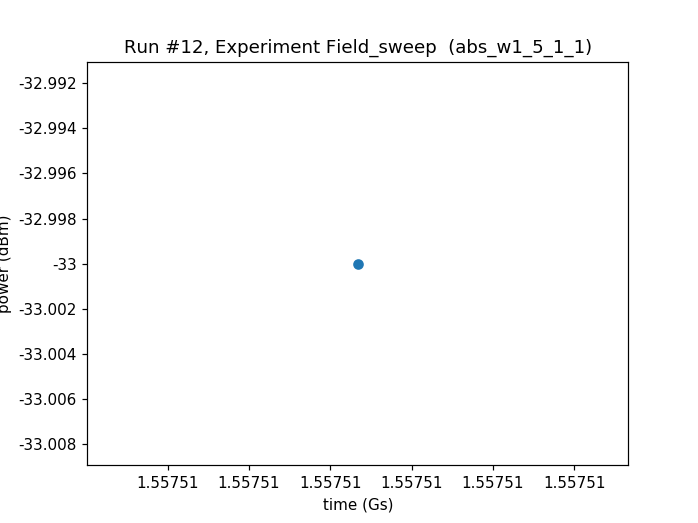

<IPython.core.display.Javascript object>


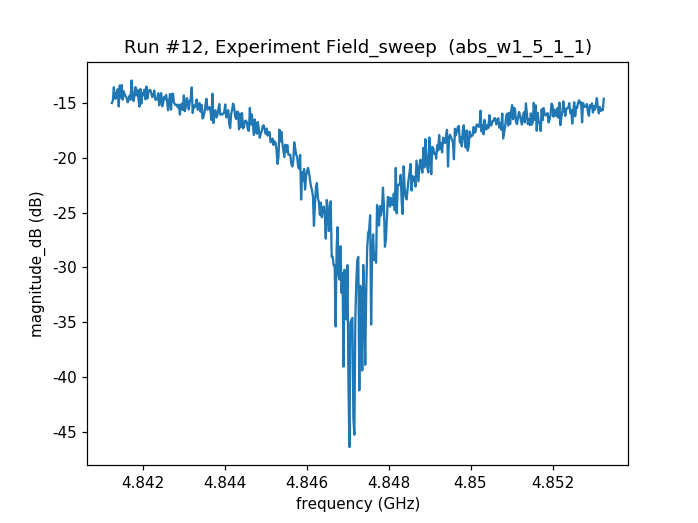

<IPython.core.display.Javascript object>


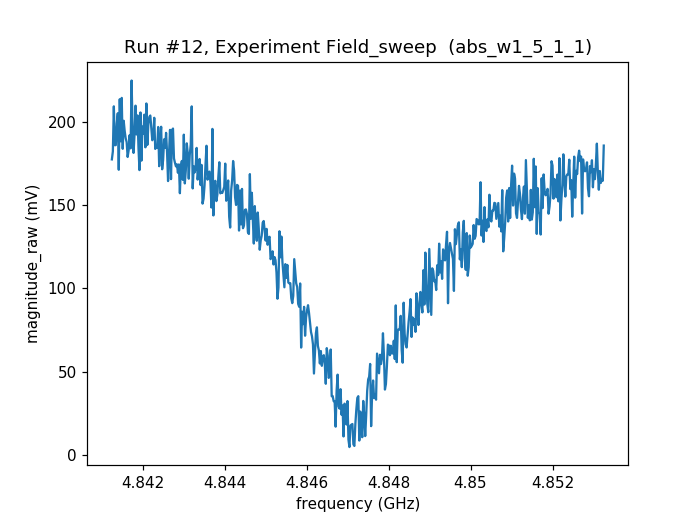

<IPython.core.display.Javascript object>


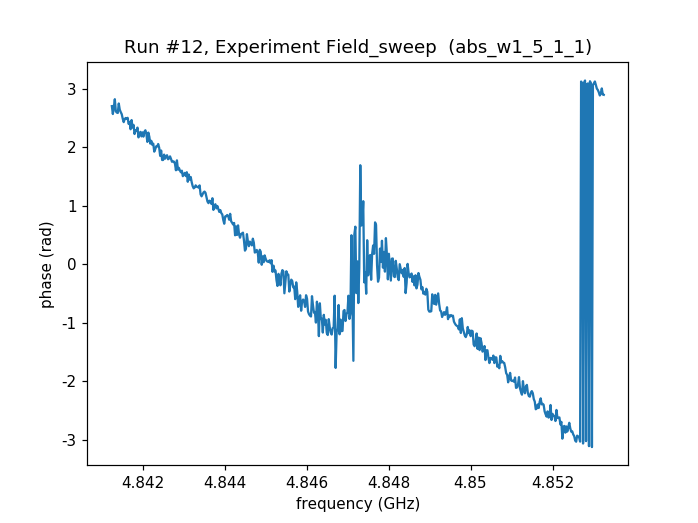

([<matplotlib.axes._subplots.AxesSubplot at 0x22f85477d68>,
 [None, None, None, None])

In [40]:
f = 4.84725e9
run_id = do_single_sweep(n_pts = 500, f_start = f-6e6, f_stop = f+6e6, power=power, n_avg=100, channel_name='S12')
plot_by_id(run_id)

Starting experimental run with id: 13


<IPython.core.display.Javascript object>


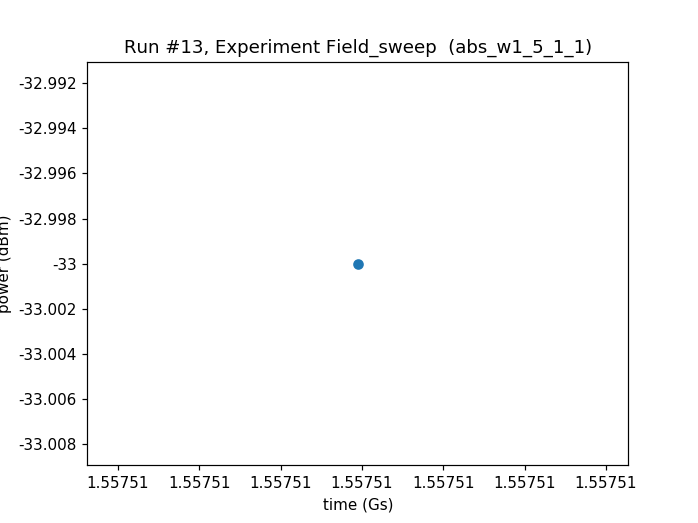

<IPython.core.display.Javascript object>


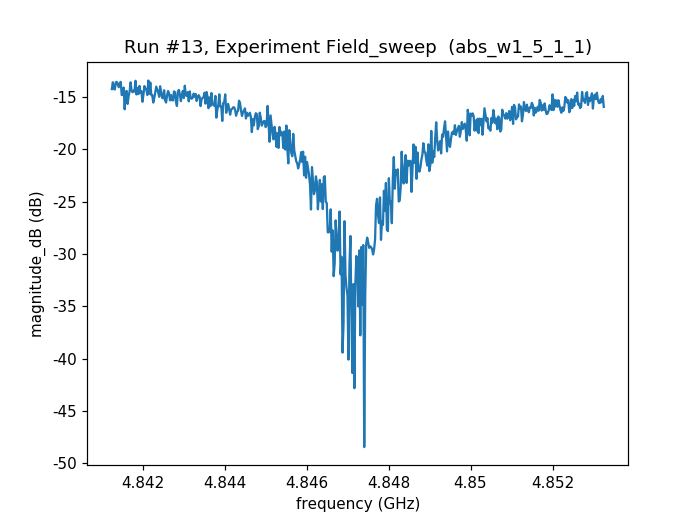

<IPython.core.display.Javascript object>


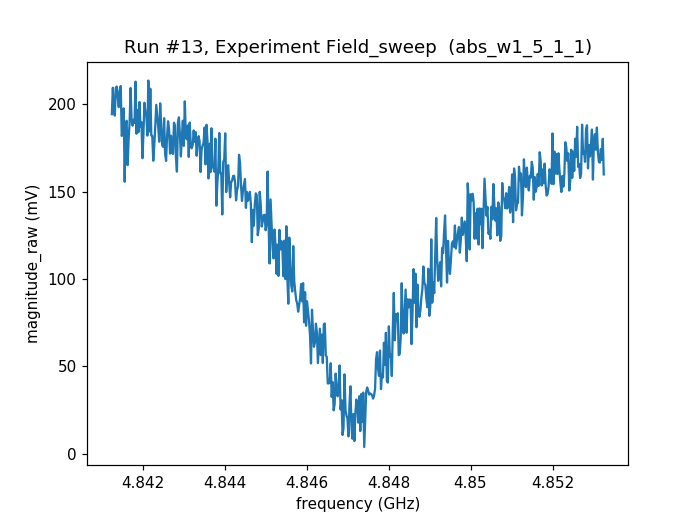

<IPython.core.display.Javascript object>


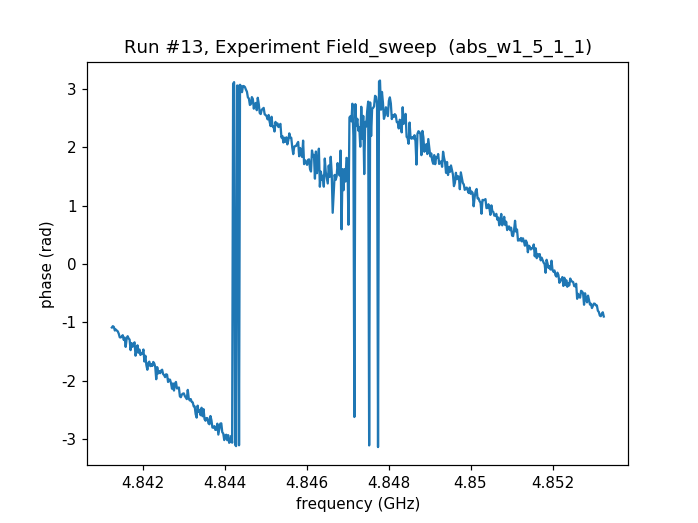

([<matplotlib.axes._subplots.AxesSubplot at 0x22f862360f0>,
 [None, None, None, None])

In [41]:
f = 4.84725e9
run_id = do_single_sweep(n_pts = 500, f_start = f-6e6, f_stop = f+6e6, power=power, n_avg=100, channel_name='S12')
plot_by_id(run_id)

Starting experimental run with id: 14


<IPython.core.display.Javascript object>


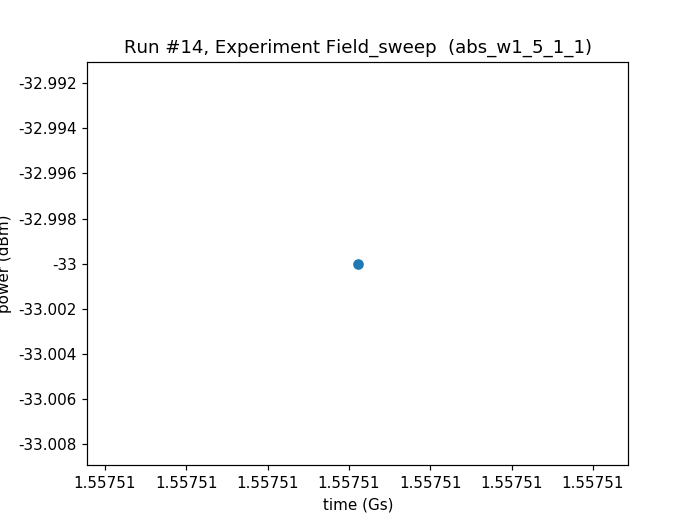

<IPython.core.display.Javascript object>


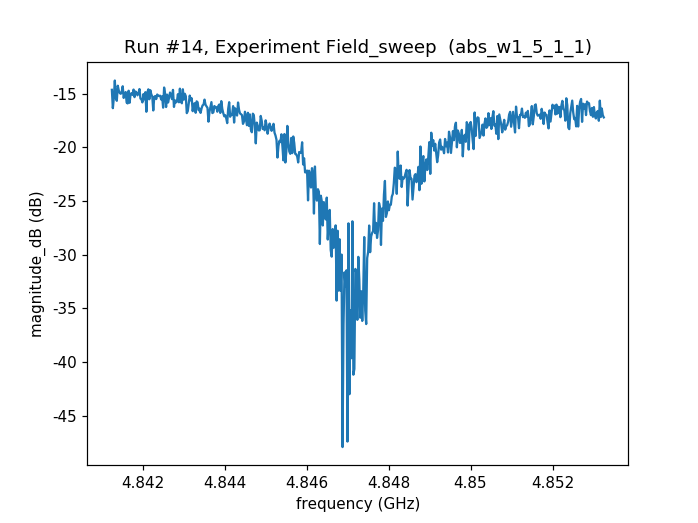

<IPython.core.display.Javascript object>


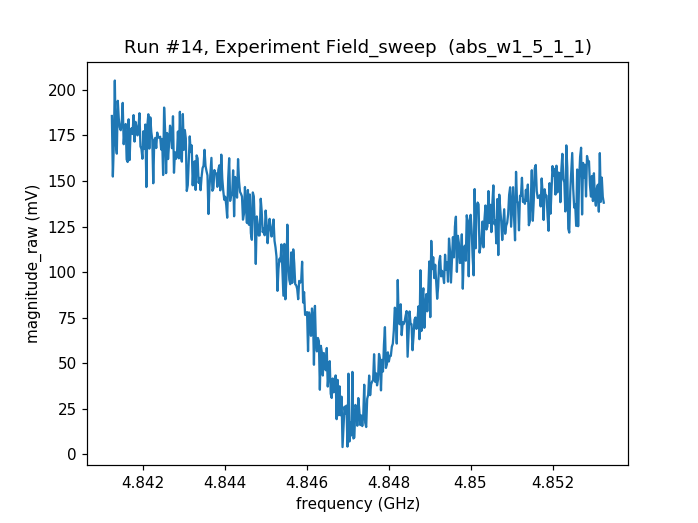

<IPython.core.display.Javascript object>


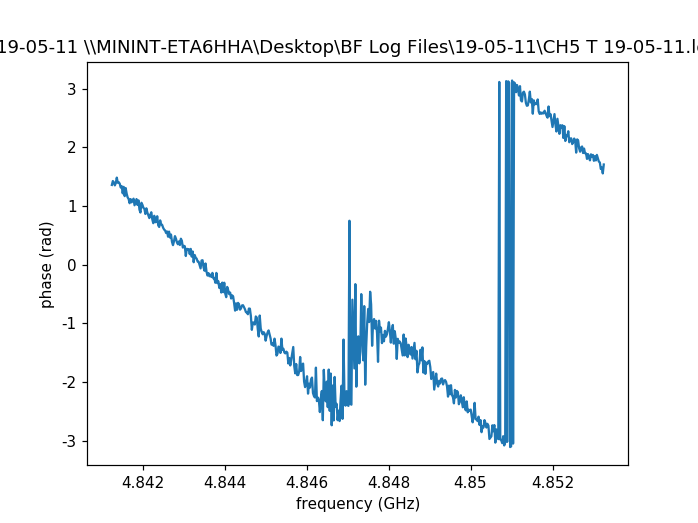

([<matplotlib.axes._subplots.AxesSubplot at 0x22f86f61a20>,
 [None, None, None, None])

In [42]:
f = 4.84725e9
run_id = do_single_sweep(n_pts = 500, f_start = f-6e6, f_stop = f+6e6, power=power, n_avg=100, channel_name='S12')
plot_by_id(run_id)

## multiple gate 1D sweep

In [126]:
power = -39
n_pts = 500
n_avg = 500
f = 4.84725e9#5.8865e9#4.8470e9 #4.48725
t0 = time.time()
take_trace_at_beginning = True
ramp_back_gates = True

#set_yoko_field(0)

exp = qc.new_experiment("single freq f=%.5e power=%d n=%d x %d" %(f, power, n_pts, n_avg)  , sample_name="abs_w1_5_1_1")

gate_channel = [MDAC_channels['V_cut_A'], MDAC_channels['V_bot_A'], MDAC_channels['V_pl_A']]
#gate_channel = [MDAC_channels['V_bot_B'], MDAC_channels['V_pr_B'], MDAC_channels['V_pl_B']]
gate_voltages = np.arange(0,4,0.005)
gate_name = ['V_cut_A', 'V_bot_A', 'V_pl_A']
#gate_name = ['V_bot_B', 'V_pr_B', 'V_pl_B']
if ramp_back_gates:
    print('ramping back gates')
    for gate in gate_name:
        ramp(MDAC_channels[gate].voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

#take a trace around f first after ramping back the gates to check where we are
if take_trace_at_beginning:
    print("Taking single sweep")
    t0=time.time()
    do_single_sweep(n_pts = 500, f_start = f-5e6, f_stop = f+5e6, power=power, n_avg=400, channel_name='S12')
    print("Taking trace took", time.time()-t0)

#now do the real thing
do_gate_sweep_single_frequency(gate_channel, gate_voltages,gate_name,
                        gate_ramp_stepsize = (1e-3), 
                        gate_ramp_delay = (0.01),
                        power=power, n_pts = n_pts, f = f, n_avg=n_avg, channel_name='S12')

print(" Time elapsed: %.4f" % (time.time()-t0))

ramping back gates
Taking single sweep
Starting experimental run with id: 67
Taking trace took 24.5494544506073
<MDACChannel: MDAC_chan1 of MDAC: MDAC> 0.0
<MDACChannel: MDAC_chan18 of MDAC: MDAC> 0.0
<MDACChannel: MDAC_chan17 of MDAC: MDAC> 0.0
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
STARTING TEMPERATURE: 0.024
Starting experimental run with id: 68
Ramping V_cut_A to 0.00e+00
Done ramping
Ramping V_bot_A to 0.00e+00
Done ramping
Ramping V_pl_A to 0.00e+00
Done ramping
Ramping V_cut_A to 5.00e-03
Done ramping
Ramping V_bot_A to 5.00e-03
Done ramping
Ramping V_pl_A to 5.00e-03
Done ramping
Ramping V_cut_A to 1.00e-02
Done ramping
Ramping V_bot_A to 1.00e-02
Done ramping
Ramping V_pl_A to 1.00e-02
Done ramping
Ramping V_cut_A to 1.50e-02
Done ramping
Ramping V_bot_A to 1.50e-02
Done ramping
Ramping V_pl_A to 1.50e-02
Done ramping
Ramping V_cut_A to 2.00e-02
Done ramping
Ramping V_bot_A to 2.00e-02
Done

Ramping V_bot_A to 6.50e-01
Done ramping
Ramping V_pl_A to 6.50e-01
Done ramping
Ramping V_cut_A to 6.55e-01
Done ramping
Ramping V_bot_A to 6.55e-01
Done ramping
Ramping V_pl_A to 6.55e-01
Done ramping
Ramping V_cut_A to 6.60e-01
Done ramping
Ramping V_bot_A to 6.60e-01
Done ramping
Ramping V_pl_A to 6.60e-01
Done ramping
Ramping V_cut_A to 6.65e-01
Done ramping
Ramping V_bot_A to 6.65e-01
Done ramping
Ramping V_pl_A to 6.65e-01
Done ramping
Ramping V_cut_A to 6.70e-01
Done ramping
Ramping V_bot_A to 6.70e-01
Done ramping
Ramping V_pl_A to 6.70e-01
Done ramping
Ramping V_cut_A to 6.75e-01
Done ramping
Ramping V_bot_A to 6.75e-01
Done ramping
Ramping V_pl_A to 6.75e-01
Done ramping
Ramping V_cut_A to 6.80e-01
Done ramping
Ramping V_bot_A to 6.80e-01
Done ramping
Ramping V_pl_A to 6.80e-01
Done ramping
Ramping V_cut_A to 6.85e-01
Done ramping
Ramping V_bot_A to 6.85e-01
Done ramping
Ramping V_pl_A to 6.85e-01
Done ramping
Ramping V_cut_A to 6.90e-01
Done ramping
Ramping V_bot_A to 6.90e

Ramping V_bot_A to 1.32e+00
Done ramping
Ramping V_pl_A to 1.32e+00
Done ramping
Ramping V_cut_A to 1.32e+00
Done ramping
Ramping V_bot_A to 1.32e+00
Done ramping
Ramping V_pl_A to 1.32e+00
Done ramping
Ramping V_cut_A to 1.33e+00
Done ramping
Ramping V_bot_A to 1.33e+00
Done ramping
Ramping V_pl_A to 1.33e+00
Done ramping
Ramping V_cut_A to 1.33e+00
Done ramping
Ramping V_bot_A to 1.33e+00
Done ramping
Ramping V_pl_A to 1.33e+00
Done ramping
Ramping V_cut_A to 1.34e+00
Done ramping
Ramping V_bot_A to 1.34e+00
Done ramping
Ramping V_pl_A to 1.34e+00
Done ramping
Ramping V_cut_A to 1.34e+00
Done ramping
Ramping V_bot_A to 1.34e+00
Done ramping
Ramping V_pl_A to 1.34e+00
Done ramping
Ramping V_cut_A to 1.35e+00
Done ramping
Ramping V_bot_A to 1.35e+00
Done ramping
Ramping V_pl_A to 1.35e+00
Done ramping
Ramping V_cut_A to 1.35e+00
Done ramping
Ramping V_bot_A to 1.35e+00
Done ramping
Ramping V_pl_A to 1.35e+00
Done ramping
Ramping V_cut_A to 1.36e+00
Done ramping
Ramping V_bot_A to 1.36e

Ramping V_bot_A to 1.99e+00
Done ramping
Ramping V_pl_A to 1.99e+00
Done ramping
Ramping V_cut_A to 2.00e+00
Done ramping
Ramping V_bot_A to 2.00e+00
Done ramping
Ramping V_pl_A to 2.00e+00
Done ramping
Ramping V_cut_A to 2.00e+00
Done ramping
Ramping V_bot_A to 2.00e+00
Done ramping
Ramping V_pl_A to 2.00e+00
Done ramping
Ramping V_cut_A to 2.00e+00
Done ramping
Ramping V_bot_A to 2.00e+00
Done ramping
Ramping V_pl_A to 2.00e+00
Done ramping
Ramping V_cut_A to 2.01e+00
Done ramping
Ramping V_bot_A to 2.01e+00
Done ramping
Ramping V_pl_A to 2.01e+00
Done ramping
Ramping V_cut_A to 2.02e+00
Done ramping
Ramping V_bot_A to 2.02e+00
Done ramping
Ramping V_pl_A to 2.02e+00
Done ramping
Ramping V_cut_A to 2.02e+00
Done ramping
Ramping V_bot_A to 2.02e+00
Done ramping
Ramping V_pl_A to 2.02e+00
Done ramping
Ramping V_cut_A to 2.02e+00
Done ramping
Ramping V_bot_A to 2.02e+00
Done ramping
Ramping V_pl_A to 2.02e+00
Done ramping
Ramping V_cut_A to 2.03e+00
Done ramping
Ramping V_bot_A to 2.03e

Ramping V_bot_A to 2.66e+00
Done ramping
Ramping V_pl_A to 2.66e+00
Done ramping
Ramping V_cut_A to 2.67e+00
Done ramping
Ramping V_bot_A to 2.67e+00
Done ramping
Ramping V_pl_A to 2.67e+00
Done ramping
Ramping V_cut_A to 2.67e+00
Done ramping
Ramping V_bot_A to 2.67e+00
Done ramping
Ramping V_pl_A to 2.67e+00
Done ramping
Ramping V_cut_A to 2.68e+00
Done ramping
Ramping V_bot_A to 2.68e+00
Done ramping
Ramping V_pl_A to 2.68e+00
Done ramping
Ramping V_cut_A to 2.68e+00
Done ramping
Ramping V_bot_A to 2.68e+00
Done ramping
Ramping V_pl_A to 2.68e+00
Done ramping
Ramping V_cut_A to 2.69e+00
Done ramping
Ramping V_bot_A to 2.69e+00
Done ramping
Ramping V_pl_A to 2.69e+00
Done ramping
Ramping V_cut_A to 2.69e+00
Done ramping
Ramping V_bot_A to 2.69e+00
Done ramping
Ramping V_pl_A to 2.69e+00
Done ramping
Ramping V_cut_A to 2.69e+00
Done ramping
Ramping V_bot_A to 2.69e+00
Done ramping
Ramping V_pl_A to 2.69e+00
Done ramping
Ramping V_cut_A to 2.70e+00
Done ramping
Ramping V_bot_A to 2.70e

Ramping V_bot_A to 3.33e+00
Done ramping
Ramping V_pl_A to 3.33e+00
Done ramping
Ramping V_cut_A to 3.33e+00
Done ramping
Ramping V_bot_A to 3.33e+00
Done ramping
Ramping V_pl_A to 3.33e+00
Done ramping
Ramping V_cut_A to 3.34e+00
Done ramping
Ramping V_bot_A to 3.34e+00
Done ramping
Ramping V_pl_A to 3.34e+00
Done ramping
Ramping V_cut_A to 3.35e+00
Done ramping
Ramping V_bot_A to 3.35e+00
Done ramping
Ramping V_pl_A to 3.35e+00
Done ramping
Ramping V_cut_A to 3.35e+00
Done ramping
Ramping V_bot_A to 3.35e+00
Done ramping
Ramping V_pl_A to 3.35e+00
Done ramping
Ramping V_cut_A to 3.35e+00
Done ramping
Ramping V_bot_A to 3.35e+00
Done ramping
Ramping V_pl_A to 3.35e+00
Done ramping
Ramping V_cut_A to 3.36e+00
Done ramping
Ramping V_bot_A to 3.36e+00
Done ramping
Ramping V_pl_A to 3.36e+00
Done ramping
Ramping V_cut_A to 3.37e+00
Done ramping
Ramping V_bot_A to 3.37e+00
Done ramping
Ramping V_pl_A to 3.37e+00
Done ramping
Ramping V_cut_A to 3.37e+00
Done ramping
Ramping V_bot_A to 3.37e

In [127]:
get_yoko_field()

VisaIOError: ('VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).', "asking ':SOUR:LEV?' to <GS200: yoko1>", 'getting yoko1_current')

## Multiple gate setting: Magnet 1D sweep

In [138]:
power = -39
n_pts = 500
n_avg = 500
f = 4.84725e9 #4.48725
t0 = time.time()
take_trace_at_beginning = True
ramp_back_gates = False

B_fields = np.arange(0,2.5e-3,2e-6)

exp = qc.new_experiment("single freq f=%.5e power=%d n=%d x %d" %(f, power, n_pts, n_avg)  , sample_name="abs_w1_5_1_1")
gate_channel = [MDAC_channels['V_cut_A'], MDAC_channels['V_bot_A'], MDAC_channels['V_pl_A']]

gate_voltages = 4
gate_name = ['V_cut_A', 'V_bot_A', 'V_pl_A']

if ramp_back_gates:
    print('ramping back gates')
    for gate in gate_name:
        ramp(MDAC_channels[gate].voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
print("ramping up gates")
for gate in gate_name:
    ramp(MDAC_channels[gate].voltage, gate_voltages, gate_ramp_stepsize, gate_ramp_delay)
#take a trace around f first after ramping back the gates to check where we are
if take_trace_at_beginning:
    print("Taking single sweep")
    t0=time.time()
    do_single_sweep(n_pts = 100, f_start = f-2e6, f_stop = f+2e6, power=power, n_avg=1000, channel_name='S12')
    print("Taking trace took", time.time()-t0)

#now do the real thing
do_field_sweep_single_frequency(B_fields, power=power, n_pts = n_pts, f = f, n_avg=n_avg, channel_name='S12')


print(" Time elapsed: %.4f" % (time.time()-t0))

ramping up gates
Taking single sweep
Starting experimental run with id: 69
Taking trace took 13.07645320892334
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 70
Setting field to 0.0
Setting field to 2e-06
Setting field to 4e-06
Setting field to 6e-06
Setting field to 8e-06
Setting field to 1e-05
Setting field to 1.2e-05
Setting field to 1.4e-05
Setting field to 1.6e-05
Setting field to 1.8e-05
Setting field to 2e-05
Setting field to 2.2e-05
Setting field to 2.4e-05
Setting field to 2.6e-05
Setting field to 2.8e-05
Setting field to 3e-05
Setting field to 3.2e-05
Setting field to 3.4e-05
Setting field to 3.6e-05
Setting field to 3.8e-05
Setting field to 4e-05
Setting field to 4.2e-05
Setting field to 4.4e-05
Setting field to 4.6e-05
Setting field to 4.8e-05
Setting field to 5e-05
Setting field to 5.2e-05
Setting field to 5.4e-05
Setting field to 5.6e-05
Setting field to 5.8e-05
Setting field to 6e-05
Setting 

KeyboardInterrupt: 

## Multiple axis Magnet sweep

In [140]:
power = -30
n_pts = 200
n_avg = 200
f = 4.84725e9 #4.48725
t0 = time.time()
take_trace_at_beginning = True
ramp_back_gates = False

B_fields = np.arange(0,1e-3,1e-6)
phis = np.arange(80,100,2.5) # in degrees
thetas = [90] #in degrees

phis_rad=np.radians(phis) #convert to radians
thetas_rad = np.radians(thetas)

gate_channel = [MDAC_channels['V_cut_A'], MDAC_channels['V_bot_A'], MDAC_channels['V_pl_A']]

gate_voltages = 4
gate_name = ['V_cut_A', 'V_bot_A', 'V_pl_A']

if ramp_back_gates:
    print('ramping back gates')
    for gate in gate_name:
        ramp(MDAC_channels[gate].voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
print("ramping up gates")
for gate in gate_name:
    ramp(MDAC_channels[gate].voltage, gate_voltages, gate_ramp_stepsize, gate_ramp_delay)
#take a trace around f first after ramping back the gates to check where we are
if take_trace_at_beginning:
    print("Taking single sweep")
    t0=time.time()
    do_single_sweep(n_pts = 100, f_start = f-4e6, f_stop = f+4e6, power=power, n_avg=1000, channel_name='S12')
    print("Taking trace took", time.time()-t0)

    
#now do the real thing
for i in range(len(phis)):
    for j in range(len(thetas)):
        exp = qc.new_experiment("field phi=%d theta=%d, freq f=%.5e power=%d n=%d x %d" %(phis[i],thetas[j],f, power, n_pts, n_avg)  , sample_name="abs_w1_5_1_1")
        do_3D_field_sweep_single_frequency(B_fields, phis_rad[i], thetas_rad[j],  power=power, n_pts = n_pts, f = f, n_avg=n_avg, channel_name='S12')

ramping up gates
Taking single sweep
Starting experimental run with id: 74
Taking trace took 13.06200098991394
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 75
Setting field (magntidue) to 0.0
Setting x, y, z to 0.000e+00, 0.000e+00, 0.000e+00
Setting field (magntidue) to 1e-06
Setting x, y, z to 1.736e-07, 9.848e-07, 6.123e-23
Setting field (magntidue) to 2e-06
Setting x, y, z to 3.473e-07, 1.970e-06, 1.225e-22
Setting field (magntidue) to 3e-06
Setting x, y, z to 5.209e-07, 2.954e-06, 1.837e-22
Setting field (magntidue) to 4e-06
Setting x, y, z to 6.946e-07, 3.939e-06, 2.449e-22
Setting field (magntidue) to 5e-06
Setting x, y, z to 8.682e-07, 4.924e-06, 3.062e-22
Setting field (magntidue) to 6e-06
Setting x, y, z to 1.042e-06, 5.909e-06, 3.674e-22
Setting field (magntidue) to 7e-06
Setting x, y, z to 1.216e-06, 6.894e-06, 4.286e-22
Setting field (magntidue) to 8e-06
Set

Setting x, y, z to 1.563e-05, 8.863e-05, 5.511e-21
Setting field (magntidue) to 9.1e-05
Setting x, y, z to 1.580e-05, 8.962e-05, 5.572e-21
Setting field (magntidue) to 9.2e-05
Setting x, y, z to 1.598e-05, 9.060e-05, 5.633e-21
Setting field (magntidue) to 9.3e-05
Setting x, y, z to 1.615e-05, 9.159e-05, 5.695e-21
Setting field (magntidue) to 9.4e-05
Setting x, y, z to 1.632e-05, 9.257e-05, 5.756e-21
Setting field (magntidue) to 9.5e-05
Setting x, y, z to 1.650e-05, 9.356e-05, 5.817e-21
Setting field (magntidue) to 9.6e-05
Setting x, y, z to 1.667e-05, 9.454e-05, 5.878e-21
Setting field (magntidue) to 9.7e-05
Setting x, y, z to 1.684e-05, 9.553e-05, 5.940e-21
Setting field (magntidue) to 9.8e-05
Setting x, y, z to 1.702e-05, 9.651e-05, 6.001e-21
Setting field (magntidue) to 9.9e-05
Setting x, y, z to 1.719e-05, 9.750e-05, 6.062e-21
Setting field (magntidue) to 0.0001
Setting x, y, z to 1.736e-05, 9.848e-05, 6.123e-21
Setting field (magntidue) to 0.000101
Setting x, y, z to 1.754e-05, 9.

Setting x, y, z to 4.758e-05, 2.698e-04, 1.678e-20
Setting field (magntidue) to 0.000275
Setting x, y, z to 4.775e-05, 2.708e-04, 1.684e-20
Setting field (magntidue) to 0.000276
Setting x, y, z to 4.793e-05, 2.718e-04, 1.690e-20
Setting field (magntidue) to 0.000277
Setting x, y, z to 4.810e-05, 2.728e-04, 1.696e-20
Setting field (magntidue) to 0.000278
Setting x, y, z to 4.827e-05, 2.738e-04, 1.702e-20
Setting field (magntidue) to 0.000279
Setting x, y, z to 4.845e-05, 2.748e-04, 1.708e-20
Setting field (magntidue) to 0.00028
Setting x, y, z to 4.862e-05, 2.757e-04, 1.715e-20
Setting field (magntidue) to 0.000281
Setting x, y, z to 4.880e-05, 2.767e-04, 1.721e-20
Setting field (magntidue) to 0.000282
Setting x, y, z to 4.897e-05, 2.777e-04, 1.727e-20
Setting field (magntidue) to 0.000283
Setting x, y, z to 4.914e-05, 2.787e-04, 1.733e-20
Setting field (magntidue) to 0.000284
Setting x, y, z to 4.932e-05, 2.797e-04, 1.739e-20
Setting field (magntidue) to 0.000285
Setting x, y, z to 4.9

Setting x, y, z to 7.953e-05, 4.510e-04, 2.804e-20
Setting field (magntidue) to 0.000459
Setting x, y, z to 7.970e-05, 4.520e-04, 2.811e-20
Setting field (magntidue) to 0.00046
Setting x, y, z to 7.988e-05, 4.530e-04, 2.817e-20
Setting field (magntidue) to 0.000461
Setting x, y, z to 8.005e-05, 4.540e-04, 2.823e-20
Setting field (magntidue) to 0.000462
Setting x, y, z to 8.023e-05, 4.550e-04, 2.829e-20
Setting field (magntidue) to 0.000463
Setting x, y, z to 8.040e-05, 4.560e-04, 2.835e-20
Setting field (magntidue) to 0.000464
Setting x, y, z to 8.057e-05, 4.570e-04, 2.841e-20
Setting field (magntidue) to 0.000465
Setting x, y, z to 8.075e-05, 4.579e-04, 2.847e-20
Setting field (magntidue) to 0.000466
Setting x, y, z to 8.092e-05, 4.589e-04, 2.853e-20
Setting field (magntidue) to 0.000467
Setting x, y, z to 8.109e-05, 4.599e-04, 2.860e-20
Setting field (magntidue) to 0.000468
Setting x, y, z to 8.127e-05, 4.609e-04, 2.866e-20
Setting field (magntidue) to 0.000469
Setting x, y, z to 8.1

Setting x, y, z to 1.115e-04, 6.322e-04, 3.931e-20
Setting field (magntidue) to 0.000643
Setting x, y, z to 1.117e-04, 6.332e-04, 3.937e-20
Setting field (magntidue) to 0.000644
Setting x, y, z to 1.118e-04, 6.342e-04, 3.943e-20
Setting field (magntidue) to 0.000645
Setting x, y, z to 1.120e-04, 6.352e-04, 3.949e-20
Setting field (magntidue) to 0.000646
Setting x, y, z to 1.122e-04, 6.362e-04, 3.956e-20
Setting field (magntidue) to 0.000647
Setting x, y, z to 1.124e-04, 6.372e-04, 3.962e-20
Setting field (magntidue) to 0.000648
Setting x, y, z to 1.125e-04, 6.382e-04, 3.968e-20
Setting field (magntidue) to 0.000649
Setting x, y, z to 1.127e-04, 6.391e-04, 3.974e-20
Setting field (magntidue) to 0.00065
Setting x, y, z to 1.129e-04, 6.401e-04, 3.980e-20
Setting field (magntidue) to 0.000651
Setting x, y, z to 1.130e-04, 6.411e-04, 3.986e-20
Setting field (magntidue) to 0.000652
Setting x, y, z to 1.132e-04, 6.421e-04, 3.992e-20
Setting field (magntidue) to 0.000653
Setting x, y, z to 1.1

Setting x, y, z to 1.434e-04, 8.135e-04, 5.058e-20
Setting field (magntidue) to 0.000827
Setting x, y, z to 1.436e-04, 8.144e-04, 5.064e-20
Setting field (magntidue) to 0.000828
Setting x, y, z to 1.438e-04, 8.154e-04, 5.070e-20
Setting field (magntidue) to 0.000829
Setting x, y, z to 1.440e-04, 8.164e-04, 5.076e-20
Setting field (magntidue) to 0.00083
Setting x, y, z to 1.441e-04, 8.174e-04, 5.082e-20
Setting field (magntidue) to 0.000831
Setting x, y, z to 1.443e-04, 8.184e-04, 5.088e-20
Setting field (magntidue) to 0.000832
Setting x, y, z to 1.445e-04, 8.194e-04, 5.095e-20
Setting field (magntidue) to 0.000833
Setting x, y, z to 1.446e-04, 8.203e-04, 5.101e-20
Setting field (magntidue) to 0.000834
Setting x, y, z to 1.448e-04, 8.213e-04, 5.107e-20
Setting field (magntidue) to 0.000835
Setting x, y, z to 1.450e-04, 8.223e-04, 5.113e-20
Setting field (magntidue) to 0.000836
Setting x, y, z to 1.452e-04, 8.233e-04, 5.119e-20
Setting field (magntidue) to 0.000837
Setting x, y, z to 1.4

Setting field (magntidue) to 8e-06
Setting x, y, z to 1.044e-06, 7.932e-06, 4.899e-22
Setting field (magntidue) to 9e-06
Setting x, y, z to 1.175e-06, 8.923e-06, 5.511e-22
Setting field (magntidue) to 1e-05
Setting x, y, z to 1.305e-06, 9.914e-06, 6.123e-22
Setting field (magntidue) to 1.1e-05
Setting x, y, z to 1.436e-06, 1.091e-05, 6.736e-22
Setting field (magntidue) to 1.2e-05
Setting x, y, z to 1.566e-06, 1.190e-05, 7.348e-22
Setting field (magntidue) to 1.3e-05
Setting x, y, z to 1.697e-06, 1.289e-05, 7.960e-22
Setting field (magntidue) to 1.4e-05
Setting x, y, z to 1.827e-06, 1.388e-05, 8.573e-22
Setting field (magntidue) to 1.5e-05
Setting x, y, z to 1.958e-06, 1.487e-05, 9.185e-22
Setting field (magntidue) to 1.6e-05
Setting x, y, z to 2.088e-06, 1.586e-05, 9.797e-22
Setting field (magntidue) to 1.7e-05
Setting x, y, z to 2.219e-06, 1.685e-05, 1.041e-21
Setting field (magntidue) to 1.8e-05
Setting x, y, z to 2.349e-06, 1.785e-05, 1.102e-21
Setting field (magntidue) to 1.9e-05
S

Setting field (magntidue) to 0.000193
Setting x, y, z to 2.519e-05, 1.913e-04, 1.182e-20
Setting field (magntidue) to 0.000194
Setting x, y, z to 2.532e-05, 1.923e-04, 1.188e-20
Setting field (magntidue) to 0.000195
Setting x, y, z to 2.545e-05, 1.933e-04, 1.194e-20
Setting field (magntidue) to 0.000196
Setting x, y, z to 2.558e-05, 1.943e-04, 1.200e-20
Setting field (magntidue) to 0.000197
Setting x, y, z to 2.571e-05, 1.953e-04, 1.206e-20
Setting field (magntidue) to 0.000198
Setting x, y, z to 2.584e-05, 1.963e-04, 1.212e-20
Setting field (magntidue) to 0.000199
Setting x, y, z to 2.597e-05, 1.973e-04, 1.219e-20
Setting field (magntidue) to 0.0002
Setting x, y, z to 2.611e-05, 1.983e-04, 1.225e-20
Setting field (magntidue) to 0.000201
Setting x, y, z to 2.624e-05, 1.993e-04, 1.231e-20
Setting field (magntidue) to 0.000202
Setting x, y, z to 2.637e-05, 2.003e-04, 1.237e-20
Setting field (magntidue) to 0.000203
Setting x, y, z to 2.650e-05, 2.013e-04, 1.243e-20
Setting field (magntidu

Setting field (magntidue) to 0.000377
Setting x, y, z to 4.921e-05, 3.738e-04, 2.308e-20
Setting field (magntidue) to 0.000378
Setting x, y, z to 4.934e-05, 3.748e-04, 2.315e-20
Setting field (magntidue) to 0.000379
Setting x, y, z to 4.947e-05, 3.758e-04, 2.321e-20
Setting field (magntidue) to 0.00038
Setting x, y, z to 4.960e-05, 3.767e-04, 2.327e-20
Setting field (magntidue) to 0.000381
Setting x, y, z to 4.973e-05, 3.777e-04, 2.333e-20
Setting field (magntidue) to 0.000382
Setting x, y, z to 4.986e-05, 3.787e-04, 2.339e-20
Setting field (magntidue) to 0.000383
Setting x, y, z to 4.999e-05, 3.797e-04, 2.345e-20
Setting field (magntidue) to 0.000384
Setting x, y, z to 5.012e-05, 3.807e-04, 2.351e-20
Setting field (magntidue) to 0.000385
Setting x, y, z to 5.025e-05, 3.817e-04, 2.357e-20
Setting field (magntidue) to 0.000386
Setting x, y, z to 5.038e-05, 3.827e-04, 2.364e-20
Setting field (magntidue) to 0.000387
Setting x, y, z to 5.051e-05, 3.837e-04, 2.370e-20
Setting field (magntid

Setting field (magntidue) to 0.000561
Setting x, y, z to 7.323e-05, 5.562e-04, 3.435e-20
Setting field (magntidue) to 0.000562
Setting x, y, z to 7.336e-05, 5.572e-04, 3.441e-20
Setting field (magntidue) to 0.000563
Setting x, y, z to 7.349e-05, 5.582e-04, 3.447e-20
Setting field (magntidue) to 0.000564
Setting x, y, z to 7.362e-05, 5.592e-04, 3.454e-20
Setting field (magntidue) to 0.000565
Setting x, y, z to 7.375e-05, 5.602e-04, 3.460e-20
Setting field (magntidue) to 0.000566
Setting x, y, z to 7.388e-05, 5.612e-04, 3.466e-20
Setting field (magntidue) to 0.000567
Setting x, y, z to 7.401e-05, 5.621e-04, 3.472e-20
Setting field (magntidue) to 0.000568
Setting x, y, z to 7.414e-05, 5.631e-04, 3.478e-20
Setting field (magntidue) to 0.000569
Setting x, y, z to 7.427e-05, 5.641e-04, 3.484e-20
Setting field (magntidue) to 0.00057
Setting x, y, z to 7.440e-05, 5.651e-04, 3.490e-20
Setting field (magntidue) to 0.000571
Setting x, y, z to 7.453e-05, 5.661e-04, 3.496e-20
Setting field (magntid

Setting field (magntidue) to 0.000745
Setting x, y, z to 9.724e-05, 7.386e-04, 4.562e-20
Setting field (magntidue) to 0.000746
Setting x, y, z to 9.737e-05, 7.396e-04, 4.568e-20
Setting field (magntidue) to 0.000747
Setting x, y, z to 9.750e-05, 7.406e-04, 4.574e-20
Setting field (magntidue) to 0.000748
Setting x, y, z to 9.763e-05, 7.416e-04, 4.580e-20
Setting field (magntidue) to 0.000749
Setting x, y, z to 9.776e-05, 7.426e-04, 4.586e-20
Setting field (magntidue) to 0.00075
Setting x, y, z to 9.789e-05, 7.436e-04, 4.592e-20
Setting field (magntidue) to 0.000751
Setting x, y, z to 9.803e-05, 7.446e-04, 4.599e-20
Setting field (magntidue) to 0.000752
Setting x, y, z to 9.816e-05, 7.456e-04, 4.605e-20
Setting field (magntidue) to 0.000753
Setting x, y, z to 9.829e-05, 7.466e-04, 4.611e-20
Setting field (magntidue) to 0.000754
Setting x, y, z to 9.842e-05, 7.475e-04, 4.617e-20
Setting field (magntidue) to 0.000755
Setting x, y, z to 9.855e-05, 7.485e-04, 4.623e-20
Setting field (magntid

Setting field (magntidue) to 0.000929
Setting x, y, z to 1.213e-04, 9.211e-04, 5.688e-20
Setting field (magntidue) to 0.00093
Setting x, y, z to 1.214e-04, 9.220e-04, 5.695e-20
Setting field (magntidue) to 0.000931
Setting x, y, z to 1.215e-04, 9.230e-04, 5.701e-20
Setting field (magntidue) to 0.000932
Setting x, y, z to 1.217e-04, 9.240e-04, 5.707e-20
Setting field (magntidue) to 0.000933
Setting x, y, z to 1.218e-04, 9.250e-04, 5.713e-20
Setting field (magntidue) to 0.000934
Setting x, y, z to 1.219e-04, 9.260e-04, 5.719e-20
Setting field (magntidue) to 0.000935
Setting x, y, z to 1.220e-04, 9.270e-04, 5.725e-20
Setting field (magntidue) to 0.000936
Setting x, y, z to 1.222e-04, 9.280e-04, 5.731e-20
Setting field (magntidue) to 0.000937
Setting x, y, z to 1.223e-04, 9.290e-04, 5.737e-20
Setting field (magntidue) to 0.000938
Setting x, y, z to 1.224e-04, 9.300e-04, 5.744e-20
Setting field (magntidue) to 0.000939
Setting x, y, z to 1.226e-04, 9.310e-04, 5.750e-20
Setting field (magntid

KeyboardInterrupt: 

In [75]:
get_yoko_field()

0.0004228064992614475

In [80]:
power = -27
n_pts = 200
n_avg = 200
f = 4.8470e9 #4.48725
t0 = time.time()
take_trace_at_beginning = True
ramp_back_gates = False

B_fields = np.arange(0,1e-3,2e-6)
phis = [90] #in degrees
thetas = np.arange(80,100,2.5) # in degrees

phis_rad=np.radians(phis) #convert to radians
thetas_rad = np.radians(thetas)

gate_channel = [MDAC_channels['V_cut_A'], MDAC_channels['V_bot_A'], MDAC_channels['V_pl_A']]

gate_voltages = 3.1
gate_name = ['V_cut_A', 'V_bot_A', 'V_pl_A']

if ramp_back_gates:
    print('ramping back gates')
    for gate in gate_name:
        ramp(MDAC_channels[gate].voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
print("ramping up gates")
for gate in gate_name:
    ramp(MDAC_channels[gate].voltage, gate_voltages, gate_ramp_stepsize, gate_ramp_delay)
#take a trace around f first after ramping back the gates to check where we are
if take_trace_at_beginning:
    print("Taking single sweep")
    t0=time.time()
    do_single_sweep(n_pts = 100, f_start = f-4e6, f_stop = f+4e6, power=power, n_avg=1000, channel_name='S12')
    print("Taking trace took", time.time()-t0)

    
#now do the real thing
for i in range(len(phis)):
    for j in range(len(thetas)):
        exp = qc.new_experiment("field phi=%d theta=%d, freq f=%.5e power=%d n=%d x %d" %(phis[i],thetas[j],f, power, n_pts, n_avg)  , sample_name="abs_w1_5_1_1")
        do_3D_field_sweep_single_frequency(B_fields, phis_rad[i], thetas_rad[j],  power=power, n_pts = n_pts, f = f, n_avg=n_avg, channel_name='S12')

ramping up gates
Taking single sweep
Starting experimental run with id: 31
Taking trace took 13.051497220993042
Instrument T_probe already exists.
Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Starting experimental run with id: 32
Setting field (magntidue) to 0.0
Setting x, y, z to 0.000e+00, 0.000e+00, 0.000e+00
Setting field (magntidue) to 2e-06
Setting x, y, z to 1.206e-22, 1.970e-06, 3.473e-07
Setting field (magntidue) to 4e-06
Setting x, y, z to 2.412e-22, 3.939e-06, 6.946e-07
Setting field (magntidue) to 6e-06
Setting x, y, z to 3.618e-22, 5.909e-06, 1.042e-06
Setting field (magntidue) to 8e-06
Setting x, y, z to 4.824e-22, 7.878e-06, 1.389e-06
Setting field (magntidue) to 1e-05
Setting x, y, z to 6.030e-22, 9.848e-06, 1.736e-06
Setting field (magntidue) to 1.2e-05
Setting x, y, z to 7.236e-22, 1.182e-05, 2.084e-06
Setting field (magntidue) to 1.4e-05
Setting x, y, z to 8.442e-22, 1.379e-05, 2.431e-06
Setting field (magntidue) to 1.6e

Setting x, y, z to 2.183e-20, 3.565e-04, 6.286e-05
Setting field (magntidue) to 0.000364
Setting x, y, z to 2.195e-20, 3.585e-04, 6.321e-05
Setting field (magntidue) to 0.000366
Setting x, y, z to 2.207e-20, 3.604e-04, 6.356e-05
Setting field (magntidue) to 0.000368
Setting x, y, z to 2.219e-20, 3.624e-04, 6.390e-05
Setting field (magntidue) to 0.00037
Setting x, y, z to 2.231e-20, 3.644e-04, 6.425e-05
Setting field (magntidue) to 0.000372
Setting x, y, z to 2.243e-20, 3.663e-04, 6.460e-05
Setting field (magntidue) to 0.000374
Setting x, y, z to 2.255e-20, 3.683e-04, 6.494e-05
Setting field (magntidue) to 0.000376
Setting x, y, z to 2.267e-20, 3.703e-04, 6.529e-05
Setting field (magntidue) to 0.000378
Setting x, y, z to 2.279e-20, 3.723e-04, 6.564e-05
Setting field (magntidue) to 0.00038
Setting x, y, z to 2.291e-20, 3.742e-04, 6.599e-05
Setting field (magntidue) to 0.000382
Setting x, y, z to 2.304e-20, 3.762e-04, 6.633e-05
Setting field (magntidue) to 0.000384
Setting x, y, z to 2.31

Setting x, y, z to 4.402e-20, 7.189e-04, 1.268e-04
Setting field (magntidue) to 0.000732
Setting x, y, z to 4.414e-20, 7.209e-04, 1.271e-04
Setting field (magntidue) to 0.000734
Setting x, y, z to 4.426e-20, 7.228e-04, 1.275e-04
Setting field (magntidue) to 0.000736
Setting x, y, z to 4.438e-20, 7.248e-04, 1.278e-04
Setting field (magntidue) to 0.000738
Setting x, y, z to 4.450e-20, 7.268e-04, 1.282e-04
Setting field (magntidue) to 0.00074
Setting x, y, z to 4.462e-20, 7.288e-04, 1.285e-04
Setting field (magntidue) to 0.000742
Setting x, y, z to 4.474e-20, 7.307e-04, 1.288e-04
Setting field (magntidue) to 0.000744
Setting x, y, z to 4.486e-20, 7.327e-04, 1.292e-04
Setting field (magntidue) to 0.000746
Setting x, y, z to 4.499e-20, 7.347e-04, 1.295e-04
Setting field (magntidue) to 0.000748
Setting x, y, z to 4.511e-20, 7.366e-04, 1.299e-04
Setting field (magntidue) to 0.00075
Setting x, y, z to 4.523e-20, 7.386e-04, 1.302e-04
Setting field (magntidue) to 0.000752
Setting x, y, z to 4.53

Setting x, y, z to 5.707e-21, 9.320e-05, 1.227e-05
Setting field (magntidue) to 9.6e-05
Setting x, y, z to 5.828e-21, 9.518e-05, 1.253e-05
Setting field (magntidue) to 9.8e-05
Setting x, y, z to 5.949e-21, 9.716e-05, 1.279e-05
Setting field (magntidue) to 0.0001
Setting x, y, z to 6.071e-21, 9.914e-05, 1.305e-05
Setting field (magntidue) to 0.000102
Setting x, y, z to 6.192e-21, 1.011e-04, 1.331e-05
Setting field (magntidue) to 0.000104
Setting x, y, z to 6.314e-21, 1.031e-04, 1.357e-05
Setting field (magntidue) to 0.000106
Setting x, y, z to 6.435e-21, 1.051e-04, 1.384e-05
Setting field (magntidue) to 0.000108
Setting x, y, z to 6.557e-21, 1.071e-04, 1.410e-05
Setting field (magntidue) to 0.00011
Setting x, y, z to 6.678e-21, 1.091e-04, 1.436e-05
Setting field (magntidue) to 0.000112
Setting x, y, z to 6.799e-21, 1.110e-04, 1.462e-05
Setting field (magntidue) to 0.000114
Setting x, y, z to 6.921e-21, 1.130e-04, 1.488e-05
Setting field (magntidue) to 0.000116
Setting x, y, z to 7.042e-

Setting x, y, z to 2.805e-20, 4.580e-04, 6.030e-05
Setting field (magntidue) to 0.000464
Setting x, y, z to 2.817e-20, 4.600e-04, 6.056e-05
Setting field (magntidue) to 0.000466
Setting x, y, z to 2.829e-20, 4.620e-04, 6.083e-05
Setting field (magntidue) to 0.000468
Setting x, y, z to 2.841e-20, 4.640e-04, 6.109e-05
Setting field (magntidue) to 0.00047
Setting x, y, z to 2.853e-20, 4.660e-04, 6.135e-05
Setting field (magntidue) to 0.000472
Setting x, y, z to 2.865e-20, 4.680e-04, 6.161e-05
Setting field (magntidue) to 0.000474
Setting x, y, z to 2.878e-20, 4.699e-04, 6.187e-05
Setting field (magntidue) to 0.000476
Setting x, y, z to 2.890e-20, 4.719e-04, 6.213e-05
Setting field (magntidue) to 0.000478
Setting x, y, z to 2.902e-20, 4.739e-04, 6.239e-05
Setting field (magntidue) to 0.00048
Setting x, y, z to 2.914e-20, 4.759e-04, 6.265e-05
Setting field (magntidue) to 0.000482
Setting x, y, z to 2.926e-20, 4.779e-04, 6.291e-05
Setting field (magntidue) to 0.000484
Setting x, y, z to 2.93

Setting x, y, z to 5.039e-20, 8.229e-04, 1.083e-04
Setting field (magntidue) to 0.000832
Setting x, y, z to 5.051e-20, 8.249e-04, 1.086e-04
Setting field (magntidue) to 0.000834
Setting x, y, z to 5.063e-20, 8.269e-04, 1.089e-04
Setting field (magntidue) to 0.000836
Setting x, y, z to 5.075e-20, 8.288e-04, 1.091e-04
Setting field (magntidue) to 0.000838
Setting x, y, z to 5.087e-20, 8.308e-04, 1.094e-04
Setting field (magntidue) to 0.00084
Setting x, y, z to 5.100e-20, 8.328e-04, 1.096e-04
Setting field (magntidue) to 0.000842
Setting x, y, z to 5.112e-20, 8.348e-04, 1.099e-04
Setting field (magntidue) to 0.000844
Setting x, y, z to 5.124e-20, 8.368e-04, 1.102e-04
Setting field (magntidue) to 0.000846
Setting x, y, z to 5.136e-20, 8.388e-04, 1.104e-04
Setting field (magntidue) to 0.000848
Setting x, y, z to 5.148e-20, 8.407e-04, 1.107e-04
Setting field (magntidue) to 0.00085
Setting x, y, z to 5.160e-20, 8.427e-04, 1.109e-04
Setting field (magntidue) to 0.000852
Setting x, y, z to 5.17

Setting x, y, z to 1.183e-20, 1.933e-04, 1.691e-05
Setting field (magntidue) to 0.000196
Setting x, y, z to 1.196e-20, 1.953e-04, 1.708e-05
Setting field (magntidue) to 0.000198
Setting x, y, z to 1.208e-20, 1.972e-04, 1.726e-05
Setting field (magntidue) to 0.0002
Setting x, y, z to 1.220e-20, 1.992e-04, 1.743e-05
Setting field (magntidue) to 0.000202
Setting x, y, z to 1.232e-20, 2.012e-04, 1.761e-05
Setting field (magntidue) to 0.000204
Setting x, y, z to 1.244e-20, 2.032e-04, 1.778e-05
Setting field (magntidue) to 0.000206
Setting x, y, z to 1.257e-20, 2.052e-04, 1.795e-05
Setting field (magntidue) to 0.000208
Setting x, y, z to 1.269e-20, 2.072e-04, 1.813e-05
Setting field (magntidue) to 0.00021
Setting x, y, z to 1.281e-20, 2.092e-04, 1.830e-05
Setting field (magntidue) to 0.000212
Setting x, y, z to 1.293e-20, 2.112e-04, 1.848e-05
Setting field (magntidue) to 0.000214
Setting x, y, z to 1.305e-20, 2.132e-04, 1.865e-05
Setting field (magntidue) to 0.000216
Setting x, y, z to 1.318

Setting x, y, z to 3.428e-20, 5.599e-04, 4.898e-05
Setting field (magntidue) to 0.000564
Setting x, y, z to 3.440e-20, 5.619e-04, 4.916e-05
Setting field (magntidue) to 0.000566
Setting x, y, z to 3.453e-20, 5.638e-04, 4.933e-05
Setting field (magntidue) to 0.000568
Setting x, y, z to 3.465e-20, 5.658e-04, 4.950e-05
Setting field (magntidue) to 0.00057
Setting x, y, z to 3.477e-20, 5.678e-04, 4.968e-05
Setting field (magntidue) to 0.000572
Setting x, y, z to 3.489e-20, 5.698e-04, 4.985e-05
Setting field (magntidue) to 0.000574
Setting x, y, z to 3.501e-20, 5.718e-04, 5.003e-05
Setting field (magntidue) to 0.000576
Setting x, y, z to 3.514e-20, 5.738e-04, 5.020e-05
Setting field (magntidue) to 0.000578
Setting x, y, z to 3.526e-20, 5.758e-04, 5.038e-05
Setting field (magntidue) to 0.00058
Setting x, y, z to 3.538e-20, 5.778e-04, 5.055e-05
Setting field (magntidue) to 0.000582
Setting x, y, z to 3.550e-20, 5.798e-04, 5.072e-05
Setting field (magntidue) to 0.000584
Setting x, y, z to 3.56

Setting x, y, z to 5.673e-20, 9.265e-04, 8.105e-05
Setting field (magntidue) to 0.000932
Setting x, y, z to 5.685e-20, 9.285e-04, 8.123e-05
Setting field (magntidue) to 0.000934
Setting x, y, z to 5.697e-20, 9.304e-04, 8.140e-05
Setting field (magntidue) to 0.000936
Setting x, y, z to 5.710e-20, 9.324e-04, 8.158e-05
Setting field (magntidue) to 0.000938
Setting x, y, z to 5.722e-20, 9.344e-04, 8.175e-05
Setting field (magntidue) to 0.00094
Setting x, y, z to 5.734e-20, 9.364e-04, 8.193e-05
Setting field (magntidue) to 0.000942
Setting x, y, z to 5.746e-20, 9.384e-04, 8.210e-05
Setting field (magntidue) to 0.000944
Setting x, y, z to 5.758e-20, 9.404e-04, 8.228e-05
Setting field (magntidue) to 0.000946
Setting x, y, z to 5.771e-20, 9.424e-04, 8.245e-05
Setting field (magntidue) to 0.000948
Setting x, y, z to 5.783e-20, 9.444e-04, 8.262e-05
Setting field (magntidue) to 0.00095
Setting x, y, z to 5.795e-20, 9.464e-04, 8.280e-05
Setting field (magntidue) to 0.000952
Setting x, y, z to 5.80

Setting x, y, z to 1.799e-20, 2.937e-04, 1.282e-05
Setting field (magntidue) to 0.000296
Setting x, y, z to 1.811e-20, 2.957e-04, 1.291e-05
Setting field (magntidue) to 0.000298
Setting x, y, z to 1.823e-20, 2.977e-04, 1.300e-05
Setting field (magntidue) to 0.0003
Setting x, y, z to 1.835e-20, 2.997e-04, 1.309e-05
Setting field (magntidue) to 0.000302
Setting x, y, z to 1.847e-20, 3.017e-04, 1.317e-05
Setting field (magntidue) to 0.000304
Setting x, y, z to 1.860e-20, 3.037e-04, 1.326e-05
Setting field (magntidue) to 0.000306
Setting x, y, z to 1.872e-20, 3.057e-04, 1.335e-05
Setting field (magntidue) to 0.000308
Setting x, y, z to 1.884e-20, 3.077e-04, 1.343e-05
Setting field (magntidue) to 0.00031
Setting x, y, z to 1.896e-20, 3.097e-04, 1.352e-05
Setting field (magntidue) to 0.000312
Setting x, y, z to 1.909e-20, 3.117e-04, 1.361e-05
Setting field (magntidue) to 0.000314
Setting x, y, z to 1.921e-20, 3.137e-04, 1.370e-05
Setting field (magntidue) to 0.000316
Setting x, y, z to 1.933

Setting x, y, z to 4.050e-20, 6.614e-04, 2.888e-05
Setting field (magntidue) to 0.000664
Setting x, y, z to 4.062e-20, 6.634e-04, 2.896e-05
Setting field (magntidue) to 0.000666
Setting x, y, z to 4.074e-20, 6.654e-04, 2.905e-05
Setting field (magntidue) to 0.000668
Setting x, y, z to 4.086e-20, 6.674e-04, 2.914e-05
Setting field (magntidue) to 0.00067
Setting x, y, z to 4.099e-20, 6.694e-04, 2.922e-05
Setting field (magntidue) to 0.000672
Setting x, y, z to 4.111e-20, 6.714e-04, 2.931e-05
Setting field (magntidue) to 0.000674
Setting x, y, z to 4.123e-20, 6.734e-04, 2.940e-05
Setting field (magntidue) to 0.000676
Setting x, y, z to 4.135e-20, 6.754e-04, 2.949e-05
Setting field (magntidue) to 0.000678
Setting x, y, z to 4.148e-20, 6.774e-04, 2.957e-05
Setting field (magntidue) to 0.00068
Setting x, y, z to 4.160e-20, 6.794e-04, 2.966e-05
Setting field (magntidue) to 0.000682
Setting x, y, z to 4.172e-20, 6.814e-04, 2.975e-05
Setting field (magntidue) to 0.000684
Setting x, y, z to 4.18

Setting field (magntidue) to 2.6e-05
Setting x, y, z to 1.592e-21, 2.600e-05, 1.592e-21
Setting field (magntidue) to 2.8e-05
Setting x, y, z to 1.715e-21, 2.800e-05, 1.715e-21
Setting field (magntidue) to 3e-05
Setting x, y, z to 1.837e-21, 3.000e-05, 1.837e-21
Setting field (magntidue) to 3.2e-05
Setting x, y, z to 1.959e-21, 3.200e-05, 1.959e-21
Setting field (magntidue) to 3.4e-05
Setting x, y, z to 2.082e-21, 3.400e-05, 2.082e-21
Setting field (magntidue) to 3.6e-05
Setting x, y, z to 2.204e-21, 3.600e-05, 2.204e-21
Setting field (magntidue) to 3.8e-05
Setting x, y, z to 2.327e-21, 3.800e-05, 2.327e-21
Setting field (magntidue) to 4e-05
Setting x, y, z to 2.449e-21, 4.000e-05, 2.449e-21
Setting field (magntidue) to 4.2e-05
Setting x, y, z to 2.572e-21, 4.200e-05, 2.572e-21
Setting field (magntidue) to 4.4e-05
Setting x, y, z to 2.694e-21, 4.400e-05, 2.694e-21
Setting field (magntidue) to 4.6e-05
Setting x, y, z to 2.817e-21, 4.600e-05, 2.817e-21
Setting field (magntidue) to 4.8e-05

Setting x, y, z to 2.413e-20, 3.940e-04, 2.413e-20
Setting field (magntidue) to 0.000396
Setting x, y, z to 2.425e-20, 3.960e-04, 2.425e-20
Setting field (magntidue) to 0.000398
Setting x, y, z to 2.437e-20, 3.980e-04, 2.437e-20
Setting field (magntidue) to 0.0004
Setting x, y, z to 2.449e-20, 4.000e-04, 2.449e-20
Setting field (magntidue) to 0.000402
Setting x, y, z to 2.462e-20, 4.020e-04, 2.462e-20
Setting field (magntidue) to 0.000404
Setting x, y, z to 2.474e-20, 4.040e-04, 2.474e-20
Setting field (magntidue) to 0.000406
Setting x, y, z to 2.486e-20, 4.060e-04, 2.486e-20
Setting field (magntidue) to 0.000408
Setting x, y, z to 2.498e-20, 4.080e-04, 2.498e-20
Setting field (magntidue) to 0.00041
Setting x, y, z to 2.511e-20, 4.100e-04, 2.511e-20
Setting field (magntidue) to 0.000412
Setting x, y, z to 2.523e-20, 4.120e-04, 2.523e-20
Setting field (magntidue) to 0.000414
Setting x, y, z to 2.535e-20, 4.140e-04, 2.535e-20
Setting field (magntidue) to 0.000416
Setting x, y, z to 2.547

Setting x, y, z to 4.666e-20, 7.620e-04, 4.666e-20
Setting field (magntidue) to 0.000764
Setting x, y, z to 4.678e-20, 7.640e-04, 4.678e-20
Setting field (magntidue) to 0.000766
Setting x, y, z to 4.690e-20, 7.660e-04, 4.690e-20
Setting field (magntidue) to 0.000768
Setting x, y, z to 4.703e-20, 7.680e-04, 4.703e-20
Setting field (magntidue) to 0.00077
Setting x, y, z to 4.715e-20, 7.700e-04, 4.715e-20
Setting field (magntidue) to 0.000772
Setting x, y, z to 4.727e-20, 7.720e-04, 4.727e-20
Setting field (magntidue) to 0.000774
Setting x, y, z to 4.739e-20, 7.740e-04, 4.739e-20
Setting field (magntidue) to 0.000776
Setting x, y, z to 4.752e-20, 7.760e-04, 4.752e-20
Setting field (magntidue) to 0.000778
Setting x, y, z to 4.764e-20, 7.780e-04, 4.764e-20
Setting field (magntidue) to 0.00078
Setting x, y, z to 4.776e-20, 7.800e-04, 4.776e-20
Setting field (magntidue) to 0.000782
Setting x, y, z to 4.788e-20, 7.820e-04, 4.788e-20
Setting field (magntidue) to 0.000784
Setting x, y, z to 4.80

Setting x, y, z to 7.586e-21, 1.239e-04, -5.409e-06
Setting field (magntidue) to 0.000126
Setting x, y, z to 7.708e-21, 1.259e-04, -5.496e-06
Setting field (magntidue) to 0.000128
Setting x, y, z to 7.830e-21, 1.279e-04, -5.583e-06
Setting field (magntidue) to 0.00013
Setting x, y, z to 7.953e-21, 1.299e-04, -5.671e-06
Setting field (magntidue) to 0.000132
Setting x, y, z to 8.075e-21, 1.319e-04, -5.758e-06
Setting field (magntidue) to 0.000134
Setting x, y, z to 8.197e-21, 1.339e-04, -5.845e-06
Setting field (magntidue) to 0.000136
Setting x, y, z to 8.320e-21, 1.359e-04, -5.932e-06
Setting field (magntidue) to 0.000138
Setting x, y, z to 8.442e-21, 1.379e-04, -6.019e-06
Setting field (magntidue) to 0.00014
Setting x, y, z to 8.564e-21, 1.399e-04, -6.107e-06
Setting field (magntidue) to 0.000142
Setting x, y, z to 8.687e-21, 1.419e-04, -6.194e-06
Setting field (magntidue) to 0.000144
Setting x, y, z to 8.809e-21, 1.439e-04, -6.281e-06
Setting field (magntidue) to 0.000146
Setting x, y

Setting x, y, z to 2.985e-20, 4.875e-04, -2.129e-05
Setting field (magntidue) to 0.00049
Setting x, y, z to 2.998e-20, 4.895e-04, -2.137e-05
Setting field (magntidue) to 0.000492
Setting x, y, z to 3.010e-20, 4.915e-04, -2.146e-05
Setting field (magntidue) to 0.000494
Setting x, y, z to 3.022e-20, 4.935e-04, -2.155e-05
Setting field (magntidue) to 0.000496
Setting x, y, z to 3.034e-20, 4.955e-04, -2.164e-05
Setting field (magntidue) to 0.000498
Setting x, y, z to 3.046e-20, 4.975e-04, -2.172e-05
Setting field (magntidue) to 0.0005
Setting x, y, z to 3.059e-20, 4.995e-04, -2.181e-05
Setting field (magntidue) to 0.000502
Setting x, y, z to 3.071e-20, 5.015e-04, -2.190e-05
Setting field (magntidue) to 0.000504
Setting x, y, z to 3.083e-20, 5.035e-04, -2.198e-05
Setting field (magntidue) to 0.000506
Setting x, y, z to 3.095e-20, 5.055e-04, -2.207e-05
Setting field (magntidue) to 0.000508
Setting x, y, z to 3.108e-20, 5.075e-04, -2.216e-05
Setting field (magntidue) to 0.00051
Setting x, y, 

Setting x, y, z to 5.212e-20, 8.512e-04, -3.716e-05
Setting field (magntidue) to 0.000854
Setting x, y, z to 5.224e-20, 8.532e-04, -3.725e-05
Setting field (magntidue) to 0.000856
Setting x, y, z to 5.236e-20, 8.552e-04, -3.734e-05
Setting field (magntidue) to 0.000858
Setting x, y, z to 5.249e-20, 8.572e-04, -3.743e-05
Setting field (magntidue) to 0.00086
Setting x, y, z to 5.261e-20, 8.592e-04, -3.751e-05
Setting field (magntidue) to 0.000862
Setting x, y, z to 5.273e-20, 8.612e-04, -3.760e-05
Setting field (magntidue) to 0.000864
Setting x, y, z to 5.285e-20, 8.632e-04, -3.769e-05
Setting field (magntidue) to 0.000866
Setting x, y, z to 5.298e-20, 8.652e-04, -3.777e-05
Setting field (magntidue) to 0.000868
Setting x, y, z to 5.310e-20, 8.672e-04, -3.786e-05
Setting field (magntidue) to 0.00087
Setting x, y, z to 5.322e-20, 8.692e-04, -3.795e-05
Setting field (magntidue) to 0.000872
Setting x, y, z to 5.334e-20, 8.712e-04, -3.804e-05
Setting field (magntidue) to 0.000874
Setting x, y

Setting x, y, z to 1.293e-20, 2.112e-04, -1.848e-05
Setting field (magntidue) to 0.000214
Setting x, y, z to 1.305e-20, 2.132e-04, -1.865e-05
Setting field (magntidue) to 0.000216
Setting x, y, z to 1.318e-20, 2.152e-04, -1.883e-05
Setting field (magntidue) to 0.000218
Setting x, y, z to 1.330e-20, 2.172e-04, -1.900e-05
Setting field (magntidue) to 0.00022
Setting x, y, z to 1.342e-20, 2.192e-04, -1.917e-05
Setting field (magntidue) to 0.000222
Setting x, y, z to 1.354e-20, 2.212e-04, -1.935e-05
Setting field (magntidue) to 0.000224
Setting x, y, z to 1.366e-20, 2.231e-04, -1.952e-05
Setting field (magntidue) to 0.000226
Setting x, y, z to 1.379e-20, 2.251e-04, -1.970e-05
Setting field (magntidue) to 0.000228
Setting x, y, z to 1.391e-20, 2.271e-04, -1.987e-05
Setting field (magntidue) to 0.00023
Setting x, y, z to 1.403e-20, 2.291e-04, -2.005e-05
Setting field (magntidue) to 0.000232
Setting x, y, z to 1.415e-20, 2.311e-04, -2.022e-05
Setting field (magntidue) to 0.000234
Setting x, y

KeyboardInterrupt: 

In [35]:
print("Taking single sweep")
t0=time.time()
do_single_sweep(n_pts = 200, f_start = f-10e6, f_stop = f+10e6, power=power, n_avg=1000, channel_name='S12')
print("Taking trace took", time.time()-t0)

Taking single sweep
Starting experimental run with id: 6
Taking trace took 24.959965705871582


## New heading

# Two tone spec

In [ ]:
from qcodes.instrument_drivers.rohde_schwarz.SGS100A import RohdeSchwarz_SGS100A
#LO = instools.create_inst(RohdeSchwarz_SGS100A, 'LO', address="TCPIP0::169.254.2.20", force_new_instance=True)
#station = add2station(station, LO)

drive = instools.create_inst(RohdeSchwarz_SGS100A, 'drive', address="TCPIP0::169.254.251.130", force_new_instance=True)
station.add_component(drive)
drive.off()

In [ ]:

for key,value in station.snapshot()['instruments'].items():
    print(key)

In [108]:
vna.S12.start(4e9)

VisaIOError: ('VI_ERROR_INP_PROT_VIOL (-1073807305): Device reported an input protocol error during transfer.', "asking 'SENS1:FREQ:STOP?' to <ZNB: VNA>", 'getting VNA_S12_stop', 'setting VNA_S12_start to 4000000000.0')

In [ ]:
drive.ref_osc_source()


In [ ]:
drive.frequency(5e9)
drive.power(-30)
drive.off()

In [ ]:
RF.parameters

In [ ]:
a = [3,2]
print(a)
a.extend([3,2])
print(a)

## Testing response

In [ ]:
#note that the frequency set on the VNA doesn't matter since we don't turn RF on. 
npts_vna = 1000
#setup_single_vna_point(frq =1e9 , npts =npts_vna, power = -30,  chan='S12', span=1, n_avg=1, rf_on = False)
power_drive = -60
f0 = 4.84725e9
#f0 = 5.889e9
df = 8e6
N_points_drive = 100
freqs= np.linspace(f0-df,f0+df,N_points_drive)
S_arr = []
#drive.on()
drive.power(power_drive)
for freq in freqs:
    setup_single_vna_point(frq =freq , npts =npts_vna, power = -60,  chan='S12', span=1, n_avg=1, rf_on = True)
    drive.frequency(freq)
    drive.on()
    S_arr.append(measure_complex_point_vna())
    
S_arr = np.array(S_arr, dtype=complex)

In [ ]:
plt.plot(freqs, np.angle(S_arr), 'r--')
plt.ylabel('Angle(rad)')
plt.twinx()
plt.plot(freqs, 20*np.log10(np.abs(S_arr)))
plt.title('drive_testing at P_drive=%d npts_vna=%d' % (power_drive, npts_vna))
plt.xlabel('freq')
plt.ylabel('mag(dB)')
plt.axvline(x=f0,color='g',label='f0')

In [ ]:
#note that the frequency set on the VNA doesn't matter since we don't turn RF on. 
npts_vna = 1000
#setup_single_vna_point(frq =1e9 , npts =npts_vna, power = -30,  chan='S12', span=1, n_avg=1, rf_on = False)
power_drive = -50
f0 = 4.84725e9
#f0 = 5.889e9
df = 8e6
N_points_drive = 100
freqs= np.linspace(f0-df,f0+df,N_points_drive)
S_mags = np.zeros(N_points_drive)
S_phase = np.zeros(N_points_drive)
#drive.on()
drive.power(power_drive)
i=0
for freq in freqs:
    setup_single_vna_point(frq =freq , npts =npts_vna, power = -60,  chan='S12', span=1, n_avg=1, rf_on = True)
    drive.frequency(freq)
    drive.on()
    mag, phase = measure_mag_phase_point_vna()
    S_mags[i] = mag
    S_phase[i] = phase
    i=i+1
    

In [ ]:
plt.plot(freqs, S_phase, 'r--')
plt.ylabel('Angle(rad)')
plt.twinx()
plt.plot(freqs, 20*np.log10(S_mags))
plt.title('drive_testing at P_drive=%d npts_vna=%d' % (power_drive, npts_vna))
plt.xlabel('freq')
plt.ylabel('mag(dB)')
plt.axvline(x=f0,color='g',label='f0')

In [ ]:
drive.power()

In [ ]:
exp = qc.new_experiment("cross driving test"  , sample_name="abs_w1_5_1_1")

do_single_sweep(n_pts = 20000, f_start = 3.2e9, f_stop = 20e9, power=-25, n_avg=50, channel_name='S12')


In [ ]:
freqs = [3.535e9, 4.020e9, 4.847e9, 5.889e9]
df = 20e6
for f in freqs:
    exp = qc.new_experiment("cross driving test %.5e" % f , sample_name="abs_w1_5_1_1")
    do_single_sweep(n_pts = 5000, f_start =f-df, f_stop=f+df, power=-20, n_avg=50, channel_name='S12')


## F drive at diff powers but fixed f0



In [ ]:
mdac.ch01.voltage()

In [ ]:
mdac.ch18.voltage()

In [ ]:
#note that the frequency set on the VNA doesn't matter since we don't turn RF on. 
npts_vna = 10000
power_drive = 0
power_readout = -33
f0 = 4.84725e9 #readout frequency at resonance
f_readout = f0


f_drive_start = 4.849e9
f_drive_stop = 4.853e9
df_drive = 0.03e6

#set the voltages corresponding to the MDAC channels
gate_settings = {
    'V_bot_A' : 2,
    'V_cut_A' : 2.02,
}
print('ramping cutter back')
#ramp(MDAC_channels['V_cut_A'].voltage, 0, gate_ramp_stepsize, gate_ramp_delay )
#time.sleep(10)
exp = qc.new_experiment("Two tone f_meas=%.4e" % f_readout  , sample_name="abs_w1_5_1_1")


#now setup the qcodes measurement object
meas = Measurement()

meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')

#parameters for reference (should be saved in a snapshot as well)
meas.register_custom_parameter('frequency_drive', unit='Hz',
                               paramtype='numeric')
meas.register_custom_parameter('f_readout', unit='Hz', paramtype='numeric')
meas.register_custom_parameter('power_drive', unit='dBm')
meas.register_custom_parameter('power_readout', unit='dBm')
meas.register_custom_parameter('df_drive', unit='Hz')
meas.register_custom_parameter('npts_vna', unit='')

#parameters for the vna                 

vna_trace_setpoints=['frequency_drive']
meas.register_custom_parameter('Re_S', unit='V', 
                                setpoints=vna_trace_setpoints,
                               paramtype='numeric'),
meas.register_custom_parameter('Im_S', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
meas.register_custom_parameter('mag', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
meas.register_custom_parameter('phase', unit='rad', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
meas.register_custom_parameter('magnitude_dB', unit='dB', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
#save all gates that are available
for gate_name, value in MDAC_channels.items():
    meas.register_custom_parameter(gate_name, unit='V')
                               
print("Setting gate voltages")
for gate_name, volt in gate_settings.items():
    print("Setting %s voltage to %3.f" %(gate_name, volt))
    ramp(MDAC_channels[gate_name].voltage, volt, gate_ramp_stepsize, gate_ramp_delay )
print("Done setting gate voltages")
for power_drive in [-10,-20,-30,-40]:
    print(power_drive)
    #first try to get temperature:
    T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
    temperature = T_probe.temperature()


    with meas.run() as datasaver:
        #setup the drive
        freqs= np.arange(f_drive_start, f_drive_stop,df_drive)
        drive.power(power_drive)
        drive.frequency(f_drive_start)
        drive.on()

        #setup the vna for a single point measurement
        setup_single_vna_point(frq =f_readout, npts =npts_vna, power = power_readout, 
                               chan='S12', span=1, n_avg=1, rf_on = True)
        #now start the measurement loop
        for freq in freqs:
            drive.frequency(freq)
            print(freq)
            time.sleep(0.1)
            S = measure_complex_point_vna()
            result = [('frequency_drive', freq),
                      ('Re_S', np.real(S)),
                      ('magnitude_dB',20*np.log10(np.abs(S)) ),
                      ('Im_S', np.imag(S)),
                      ('phase', np.angle(S)),
                      ('mag', np.abs(S)),
                      ('power_drive', power_drive),
                      ('power_readout', power_readout),
                      ('df_drive', df_drive),
                      ('npts_vna', npts_vna),
                      ('f_readout', f_readout),
                      ('temperature', temperature)]
            datasaver.add_result(*result)



    drive.off()

In [ ]:
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
temperature = T_probe.temperature()

## 2D f_measure vs f_drive

In [ ]:
#note that the frequency set on the VNA doesn't matter since we don't turn RF on. 
npts = 200
n_avg = 1000


power_drive = -10
power_readout = -33
f0 = 4.84725e9 #readout frequency at resonance
f_readout = f0
df = 0.0035e9

f_start = f0-df
f_stop = f0+df

f_drive_start = 4.84e9
f_drive_stop = 10e9
df_drive = 0.5e6

set_yoko_field(9e-6)

#set the voltages corresponding to the MDAC channels
gate_settings = {
    'V_bot_A' : 2,
    'V_cut_A' : 2.3,
}
print('ramping cutter back')
#ramp(MDAC_channels['V_cut_A'].voltage, 0, gate_ramp_stepsize, gate_ramp_delay )

exp = qc.new_experiment("Two tone f_meas=%.4e" % f_readout  , sample_name="abs_w1_5_1_1")

# let's set the trace properties. 
vna_channel = getattr(vna.channels, channel_name)

vna_channel.avg(n_avg)
vna_channel.npts(n_pts)
vna_channel.start(f_start)
vna_channel.stop(f_stop)
vna_channel.power(power_readout)
vna_channel.format('Complex')
vna.rf_on()
    
#now setup the qcodes measurement object
meas = Measurement()

meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')

#parameters for reference (should be saved in a snapshot as well)
meas.register_custom_parameter('frequency_drive', unit='Hz',
                               paramtype='numeric')
meas.register_custom_parameter('frequency', unit='Hz', paramtype='array')
meas.register_custom_parameter('f_readout', unit='Hz', paramtype='numeric')
meas.register_custom_parameter('power_drive', unit='dBm')
meas.register_custom_parameter('power_readout', unit='dBm')
meas.register_custom_parameter('df_drive', unit='Hz')
meas.register_custom_parameter('npts_vna', unit='')

#parameters for the vna                 

vna_trace_setpoints=['frequency','frequency_drive']
meas.register_custom_parameter('Re_S', unit='V', 
                                setpoints=vna_trace_setpoints,
                               paramtype='array'),
meas.register_custom_parameter('Im_S', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('mag', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('phase', unit='rad', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
meas.register_custom_parameter('magnitude_dB', unit='dB', 
                               setpoints=vna_trace_setpoints,
                               paramtype='array')
#save all gates that are available
for gate_name, value in MDAC_channels.items():
    meas.register_custom_parameter(gate_name, unit='V')
                               
print("Setting gate voltages")
for gate_name, volt in gate_settings.items():
    print("Setting %s voltage to %3.f" %(gate_name, volt))
    ramp(MDAC_channels[gate_name].voltage, volt, gate_ramp_stepsize, gate_ramp_delay )
print("Done setting gate voltages")

with meas.run() as datasaver:
    #setup the drive
    freqs= np.arange(f_drive_start, f_drive_stop,df_drive)
    drive.power(power_drive)
    drive.frequency(f_drive_start)
    drive.on()
                               
    #now start the measurement loop
    for freq in freqs:
        drive.frequency(freq)
        print(freq)
        fvals = np.linspace(vna_channel.start(), vna_channel.stop(), vna_channel.npts())
        S12 = vna_channel.trace.get()
        mag_db = 20*np.log10(np.abs(S12)) #convert to dB
        result = [ 
            ('frequency', fvals),
            ('Re_S', np.real(S12)),
            ('magnitude_dB',mag_db ),
            ('Im_S', np.imag(S12)),
            ('phase', np.angle(S12)),
            ('mag', np.abs(S12)),
            ('frequency_drive', freq),
                  ('power_drive', power_drive),
                  ('power_readout', power_readout),
                  ('df_drive', df_drive),
                  ('npts_vna', npts_vna),
                  ('f_readout', f_readout),
                  ('temperature', temperature)]
        datasaver.add_result(*result)   
    drive.off()

## 2D f_Drive vs gate. 



In [ ]:
#note that the frequency set on the VNA doesn't matter since we don't turn RF on. 
npts_vna = 10000
power_drive = -0
power_readout = -33
f0 = 4.84725e9 #readout frequency at resonance
f_readout = f0


f_drive_start = 4.8440e9
f_drive_stop = 4.855e9
df_drive = 0.1e6

#set the voltages corresponding to the MDAC channels
gate_settings = {
    'V_bot_A' : 2,
    #'V_cut_A' : 0.4,
}

#set the cutter gate voltages
vcuts = np.arange(2.0,2.4,0.02)



print('ramping cutter back')
#ramp(MDAC_channels['V_cut_A'].voltage, 0, gate_ramp_stepsize, gate_ramp_delay )
#time.sleep(10)
exp = qc.new_experiment("Two tone f_meas=%.4e Pdrive=%d, Pread=%d" % (f_readout,power_drive,power_readout)  , sample_name="abs_w1_5_1_1")




#first try to get temperature:
T_probe = create_inst(Thermometer, 'T_probe', logfile_path=BF_PC_PATH, force_new_instance=True)
temperature = T_probe.temperature()


#now setup the qcodes measurement object
meas = Measurement()

meas.register_custom_parameter('temperature', unit='K', paramtype='numeric')

#parameters for reference (should be saved in a snapshot as well)
meas.register_custom_parameter('frequency_drive', unit='Hz',
                               paramtype='numeric')
meas.register_custom_parameter('v_cut_a', unit='V', paramtype='numeric')
meas.register_custom_parameter('f_readout', unit='Hz', paramtype='numeric')
meas.register_custom_parameter('power_drive', unit='dBm')
meas.register_custom_parameter('power_readout', unit='dBm')
meas.register_custom_parameter('df_drive', unit='Hz')
meas.register_custom_parameter('npts_vna', unit='')
meas.register_custom_parameter('B_y', unit='T')

#parameters for the vna                 

vna_trace_setpoints=['frequency_drive', 'v_cut_a']
meas.register_custom_parameter('Re_S', unit='V', 
                                setpoints=vna_trace_setpoints,
                               paramtype='numeric'),
meas.register_custom_parameter('Im_S', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
meas.register_custom_parameter('mag', unit='V', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
meas.register_custom_parameter('phase', unit='rad', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
meas.register_custom_parameter('magnitude_dB', unit='dB', 
                               setpoints=vna_trace_setpoints,
                               paramtype='numeric')
#save all gates that are available
for gate_name, value in gate_settings.items():
    meas.register_custom_parameter(gate_name, unit='V')
                               
print("Setting gate voltages")
for gate_name, volt in gate_settings.items():
    print("Setting %s voltage to %3.f" %(gate_name, volt))
    ramp(MDAC_channels[gate_name].voltage, volt, gate_ramp_stepsize, gate_ramp_delay )
print("Done setting gate voltages")

with meas.run() as datasaver:
    #setup the drive
    freqs= np.arange(f_drive_start, f_drive_stop,df_drive)
    drive.power(power_drive)
    drive.frequency(f_drive_start)
    drive.on()
                               
    #setup the vna for a single point measurement
    setup_single_vna_point(frq =f_readout, npts =npts_vna, power = power_readout, 
                           chan='S12', span=1, n_avg=1, rf_on = True)
    #now start the measurement loop
    for vcut in vcuts:
        print("Ramping vcut to %.3e" % vcut)
        ramp(MDAC_channels['V_cut_A'].voltage, vcut, gate_ramp_stepsize, gate_ramp_delay )
        B_y = get_yoko_field()
        for freq in freqs:
            drive.frequency(freq)
            time.sleep(0.1) # to protect against overload
            print(freq)
            S = measure_complex_point_vna()
            result = [('frequency_drive', freq),
                      ('v_cut_a', vcut),
                      ('Re_S', np.real(S)),
                      ('magnitude_dB',20*np.log10(np.abs(S)) ),
                      ('Im_S', np.imag(S)),
                      ('phase', np.angle(S)),
                      ('mag', np.abs(S)),
                      ('power_drive', power_drive),
                      ('power_readout', power_readout),
                      ('df_drive', df_drive),
                      ('npts_vna', npts_vna),
                      ('f_readout', f_readout),
                      ('temperature', temperature),
                      ('B_y', B_y)
                     ]
            for gate_name, voltage in gate_settings.items():
                result.append((gate_name, MDAC_channels[gate_name].voltage()))
       
            datasaver.add_result(*result)

                               
            
    drive.off()
    S_arr = np.array(S_arr, dtype=complex)

In [ ]:
vna.rf_off()

In [ ]:
vna.rf_on()

In [ ]:
vna.S12.start(4e9)